# MACHINE LEARNING PROJECT
MEZOUAR ADNANE / 
MIJOT ALICE / 
MOSKOVLJEVIC ANDREA


#### Purpose:
The purpose of this case study is to give you a very small flavor of something you may
encounter in the banking sector, and to see how you handle a practical analysis and how you
communicate results and analytical approaches.

#### Expected result:
- What are the steps to take for this project?
- Which clients are to be targeted with which offer?
- What would be the expected revenue based on your strategy?

## SUMMARY  
  1. DataSets Preparation 
  2. DataFrame : Exploration of the 'positive' clients
  
#### --- SALES OBJECTIVE
  3. Models explorations for each of the sales
  4. Exploration/Optimisation of two most promising models for each of the sales
  5. Deployment of the best model on the 40% clients (forecast objective) dataset
  
#### --- REVENUE OBJECTIVE
  6. Models explorations for each of the revenues
  7. Exploration/Optimisation of two most promising models for each of the revenues
  8. Deployment of the best model on the 40% clients (forecast objective) dataset

#### --- FINAL
  9. Creation of the list of clients to target

In [1150]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Read the xls to dataframe by tabs
excel_file = pd.ExcelFile("/Users/Alice/Documents/EML_COURS/MACHINE LEARNING/Assignments/3. Project/DMML_Project_Dataset.xlsx")
#df1  100%
df_Soc_Dem = pd.read_excel(excel_file,'Soc_Dem')
#df2  100%
df_ActBal= pd.read_excel(excel_file,'Products_ActBalance')
#df3  100%
df_Inf_Out = pd.read_excel(excel_file, 'Inflow_Outflow')
#df4  60%
df_SalesRev = pd.read_excel(excel_file, 'Sales_Revenues')

# 1. DataSets Preparation : Merge + Sets creation

In [1151]:
#merging datasets

#### FIRST DATA SET WITH ALL DATA COMPLETED : 1615 observations with 36 variables
df_1a = pd.merge(df_Soc_Dem, df_ActBal, on='Client', how='inner')
df_1b = pd.merge(df_1a, df_Inf_Out, on='Client', how='left') #has to be a left otherwise we loose 28 observations
df_2_100 = pd.merge(df_1b,df_SalesRev, on='Client', how='left') #base 100%

#### Definition base 60% withh all data : 969 observations with 36 variables
df_2_60 = pd.merge(df_1b,df_SalesRev, on='Client', how='inner') #base 60%
df2 = df_2_60

#### Definition base 40% with the model to later deploy it on
# 40% of the 1615 clients in the data and using for prediction
df_2_40 = pd.concat([df_2_100,df2],ignore_index=True)
df_2_40.drop_duplicates(subset='Client',keep=False,inplace=True)

df_2_100.head(5), 
df_2_60.head(5),
df_2_100.shape,df_2_60.shape, df_2_40.shape
#df_2_100.shape == df_2_60.shape[0] df_2_40.shape[0]

#df.to_pickle('df_cities_countries.dat')

((1615, 36), (969, 36), (646, 36))

#### 60% CLIENTS DATASET - STRUCTURE AND CLEANING

In [1152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 968
Data columns (total 36 columns):
Client                          969 non-null int64
Sex                             967 non-null object
Age                             969 non-null int64
Tenure                          969 non-null int64
Count_CA                        969 non-null int64
Count_SA                        265 non-null float64
Count_MF                        184 non-null float64
Count_OVD                       251 non-null float64
Count_CC                        110 non-null float64
Count_CL                        79 non-null float64
ActBal_CA                       969 non-null float64
ActBal_SA                       265 non-null float64
ActBal_MF                       184 non-null float64
ActBal_OVD                      251 non-null float64
ActBal_CC                       110 non-null float64
ActBal_CL                       79 non-null float64
VolumeCred                      951 non-null float64
Volum

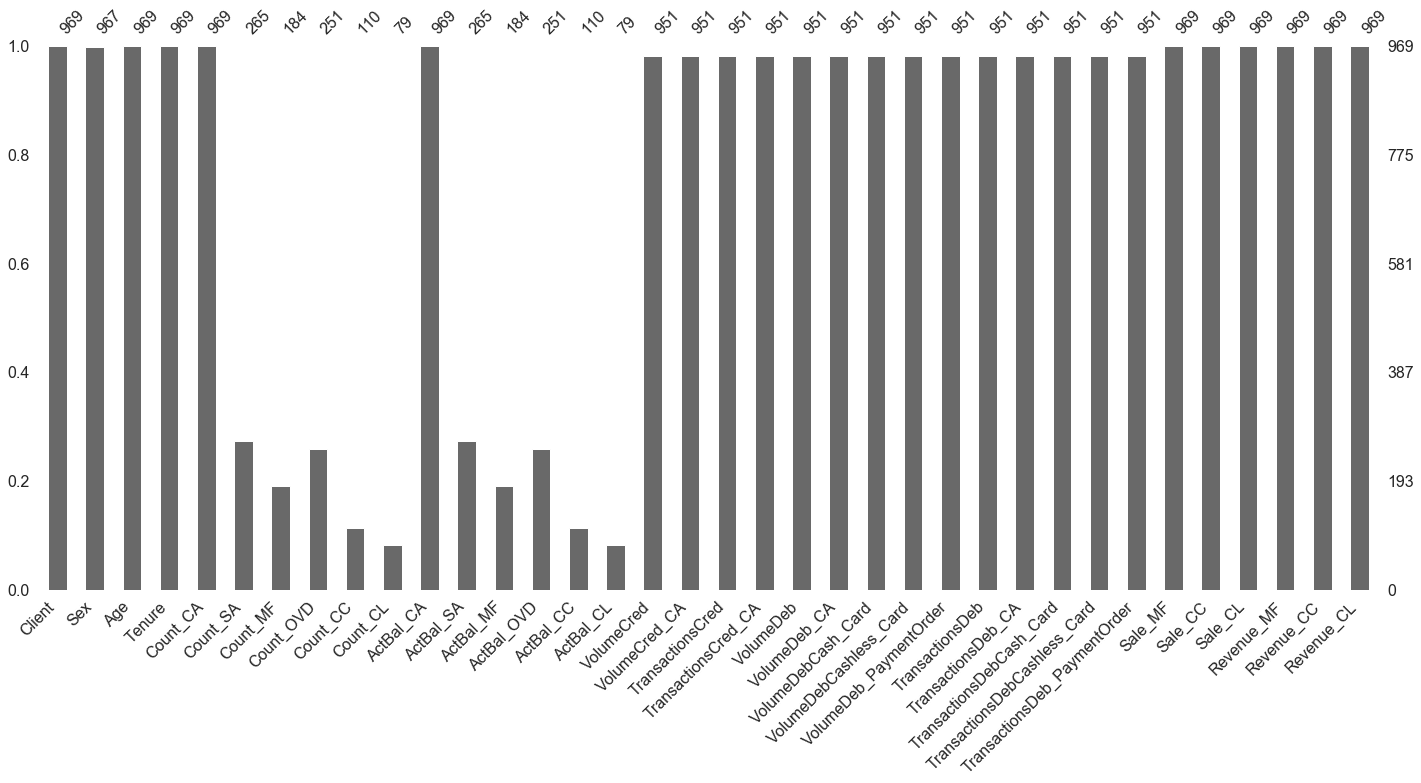

In [1153]:
import missingno as msno
msno.bar(df2)
#Barplot showing miss values

##### From categorical to numerical

In [1154]:
#from categorical to numerical
#df2['Sex']=df2.replace(np.NaN,1)
df2['Sex']=df2.Sex.map({'F':1,'M':2}).replace(np.NaN,1)
df2['Sex']

0      2.0
1      1.0
2      2.0
3      2.0
4      2.0
      ... 
964    1.0
965    2.0
966    2.0
967    2.0
968    1.0
Name: Sex, Length: 969, dtype: float64

In [1155]:
#df2.loc(df2['Sex']==np.NaN,'Client').

##### Filling missing values

In [1156]:
##Check missing variables
#print((df2==np.NaN).sum())

In [1157]:
df2[['Count_SA','Count_CA','Count_MF','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL']] = df2[['Count_SA','Count_CA','Count_MF','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL']].replace(np.NaN,0)
print((df2[['Count_SA','Count_CA','Count_MF','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL']]).count())
df2[['Count_SA','Count_CA','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL','Tenure','Age','Client','Sale_MF','Sale_CL','Sale_CC']] = df2[['Count_SA','Count_CA','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL','Tenure','Age','Client','Sale_MF','Sale_CL','Sale_CC']].astype(np.float64)

#Dropping the rows which have one missing value
df2 = df2.dropna()#how='all',thresh=1)
print('\nShape of the dataset once the missing values have been dropped :',df2.shape)

Count_SA      969
Count_CA      969
Count_MF      969
Count_MF      969
Count_OVD     969
Count_CC      969
Count_CL      969
ActBal_SA     969
ActBal_MF     969
ActBal_OVD    969
ActBal_CC     969
ActBal_CL     969
dtype: int64

Shape of the dataset once the missing values have been dropped : (951, 36)


In [1158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 968
Data columns (total 36 columns):
Client                          951 non-null float64
Sex                             951 non-null float64
Age                             951 non-null float64
Tenure                          951 non-null float64
Count_CA                        951 non-null float64
Count_SA                        951 non-null float64
Count_MF                        951 non-null float64
Count_OVD                       951 non-null float64
Count_CC                        951 non-null float64
Count_CL                        951 non-null float64
ActBal_CA                       951 non-null float64
ActBal_SA                       951 non-null float64
ActBal_MF                       951 non-null float64
ActBal_OVD                      951 non-null float64
ActBal_CC                       951 non-null float64
ActBal_CL                       951 non-null float64
VolumeCred                      951 non-null fl

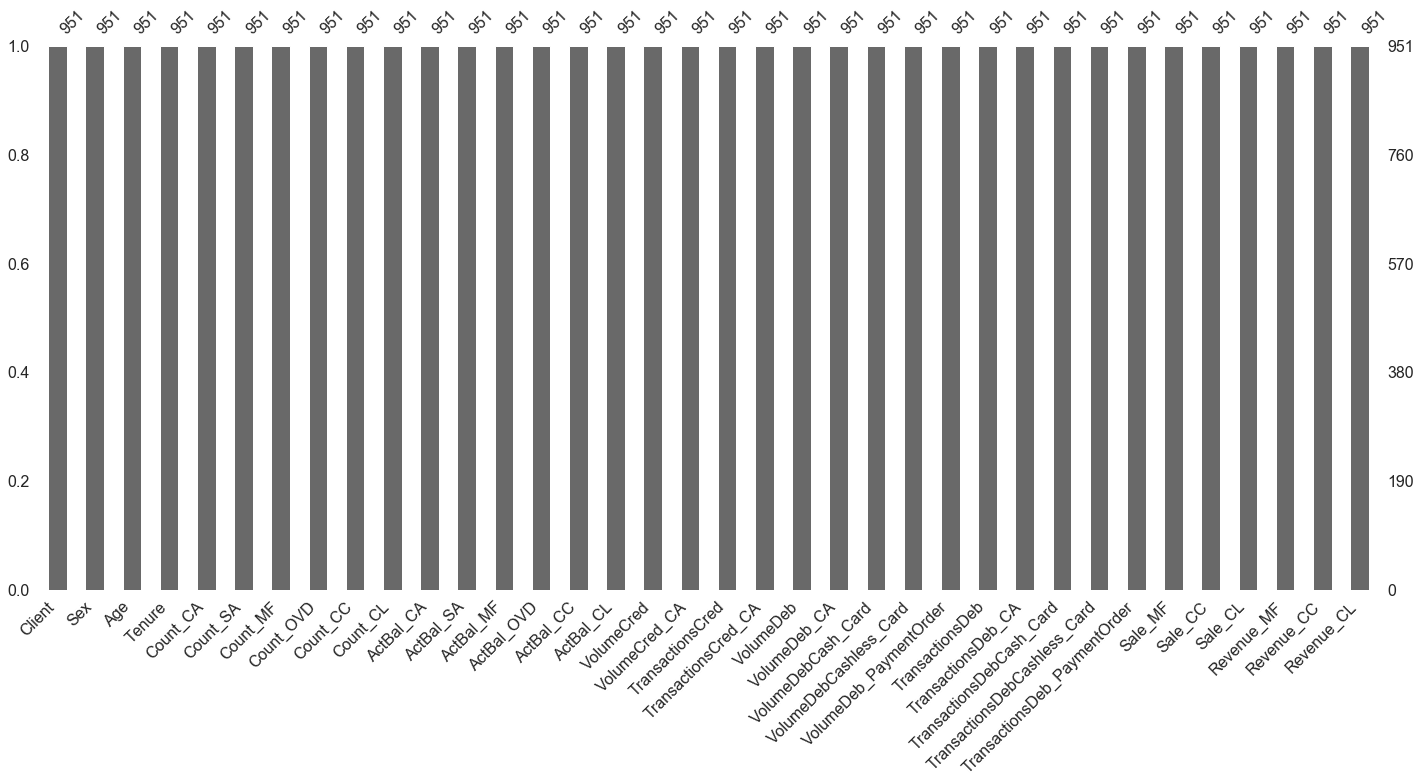

In [1159]:
import missingno as msno
msno.bar(df2)
#Barplot showing miss values

#### 40% CLIENTS DATASET - STRUCTURE AND CLEANING

In [1160]:
df_2_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 1614
Data columns (total 36 columns):
Client                          646 non-null int64
Sex                             645 non-null object
Age                             646 non-null int64
Tenure                          646 non-null int64
Count_CA                        646 non-null int64
Count_SA                        161 non-null float64
Count_MF                        122 non-null float64
Count_OVD                       168 non-null float64
Count_CC                        60 non-null float64
Count_CL                        56 non-null float64
ActBal_CA                       646 non-null float64
ActBal_SA                       161 non-null float64
ActBal_MF                       122 non-null float64
ActBal_OVD                      168 non-null float64
ActBal_CC                       60 non-null float64
ActBal_CL                       56 non-null float64
VolumeCred                      636 non-null float64
Volume

In [1161]:
#from categorical to numerical
df_2_40['Sex']=df_2_40.Sex.map({'F':1,'M':2}).replace(np.NaN,1)
df_2_40[['Count_SA','Count_CA','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL']] = df_2_40[['Count_SA','Count_CA','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL']].replace(np.NaN,0)
df_2_40[['Count_SA','Count_CA','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL','Tenure','Age']] = df_2_40[['Count_SA','Count_CA','Count_MF','Count_OVD','Count_CC','Count_CL','ActBal_SA','ActBal_MF','ActBal_OVD','ActBal_CC','ActBal_CL','Tenure','Age']].astype(np.float64)

# Replace it by Average
df_2_40[['VolumeCred']]=df_2_40[['VolumeCred']].replace(np.NaN,df_2_40['VolumeCred'].mean())
df_2_40[['VolumeCred_CA']]=df_2_40[['VolumeCred_CA']].replace(np.NaN,df_2_40['VolumeCred_CA'].mean())
df_2_40[['TransactionsCred']]=df_2_40[['TransactionsCred']].replace(np.NaN,df_2_40['TransactionsCred'].mean())
df_2_40[['TransactionsCred_CA']]=df_2_40[['TransactionsCred_CA']].replace(np.NaN,df_2_40['TransactionsCred_CA'].mean())
df_2_40[['VolumeDeb']]=df_2_40[['VolumeDeb']].replace(np.NaN,df_2_40['VolumeDeb'].mean())
df_2_40[['VolumeDeb_CA']]=df_2_40[['VolumeDeb_CA']].replace(np.NaN,df_2_40['VolumeDeb_CA'].mean())
df_2_40[['VolumeDebCash_Card']]=df_2_40[['VolumeDebCash_Card']].replace(np.NaN,df_2_40['VolumeDebCash_Card'].mean())
df_2_40[['VolumeDebCashless_Card']]=df_2_40[['VolumeDebCashless_Card']].replace(np.NaN,df_2_40['VolumeDebCashless_Card'].mean())
df_2_40[['VolumeDeb_PaymentOrder']]=df_2_40[['VolumeDeb_PaymentOrder']].replace(np.NaN,df_2_40['VolumeDeb_PaymentOrder'].mean())
df_2_40[['TransactionsDeb']]=df_2_40[['TransactionsDeb']].replace(np.NaN,df_2_40['TransactionsDeb'].mean())
df_2_40[['TransactionsCred']]=df_2_40[['TransactionsCred']].replace(np.NaN,df_2_40['TransactionsCred'].mean())
df_2_40[['TransactionsCred_CA']]=df_2_40[['TransactionsCred_CA']].replace(np.NaN,df_2_40['TransactionsCred_CA'].mean()) 
df_2_40[['TransactionsDeb_CA']]=df_2_40[['TransactionsDeb_CA']].replace(np.NaN,df_2_40['TransactionsDeb_CA'].mean())
df_2_40[['TransactionsDebCash_Card']]=df_2_40[['TransactionsDebCash_Card']].replace(np.NaN,df_2_40['TransactionsDebCash_Card'].mean())
df_2_40[['TransactionsDebCashless_Card']]=df_2_40[['TransactionsDebCashless_Card']].replace(np.NaN,df_2_40['TransactionsDebCashless_Card'].mean())
df_2_40[['TransactionsDeb_PaymentOrder']]=df_2_40[['TransactionsDeb_PaymentOrder']].replace(np.NaN,df_2_40['TransactionsDeb_PaymentOrder'].mean())

#df_2_40 = df_2_40.replace(np.NaN,0)
#df_2_40_2 =  df_2_40.drop(['Sale_MF', 'Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'], axis=1)
#msno.bar(df_2_40_2)

df_2_40_3 = df_2_40.replace([np.inf, -np.inf], np.NaN, inplace=False)
#np.any(np.isnan(mat))
df_2_40_3 = df_2_40_3.replace(np.NaN,0)
#df_2_40_3 = df_2_40_3.fillna(0)
#np.all(np.isfinite(mat))

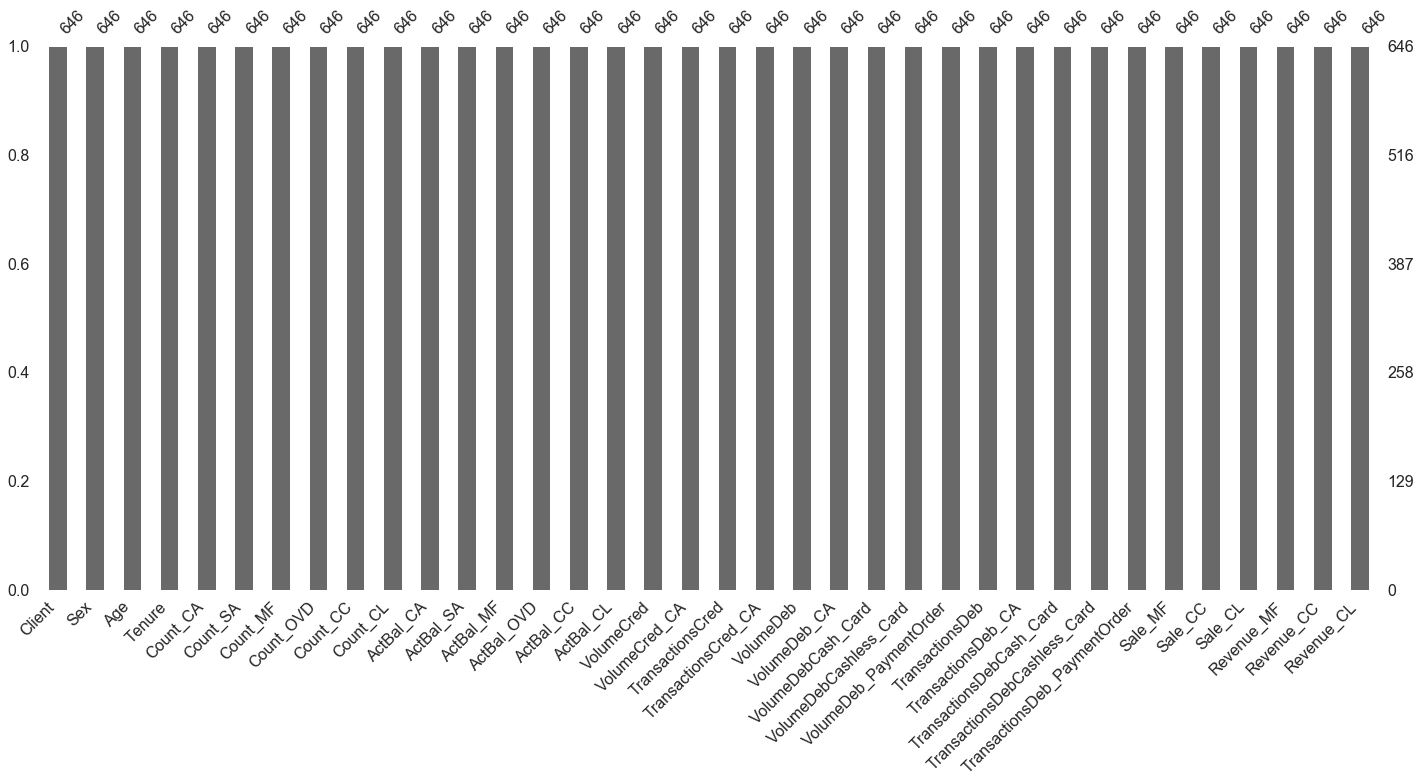

In [1162]:
#Barplot showing miss values
import missingno as msno
msno.bar(df_2_40_3)

### DataFrame : Exploration of the whole dataset

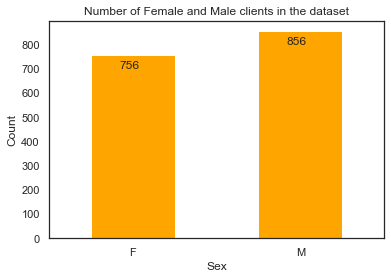

In [704]:
## Create the plot 
df_Soc_Dem.groupby('Sex').size().plot(kind='bar', color = "Orange")
plt.xlabel('Sex')
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title('Number of Female and Male clients in the dataset')
## Number of males and females
nb_female = df_Soc_Dem.groupby('Sex').apply(lambda x: x[x=='F'].count())
nb_male = df_Soc_Dem.groupby('Sex').apply(lambda x: x[x=='M'].count())

## Addind the value labels
plt.text(-0.08, 700, '756')
plt.text(0.92, 800,'856');
## Isolating dataframes of both genders
female = df_Soc_Dem[df_Soc_Dem['Sex'] == 'F']
male = df_Soc_Dem[df_Soc_Dem['Sex'] == 'M']


In [705]:
df_Soc_Dem.groupby('Sex').count()
#df_Soc_Dem[['Sex']].describe()
#df_Soc_Dem[['Age','Tenure']].describe()

,Client,Age,Tenure
Sex,,,
F,756,756,756
M,856,856,856


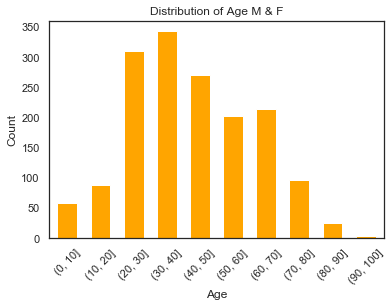

In [706]:
#Data Visualization
#Age histogram
bins = [0,10,20,30,40,50,60,70,80,90,100]
groups = df_Soc_Dem.groupby(pd.cut(df_Soc_Dem['Age'], bins)).count()
groups['Age'].plot.bar(width=0.6, color='Orange')
plt.xlabel('Age')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title('Distribution of Age M & F')
nb_female = df_Soc_Dem.groupby('Age').apply(lambda x: x[x=='F'].count())
nb_male = df_Soc_Dem.groupby('Age').apply(lambda x: x[x=='M'].count())


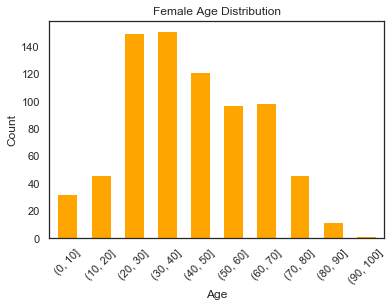

In [707]:
#Age histogram
df_Soc_Dem_fem = df_Soc_Dem[df_Soc_Dem['Sex'] == 'F']
bins = [0,10,20,30,40,50,60,70,80,90,100]
groups = df_Soc_Dem_fem.groupby(pd.cut(df_Soc_Dem_fem["Age"], bins)).count()
groups["Age"].plot.bar(width=0.6, color='Orange')
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title('Female Age Distribution');



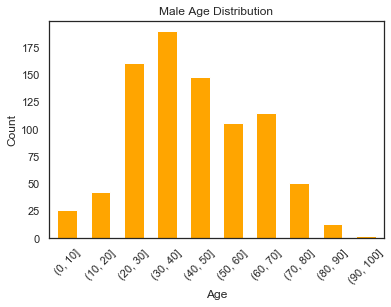

In [708]:
#Age histogram
df_Soc_Dem_male = df_Soc_Dem[df_Soc_Dem['Sex'] == 'M']
bins = [0,10,20,30,40,50,60,70,80,90,100]
groups = df_Soc_Dem_male.groupby(pd.cut(df_Soc_Dem_male["Age"], bins)).count()
groups["Age"].plot.bar(width=0.6, color='Orange')
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title('Male Age Distribution');


Is this necessary?

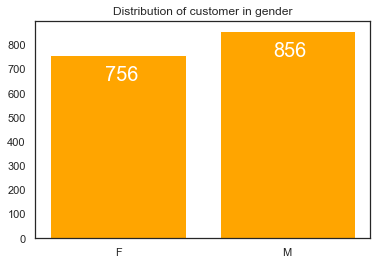

In [709]:
height = df_Soc_Dem.groupby('Sex').size()
bins=['F','M']
width =0.5
x = np.arange(len(bins)) # the locatuibs fir the groups
# plt.bar(height=C_Sex)
plt.bar(x, height,color = 'orange')
plt.xticks(x,bins)
plt.text(-0.08,650,756,{'color':'w','fontsize':20})
plt.text(0.92,750,856,{'color':'w','fontsize':20})
plt.title('Distribution of customer in gender')
plt.show()

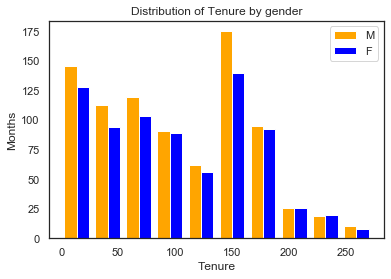

In [710]:
#Data Visualization
# bins = [0,30,60,90,120,150,180,210,240,270,300]
genders=['M','F']
colors = ['orange','blue']
# groups = df1.groupby(pd.cut(df1['Tenure'], bins)).count()
# groups['Tenure'].plot.bar(width=0.6, color='Blue')
plt.hist([df_Soc_Dem.loc[df_Soc_Dem['Sex'] == x, 'Tenure'] for x in genders], label=genders, color=colors)
plt.xlabel('Tenure')
plt.ylabel("Months")
plt.legend(['M','F'])
#plt.xticks(rotation=45)
plt.title('Distribution of Tenure by gender');

# 2. DataFrame : Exploration of the 'positive' clients

### Analysis 1 : Targeting Frequency results

In [711]:
####Analysis 1: Targeting frequency results

#Total number of offers (target variable sale) per customer (SUM)
df2['Sale_Total'] = df2['Sale_MF']+df2['Sale_CC']+df2['Sale_CL']

#Total nomber of clients in each category
nb_0_resp = df2.loc[df2['Sale_Total'] == 0,'Client'].count()
nb_1_resp = df2.loc[df2['Sale_Total'] == 1,'Client'].count()
nb_2_resp = df2.loc[df2['Sale_Total'] == 2,'Client'].count()
nb_3_resp = df2.loc[df2['Sale_Total'] == 3,'Client'].count()
NB_resp = np.array([nb_0_resp,nb_1_resp,nb_2_resp,nb_3_resp])

#checking matching
df2['Client'].count() == (nb_0_resp + nb_1_resp + nb_2_resp + nb_3_resp)

Freq_0_resp = round((nb_0_resp/(df2['Client'].count()))*100,1)
Freq_1_resp = round((nb_1_resp/(df2['Client'].count()))*100,1)
Freq_2_resp = round((nb_2_resp/(df2['Client'].count()))*100,1)
Freq_3_resp = round((nb_3_resp/(df2['Client'].count()))*100,1)
Frequency_resp = np.array([Freq_0_resp,Freq_1_resp,Freq_2_resp,Freq_3_resp])

#checking matching : error evaluated at 0.00000000000001
round((Freq_0_resp + Freq_1_resp + Freq_2_resp + Freq_3_resp),1) == 100

#creation of the dataframe
columns = ["#Client","%Partition"]
data = {'#Client': NB_resp, '%Partition': Frequency_resp}
rows = ["0 response", "1 response", "2 responses","3 responses"]
df_freq = pd.DataFrame(data=data, index=rows, columns=columns)
df_freq


,#Client,%Partition
0 response,388,40.8
1 response,421,44.3
2 responses,128,13.5
3 responses,14,1.5


### Analysis 2 : Targeting Value Results

In [712]:
####Analysis 2: Targeting value results

#Total number of offers (target variable sale) per customer (SUM)
df2['Revenue_Total'] = df2['Revenue_MF']+df2['Revenue_CC']+df2['Revenue_CL']

#Total revenues for every type of clients in each category
nb_0_rev = round(df2.loc[df2['Sale_Total'] == 0,'Revenue_Total'].sum(),1)
nb_1_rev = round(df2.loc[df2['Sale_Total'] == 1,'Revenue_Total'].sum(),1)
nb_2_rev = round(df2.loc[df2['Sale_Total'] == 2,'Revenue_Total'].sum(),1)
nb_3_rev = round(df2.loc[df2['Sale_Total'] == 3,'Revenue_Total'].sum(),1)
NB_rev_ = np.array([nb_0_rev,nb_1_rev,nb_2_rev,nb_3_rev])

#check the matching
round(df2['Revenue_Total'].sum(),1) == round((nb_0_rev + nb_1_rev + nb_2_rev + nb_3_rev),1)

#Mean revenues for every type of clients in each category
mean_0_rev = round(df2.loc[df2['Sale_Total'] == 0,'Revenue_Total'].mean(),1)
mean_1_rev = round(df2.loc[df2['Sale_Total'] == 1,'Revenue_Total'].mean(),1)
mean_2_rev = round(df2.loc[df2['Sale_Total'] == 2,'Revenue_Total'].mean(),1)
mean_3_rev = round(df2.loc[df2['Sale_Total'] == 3,'Revenue_Total'].mean(),1)
MEAN_rev_ = np.array([mean_0_rev,mean_1_rev,mean_2_rev,mean_3_rev])


#Mean CL revenues for CL sales
cl_mean_0_rev = round(df2.loc[df2['Sale_CL'] == 0,'Revenue_CL'].mean(),1)
cl_mean_1_rev = round(df2.loc[df2['Sale_CL'] == 1,'Revenue_CL'].mean(),1)
cl_mean_2_rev = round(df2.loc[df2['Sale_CL'] == 2,'Revenue_CL'].mean(),1)
cl_mean_3_rev = round(df2.loc[df2['Sale_CL'] == 3,'Revenue_CL'].mean(),1)
cl_MEAN_rev_ = np.array([cl_mean_0_rev,cl_mean_1_rev,cl_mean_2_rev,cl_mean_3_rev])

#Mean MF revenues for MF sales
mf_mean_0_rev = round(df2.loc[df2['Sale_MF'] == 0,'Revenue_MF'].mean(),1)
mf_mean_1_rev = round(df2.loc[df2['Sale_MF'] == 1,'Revenue_MF'].mean(),1)
mf_mean_2_rev = round(df2.loc[df2['Sale_MF'] == 2,'Revenue_MF'].mean(),1)
mf_mean_3_rev = round(df2.loc[df2['Sale_MF'] == 3,'Revenue_MF'].mean(),1)
mf_MEAN_rev_ = np.array([mf_mean_0_rev,mf_mean_1_rev,mf_mean_2_rev,mf_mean_3_rev])

#Mean CC revenues for CC sales
cc_mean_0_rev = round(df2.loc[df2['Sale_CC'] == 0,'Revenue_CC'].mean(),1)
cc_mean_1_rev = round(df2.loc[df2['Sale_CC'] == 1,'Revenue_CC'].mean(),1)
cc_mean_2_rev = round(df2.loc[df2['Sale_CC'] == 2,'Revenue_CC'].mean(),1)
cc_mean_3_rev = round(df2.loc[df2['Sale_CC'] == 3,'Revenue_CC'].mean(),1)
cc_MEAN_rev_ = np.array([cc_mean_0_rev,cc_mean_1_rev,cc_mean_2_rev,cc_mean_3_rev])

#Repartition revenues
Freq_0_rev = round((nb_0_rev/(df2['Revenue_Total'].sum()))*100,1)
Freq_1_rev = round((nb_1_rev/(df2['Revenue_Total'].sum()))*100,1)
Freq_2_rev = round((nb_2_rev/(df2['Revenue_Total'].sum()))*100,1)
Freq_3_rev = round((nb_3_rev/(df2['Revenue_Total'].sum()))*100,1)
Revenues_freq = np.array([Freq_0_rev,Freq_1_rev,Freq_2_rev,Freq_3_rev])

#creation of the dataframe
columns = ["#Client","%Clients", "%Revenues", "TT Sum Revenues",'TT Mean Revenues','CL Mean Revenue','MF Mean Revenue','CC Mean Revenue']
data = {'#Client': NB_resp,'%Clients': Frequency_resp , "%Revenues" : Revenues_freq , 'TT Sum Revenues': NB_rev_, 'TT Mean Revenues':MEAN_rev_,'CL Mean Revenue':cl_MEAN_rev_,'MF Mean Revenue':mf_MEAN_rev_,'CC Mean Revenue':cc_MEAN_rev_}
rows = ["0 response", "1 response", "2 responses","3 responses"]
df_value = pd.DataFrame(data=data, index=rows, columns=columns)
df_value


,#Client,%Clients,%Revenues,TT Sum Revenues,TT Mean Revenues,CL Mean Revenue,MF Mean Revenue,CC Mean Revenue
0 response,388,40.8,0.0,0.0,0.0,0.0,0.0,0.0
1 response,421,44.3,59.4,4715.5,11.2,12.0,9.7,11.0
2 responses,128,13.5,30.5,2423.6,18.9,NaN,NaN,NaN
3 responses,14,1.5,10.1,802.1,57.3,NaN,NaN,NaN


In [713]:
Revenues = df2[['Revenue_MF','Revenue_CC','Revenue_CL']].iloc[:,-3:].copy()
Revenue_agg = Revenues.agg(['sum',"mean","std"])
Revenue_agg

,Revenue_MF,Revenue_CC,Revenue_CL
sum,1865.340000,2603.080000,3472.739286
mean,1.961451,2.737203,3.651671
std,10.033797,17.855762,7.784000


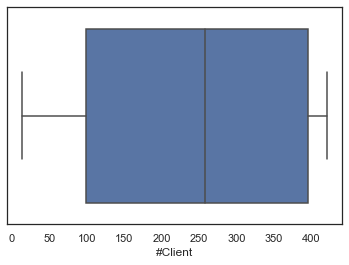

In [714]:
# Boxplot for valueFreq
sns.boxplot(x=df_value["#Client"]);

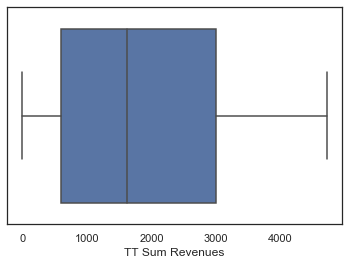

In [715]:
sns.boxplot(x=df_value["TT Sum Revenues"]);

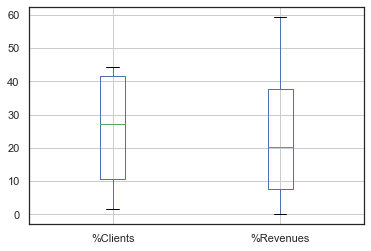

In [716]:
df_value.boxplot(column=["%Clients", "%Revenues"]);

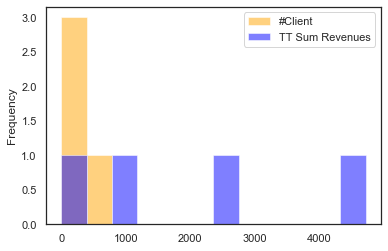

In [717]:
df_value_freq_1 = df_value[["#Client","TT Sum Revenues"]]
ax = df_value_freq_1.plot.hist(bins=12, alpha=0.5,color = ['orange','blue']);

### Explore correlations : Focus on the whole dataset

In [718]:
df2_dem_sales = df2[['Sex','Age','Tenure','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL']]

df3_dem_sales = df2[['Sex','Age','Tenure','Sale_Total','Revenue_Total']]

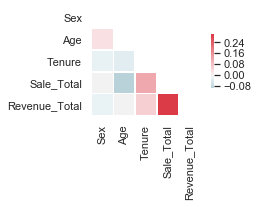

In [719]:
# Plot correlation matrix
def plot_corr(df3_dem_sales,size=10):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df3_dem_sales.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size-2))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_corr(df3_dem_sales,size=4)

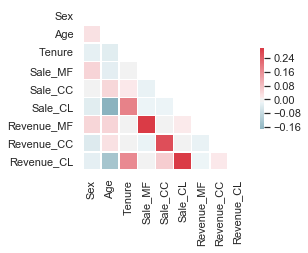

In [720]:
# Plot correlation matrix
def plot_corr(df2_dem_sales,size=10):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df2_dem_sales.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size-2))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_corr(df2_dem_sales[1:],size=5)

#### RESULT INSIGHTS : High correlation btw
# TENURE : Sale_CL, Revenue_CL
# AGE : Sale_CC, Revenue_CC, Revenue_MF  (not Sale_MF nor CL)
# obiously : Sale_MF <> Revenue_MF   /  Sale_CC <> Revenue_CC   / Sale_CL <> Revenue_CL 

In [721]:
#variables
CC_ = df2.loc[:, df2.columns.str.endswith("CC")]
CL_ = df2.loc[:, df2.columns.str.endswith("CL")]
MF_ = df2.loc[:, df2.columns.str.endswith("MF")]
CA_ = df2.loc[:, df2.columns.str.endswith("CA")]
SA_ = df2.loc[:, df2.columns.str.endswith("SA")]
OVD_ = df2.loc[:, df2.columns.str.endswith("OVD")]
df_variables = pd.concat([CC_,CL_,MF_,CA_,SA_,OVD_],sort=False)

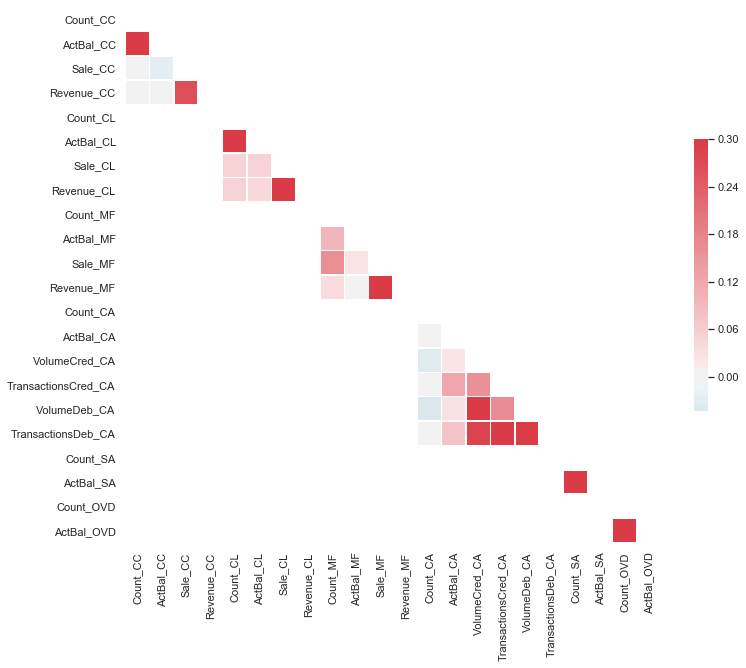

In [722]:
# Plot correlation matrix
def plot_corr(df_variables,size=10):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df_variables.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size-2))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_corr(df_variables,size=12)

#   >>>> HIGH CORRELATION WITH THE SALE / REVENUE OF THE SAME TYPE : obvious

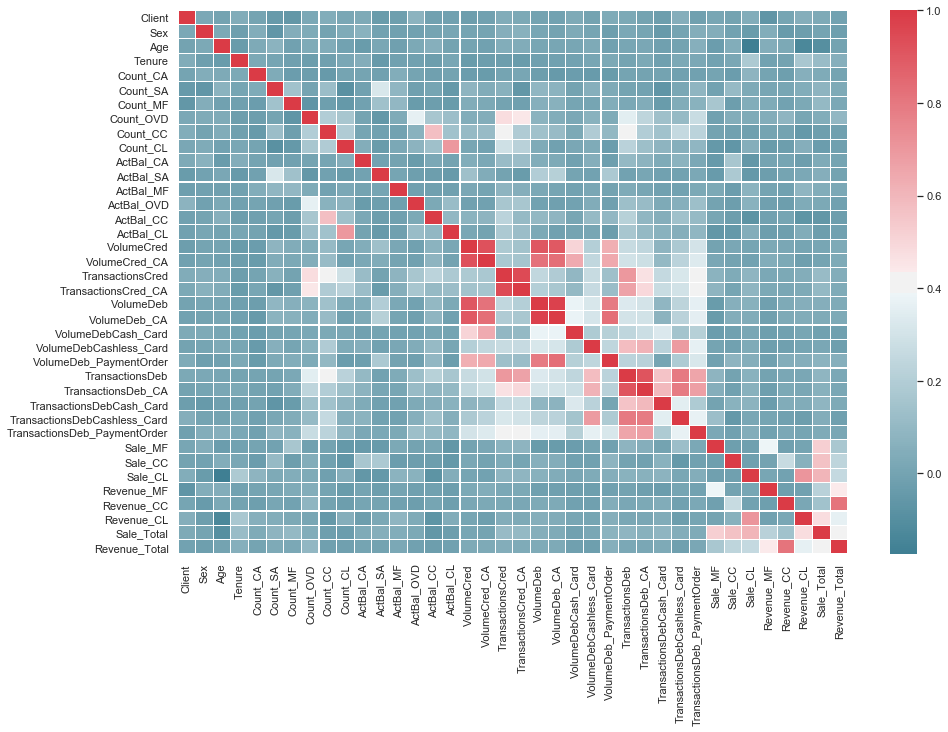

In [723]:
corrmat = df2.corr() 
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
f, ax = plt.subplots(figsize =(15, 10)) 
sns.heatmap(corrmat, ax = ax, cmap =cmap, linewidths = 0.1) 


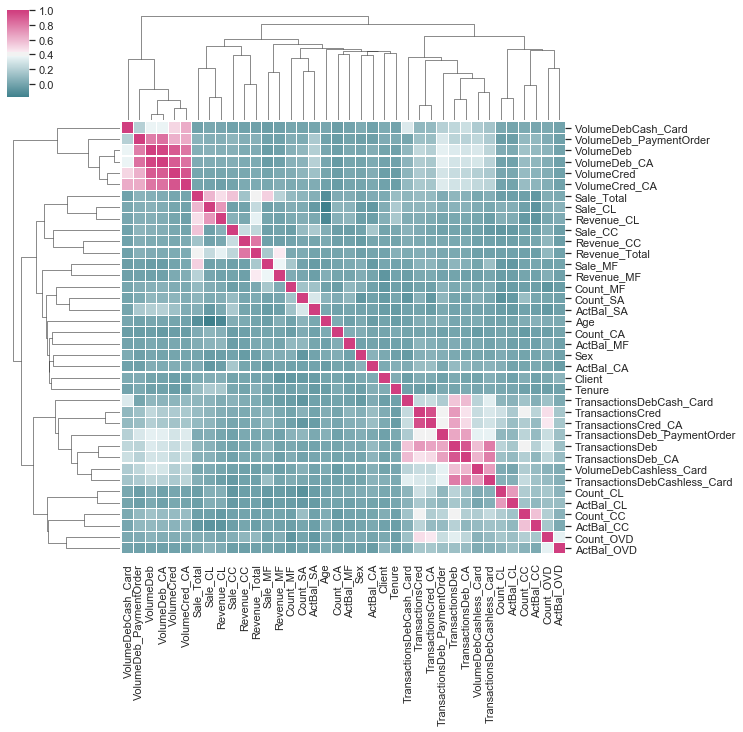

In [724]:
corrmat2 = df2.corr() 

#cmap = sns.diverging_palette(220, 10, as_cmap=True)  
import seaborn as seaborn
cmap = seaborn.diverging_palette(210, 350, as_cmap=True)

cg = sns.clustermap(corrmat2, cmap =cmap, linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg

## Explore correlations : Focus on studying 'positive' clients

#### DataFrame creation with only positive responding clients

In [725]:
#Summarizing the responses to the 3 offers : Data from 0 to 3
df2['Sale_Total'] = df2['Sale_MF']+df2['Sale_CC']+df2['Sale_CL'] 

#Summarizing the responses in a binary way : Responds or not
#1 standing for YES already responded at least one time and 0 standing for NO
df2['Responding_Client'] = np.where(df2['Sale_Total'] != 0, '1', '0') 
#Create a dataframe with only responding clients : df_yes
df_yes = df2.loc[df2['Responding_Client'].isin(['1'])]
#Create a dataframe with only responding clients : df_no
df_no = df2.loc[df2['Responding_Client'].isin(['0'])]

#checking mapping
len(df2) == len(df_yes) + len(df_no)

True

#### HEATMAP : Clients who responded at least once to a sale offer

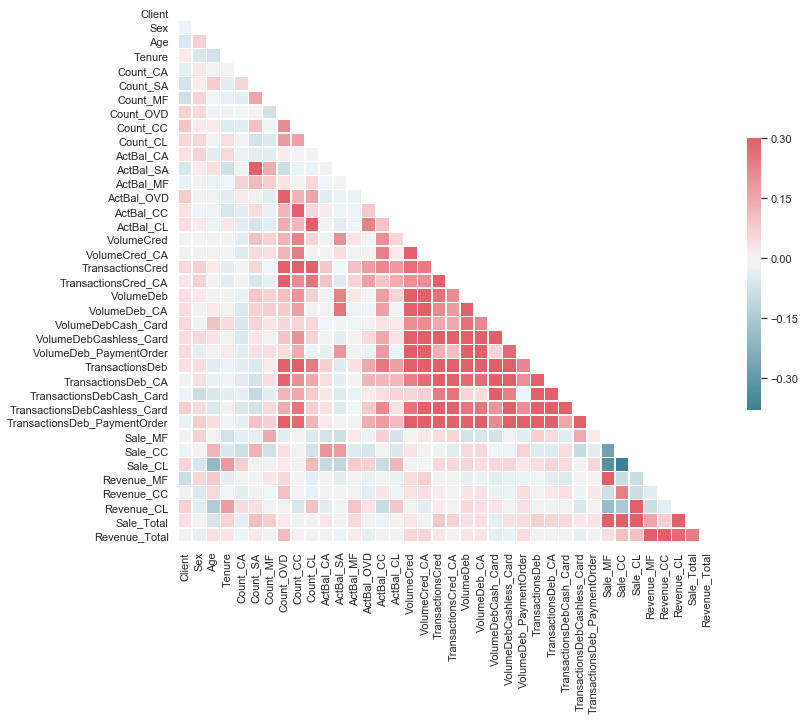

In [726]:
## CLIENTS WHO RESPONDED AT LEAST ONCE TO SALE

def plot_corr(df_yes,size=10):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df_yes.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size-2))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_corr(df_yes,size=12)


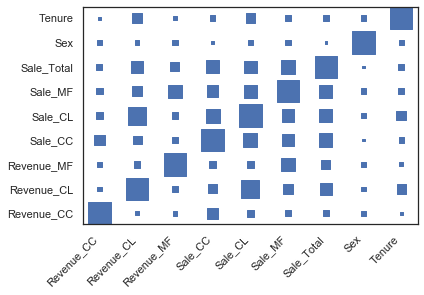

In [727]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), 
        y=y.map(y_to_num), 
        s=size * size_scale,
        marker='s') 
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

    
columns = ['Tenure', 'Sale_MF', 'Sale_CC', 'Sale_CL', 'Sale_Total', 'Revenue_MF','Revenue_CC','Revenue_CL','Sex'] 
corr = df_yes[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs())

##### Total Sales Correlation in general

In [728]:
# Total Sales Correlation in general
corrmat = df_yes.corr() 
corrmat.sort_values(['Sale_Total'], ascending = False, inplace = True)
print(corrmat.Sale_Total.head(15))

Sale_Total             1.000000
Sale_MF                0.355639
Sale_CC                0.347720
Sale_CL                0.319246
Revenue_CL             0.310285
Revenue_Total          0.241576
Revenue_MF             0.156748
Count_SA               0.105355
TransactionsCred       0.083229
Count_MF               0.076738
Revenue_CC             0.068921
TransactionsDeb        0.064574
TransactionsCred_CA    0.061745
Tenure                 0.061556
TransactionsDeb_CA     0.056827
Name: Sale_Total, dtype: float64


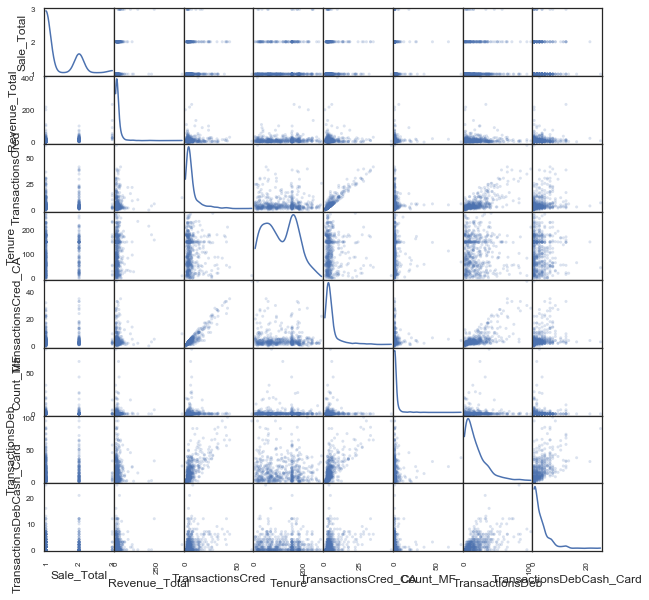

In [729]:
from pandas.plotting import scatter_matrix
attributes = ["Sale_Total","Revenue_Total","TransactionsCred","Tenure","TransactionsCred_CA","Count_MF","TransactionsDeb","TransactionsDebCash_Card"]
scatter_matrix(df_yes[attributes], figsize=(10, 10), alpha=0.2, diagonal='kde');


In [730]:
#Correlation of the positive respondants : PRODUCT CL
corrmat = df2.corr() 

corrmat.sort_values(['Revenue_CL'], ascending = False, inplace = True)
corr_cl_list = corrmat.Revenue_CL.head(15).sort_values(ascending = False)
corr_cl_list

Revenue_CL                1.000000
Sale_CL                   0.710391
Sale_Total                0.481550
Revenue_Total             0.364996
Tenure                    0.169554
ActBal_MF                 0.084775
Sale_CC                   0.060569
Count_CA                  0.058075
VolumeDeb_PaymentOrder    0.055015
VolumeDeb                 0.054608
Client                    0.054513
Count_CL                  0.053863
TransactionsCred          0.046733
Count_SA                  0.042574
ActBal_CL                 0.041313
Name: Revenue_CL, dtype: float64

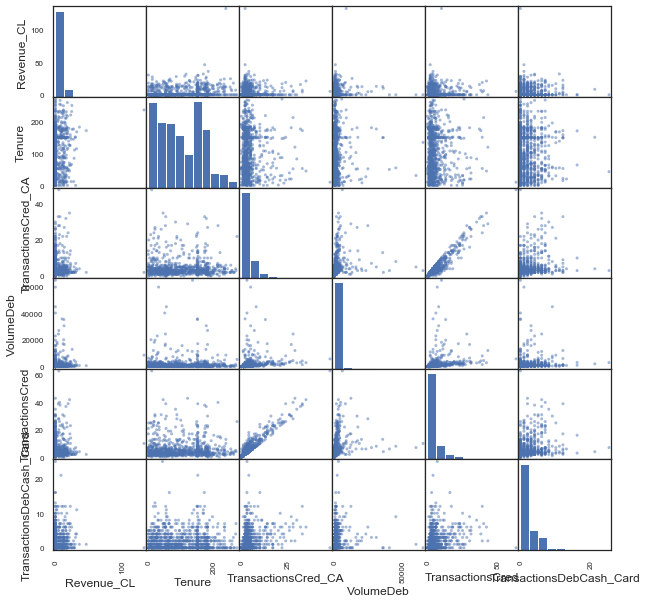

In [731]:
from pandas.plotting import scatter_matrix
attributes = ["Revenue_CL","Tenure", "TransactionsCred_CA","VolumeDeb","TransactionsCred","TransactionsDebCash_Card"]
scatter_matrix(df2[attributes], figsize=(10, 10));

##### PRODUCT CC

In [732]:
#Correlation of the positive respondants : PRODUCT CC
corrmat = df2.corr() 
corrmat.sort_values(['Revenue_CC'], ascending = False, inplace = True)
corr_cc_list = corrmat.Revenue_CC.head(15).sort_values(ascending = False)
corr_cc_list

Revenue_CC                      1.000000
Revenue_Total                   0.815466
Sale_CC                         0.266215
Sale_Total                      0.144281
Count_OVD                       0.083967
VolumeDeb_PaymentOrder          0.049989
TransactionsDebCash_Card        0.038117
VolumeDeb                       0.029173
VolumeDeb_CA                    0.028365
TransactionsCred                0.027156
Age                             0.026714
TransactionsDeb_CA              0.024509
VolumeCred_CA                   0.024065
TransactionsDeb_PaymentOrder    0.021612
VolumeCred                      0.018452
Name: Revenue_CC, dtype: float64

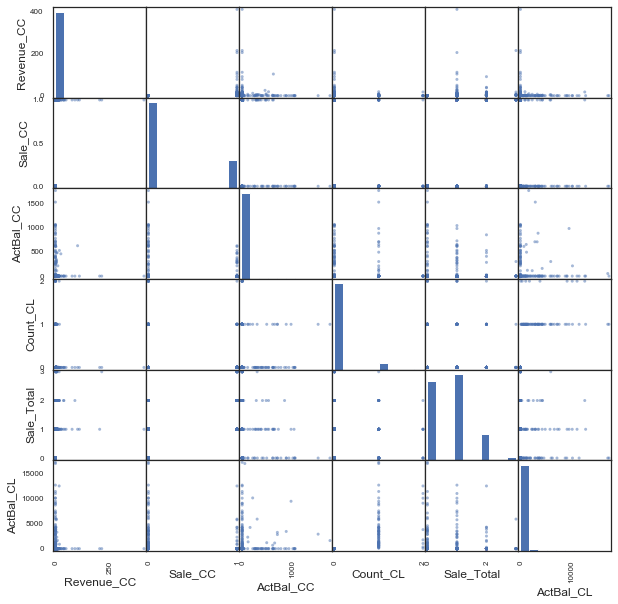

In [733]:
from pandas.plotting import scatter_matrix
attributes = ["Revenue_CC","Sale_CC", "ActBal_CC","Count_CL","Sale_Total","ActBal_CL"]
scatter_matrix(df2[attributes], figsize=(10, 10));

##### PRODUCT MF

In [734]:
#Correlation of the positive respondants : PRODUCT MF
corrmat = df_yes.corr() 

corrmat.sort_values(['Revenue_MF'], ascending = False , inplace = True)
corr_mf_list = corrmat.Revenue_MF.head(15).sort_values(ascending = False)
corr_mf_list

Revenue_MF                      1.000000
Revenue_Total                   0.415103
Sale_MF                         0.356698
Sale_Total                      0.156748
Age                             0.081016
VolumeCred_CA                   0.068413
Sex                             0.057760
Count_OVD                       0.052713
VolumeCred                      0.044408
Count_MF                        0.026500
TransactionsCred_CA             0.011547
Count_CC                        0.010330
TransactionsCred                0.009851
Count_SA                        0.006048
TransactionsDebCashless_Card    0.001705
Name: Revenue_MF, dtype: float64

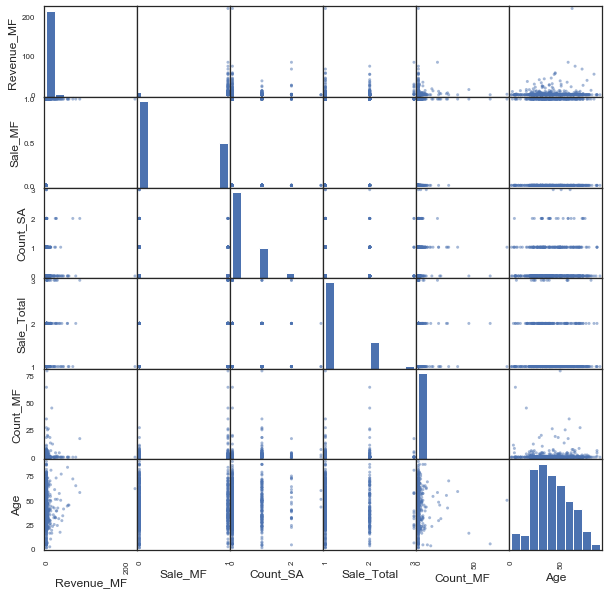

In [735]:
from pandas.plotting import scatter_matrix
attributes = ["Revenue_MF","Sale_MF", "Count_SA","Sale_Total","Count_MF",'Age']
scatter_matrix(df_yes[attributes], figsize=(10, 10));

#### NEW METRIC : PROFITABILITY

In [736]:
#df_yes['%Profitability'] = round((df_yes['Revenue_Total']/df_yes['Tenure'])*100,2)
#print(df_yes['%Profitability'])
#df_yes.plot(x="Sale_Total", y="Revenue_Total", kind="scatter", label="% Profitability");

In [737]:
from scipy import stats
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [738]:
#df_out = remove_outlier(df_yes,'%Profitability')
#df_yes['%Profitability_bis'] = df_out["%Profitability"].replace(np.NaN,0)

#ax = df_yes.plot(x="Sale_Total", y="%Profitability_bis", kind="scatter", label="% Profitability")
##df_yes.sort_values("Revenue_Total").plot(x="Sale_Total", y="Revenue_Total", ax=ax, color="green", label="Revenue_Total")

In [739]:
### df_yes['Profitability'] = df_yes['%Profitability']
#corrmat #= df_yes.corr() 
#corrmat.sort_values(['Profitability'], ascending = False , inplace = True)
#corr_mf_list = corrmat.Profitability.head(15).sort_values(ascending = False)
#corr_mf_list

# ------------ SALES

# 3. MODELS EXPLORATION : Which to choose for each Sale objective

In [740]:
df2 = df2.drop(['Responding_Client','Sale_Total','Revenue_Total'], axis=1)
print(df2.head(0))

Empty DataFrame
Columns: [Client, Sex, Age, Tenure, Count_CA, Count_SA, Count_MF, Count_OVD, Count_CC, Count_CL, ActBal_CA, ActBal_SA, ActBal_MF, ActBal_OVD, ActBal_CC, ActBal_CL, VolumeCred, VolumeCred_CA, TransactionsCred, TransactionsCred_CA, VolumeDeb, VolumeDeb_CA, VolumeDebCash_Card, VolumeDebCashless_Card, VolumeDeb_PaymentOrder, TransactionsDeb, TransactionsDeb_CA, TransactionsDebCash_Card, TransactionsDebCashless_Card, TransactionsDeb_PaymentOrder, Sale_MF, Sale_CC, Sale_CL, Revenue_MF, Revenue_CC, Revenue_CL]
Index: []

[0 rows x 36 columns]


### FOCUS 1 : SALE_MF 

#### 1. CREATE THE TRAINING SET FOR THE SALE_MF TARGET

In [741]:
MF_ = df2.loc[:, df2.columns.str.endswith("MF")]
#print(MF_.head(0))

In [742]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_mf = df2[['Sale_MF']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


In [743]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_mf, x_test_mf, y_train_mf,y_test_mf = train_test_split(x,y_mf,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_mf.shape)
print('Training Labels Shape:', y_train_mf.shape)
print('Testing Features Shape:', x_test_mf.shape)
print('Testing Labels Shape:', y_test_mf.shape)

Training Features Shape: (760, 24)
Training Labels Shape: (760, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1)


#### 2. EVALUATE ACCURACY OF MODELS ON THE SALE_MF TARGET

##### DECISION TREE REGRESSOR

In [744]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor()

#Plug the model to the training set
mf_model_dt = regressor.fit(x_train_mf,y_train_mf)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_dt_mf = cross_val_score(mf_model_dt, x_train_mf, y_train_mf, cv=5, scoring='accuracy')
scval_dt_mf = print("CROSS VALIDATION\nAccuracy Score of the DT model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_dt_mf.mean(), scores_cross_val_dt_mf.std() * 2),'\n')
scval_dt_mf 

#Evaluate the model on the test set
mf_predictions_dt_test = mf_model_dt.predict(x_test_mf)
mf_acc_dt = round(accuracy_score(y_test_mf,mf_predictions_dt_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_dt)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test_mf, mf_predictions_dt_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_dt_test),3),'\n\n')
#print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_dt_test),3)))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_dt = confusion_matrix(y_test_mf,mf_predictions_dt_test)
print(cmx_mf_dt,'\n')
TP_mf_dt = cmx_mf_dt[1,1]
TN_mf_dt = cmx_mf_dt[0,0]
FP_mf_dt = cmx_mf_dt[0,1]
FN_mf_dt = cmx_mf_dt[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_dt[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_dt[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_dt[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_dt[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_mf_dt_micro = precision_score(y_test_mf, mf_predictions_dt_test, average='micro')
precision_mf_dt_weighted = precision_score(y_test_mf, mf_predictions_dt_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_dt_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_dt_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_dt_micro = recall_score(y_test_mf, mf_predictions_dt_test, average='micro')
recall_mf_dt_weighted = recall_score(y_test_mf, mf_predictions_dt_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_dt_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_dt_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the DT model on Sale_MF : 0.70 (+/- 0.05) 

TEST SET
Accuracy Score : 0.67
Mean Absolute Error: 0.33
Mean Squared Error: 0.33 


CONFUSION MATRIX (Test Set)
[[120  25]
 [ 38   8]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 8
TN (True Negative)                   Negative responding clients well predicted : 120
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 25
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 38 


Precision Rate - Micro : 0.67
Precision Rate - Weighted : 0.635 

Recall Rate - Micro : 0.67
Recall Rate - Weighted : 0.67 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### K-NEAREST NEIGHBOR MODEL

In [745]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 4) #4 is the best classifier in this case

#Plug the model to the training set
mf_model_knn = knn.fit(x_train_mf,y_train_mf.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_knn_mf = cross_val_score(mf_model_knn, x_train_mf, y_train_mf, cv=5, scoring='accuracy')
scval_knn_mf = print("CROSS VALIDATION\nAccuracy Score of the KNN model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_knn_mf.mean(), scores_cross_val_knn_mf.std() * 2),'\n')
scval_knn_mf 

#Evaluate the model on the test set
mf_predictions_knn_test = mf_model_knn.predict(x_test_mf)
mf_acc_knn = round(accuracy_score(y_test_mf,mf_predictions_knn_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_knn)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_knn_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_knn_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_knn_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_knn = confusion_matrix(y_test_mf,mf_predictions_knn_test)
print(cmx_mf_knn,'\n')
TP_mf_knn = cmx_mf_knn[1,1]
TN_mf_knn = cmx_mf_knn[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_knn[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_knn[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_knn[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_knn[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_mf_knn_micro = precision_score(y_test_mf, mf_predictions_knn_test, average='micro')
precision_mf_knn_weighted = precision_score(y_test_mf, mf_predictions_knn_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_knn_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_knn_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_knn_micro = recall_score(y_test_mf, mf_predictions_knn_test, average='micro')
recall_mf_knn_weighted = recall_score(y_test_mf, mf_predictions_knn_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_knn_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_knn_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the KNN model on Sale_MF : 0.81 (+/- 0.02) 

TEST SET
Accuracy Score : 0.77
Mean Absolute Error: 0.23
Mean Squared Error: 0.23
Root Mean Squared Error: 0.48 

CONFUSION MATRIX (Test Set)
[[143   2]
 [ 42   4]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 4
TN (True Negative)                   Negative responding clients well predicted : 143
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 2
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 42 


Precision Rate - Micro : 0.77
Precision Rate - Weighted : 0.747 

Recall Rate - Micro : 0.77
Recall Rate - Weighted : 0.77 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### LOGISTIC REGRESSION

In [746]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression(max_iter=1000) #solver sklearn
import warnings
warnings.filterwarnings('ignore')

#Plug the model to the training set
mf_model_lr = logmodel.fit(x_train_mf,y_train_mf.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_lr_mf = cross_val_score(mf_model_lr, x_train_mf, y_train_mf, cv=5, scoring='accuracy')
scval_lr_mf= print("CROSS VALIDATION\nAccuracy Score of the Logistic Regression model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_lr_mf.mean(), scores_cross_val_lr_mf.std() * 2),'\n')
scval_lr_mf 

#Evaluate the model on the test set
mf_predictions_lr_test = mf_model_lr.predict(x_test_mf)
mf_acc_lr = round(accuracy_score(y_test_mf,mf_predictions_lr_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_lr)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_lr_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_lr_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_lr_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lr = confusion_matrix(y_test_mf,mf_predictions_lr_test)
print(cmx_mf_lr,'\n')
TP_mf_lr = cmx_mf_lr[1,1]
TN_mf_lr = cmx_mf_lr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_lr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_lr[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_mf_lr_micro = precision_score(y_test_mf, mf_predictions_lr_test, average='micro')
precision_mf_lr_weighted = precision_score(y_test_mf, mf_predictions_lr_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_lr_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_lr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_lr_micro = recall_score(y_test_mf, mf_predictions_lr_test, average='micro')
recall_mf_lr_weighted = recall_score(y_test_mf, mf_predictions_lr_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_lr_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_lr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the Logistic Regression model on Sale_MF : 0.81 (+/- 0.03) 

TEST SET
Accuracy Score : 0.77
Mean Absolute Error: 0.23
Mean Squared Error: 0.23
Root Mean Squared Error: 0.48 

CONFUSION MATRIX (Test Set)
[[145   0]
 [ 44   2]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 2
TN (True Negative)                   Negative responding clients well predicted : 145
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 44 


Precision Rate - Micro : 0.77
Precision Rate - Weighted : 0.823 

Recall Rate - Micro : 0.77
Recall Rate - Weighted : 0.77 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### SVM

In [747]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svmmodel = svm.SVC()

#Plug the model to the training set
mf_model_svm = svmmodel.fit(x_train_mf,y_train_mf.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_svm_mf = cross_val_score(mf_model_svm, x_train_mf, y_train_mf, cv=5, scoring='accuracy')
scval_svm_mf= print("CROSS VALIDATION\nAccuracy Score of the SVM model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_svm_mf.mean(), scores_cross_val_svm_mf.std() * 2),'\n')
scval_svm_mf 

#Evaluate the model on the test set
mf_predictions_svm_test = mf_model_svm.predict(x_test_mf)
mf_acc_svm = round(accuracy_score(y_test_mf,mf_predictions_svm_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_svm)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_svm_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_svm_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_svm_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_svm = confusion_matrix(y_test_mf,mf_predictions_svm_test)
print(cmx_mf_svm,'\n')
TP_mf_svm = cmx_mf_svm[1,1]
TN_mf_svm = cmx_mf_svm[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_svm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_svm[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_svm[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_svm[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_mf_svm_micro = precision_score(y_test_mf, mf_predictions_svm_test, average='micro')
precision_mf_svm_weighted = precision_score(y_test_mf, mf_predictions_svm_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_svm_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_svm_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_svm_micro = recall_score(y_test_mf, mf_predictions_svm_test, average='micro')
recall_mf_svm_weighted = recall_score(y_test_mf, mf_predictions_svm_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_svm_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_svm_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the SVM model on Sale_MF : 0.81 (+/- 0.01) 

TEST SET
Accuracy Score : 0.759
Mean Absolute Error: 0.241
Mean Squared Error: 0.241
Root Mean Squared Error: 0.491 

CONFUSION MATRIX (Test Set)
[[145   0]
 [ 46   0]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 0
TN (True Negative)                   Negative responding clients well predicted : 145
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 46 


Precision Rate - Micro : 0.759
Precision Rate - Weighted : 0.576 

Recall Rate - Micro : 0.759
Recall Rate - Weighted : 0.759 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### LDA

In [748]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_mf = sc.fit_transform(x_train_mf)
x_test_mf = sc.transform(x_test_mf)

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_train_mf = lda.fit_transform(x_train_mf, y_train_mf)
x_test_mf = lda.transform(x_test_mf)

# Comparison w/Random Forest
from sklearn.ensemble import RandomForestClassifier
mf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
mf_classifier_lda = mf_classifier.fit(x_train_mf, y_train_mf)#.values.ravel()

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_lda_mf = cross_val_score(mf_classifier_lda, x_train_mf, y_train_mf, cv=5, scoring='accuracy')
scval_lda_mf = print("CROSS VALIDATION\nAccuracy Score of the LDA model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_lda_mf.mean(), scores_cross_val_lda_mf.std() * 2),'\n')
scval_lda_mf 

#Evaluate the model on the test set
mf_predictions_lda_test = mf_classifier_lda.predict(x_test_mf)
mf_acc_lda = round(accuracy_score(y_test_mf,mf_predictions_lda_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_lda)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_lda_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_lda_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_lda_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lda = confusion_matrix(y_test_mf,mf_predictions_lda_test)
print(cmx_mf_lda,'\n')
TP_mf_lda = cmx_mf_lda[1,1]
TN_mf_lda = cmx_mf_lda[0,0]
FP_mf_lda = cmx_mf_lda[0,1]
FN_mf_lda = cmx_mf_lda[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lda[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lda[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_lda[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_lda[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_mf_lda_micro = precision_score(y_test_mf, mf_predictions_lda_test, average='micro')
precision_mf_lda_weighted = precision_score(y_test_mf, mf_predictions_lda_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_lda_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_lda_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_lda_micro = recall_score(y_test_mf, mf_predictions_lda_test, average='micro')
recall_mf_lda_weighted = recall_score(y_test_mf, mf_predictions_lda_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_lda_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_lda_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the LDA model on Sale_MF : 0.81 (+/- 0.02) 

TEST SET
Accuracy Score : 0.775
Mean Absolute Error: 0.225
Mean Squared Error: 0.225
Root Mean Squared Error: 0.474 

CONFUSION MATRIX (Test Set)
[[141   4]
 [ 39   7]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 7
TN (True Negative)                   Negative responding clients well predicted : 141
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 4
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 39 


Precision Rate - Micro : 0.775
Precision Rate - Weighted : 0.748 

Recall Rate - Micro : 0.775
Recall Rate - Weighted : 0.775 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### RANDOM FOREST

In [749]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_mf_rdf = sc.fit_transform(x_train_mf)
x_test_mf_rdf = sc.transform(x_test_mf)

#definition 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

#Plug the model to the training set
mf_model_rdf = regressor.fit(x_train_mf_rdf, y_train_mf)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_rdf_mf = cross_val_score(mf_model_rdf, x_train_mf_rdf, y_train_mf,cv=5)#,scoring='accuracy') ==> Doesnt work with accuracy
print('not sure it is correct accuracy number as we cannot pass the parameter scoring')
scval_rdf_mf= print("CROSS VALIDATION\nAccuracy Score of the LDA model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_rdf_mf.mean(), scores_cross_val_rdf_mf.std() * 2),'\n')
scval_rdf_mf 

#Evaluate the model on the test set
mf_predictions_rdf_test = mf_model_rdf.predict(x_test_mf_rdf)
#mf_acc_rdf = round(accuracy_score(y_test_mf,mf_predictions_rdf_test),3)
#print("TEST SET\nAccuracy Score :", mf_acc_rdf)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_rdf_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_rdf_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_rdf_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX UNAVAILABLE")
#print("CONFUSION MATRIX (Test Set)")
#cmx_mf_rdf = confusion_matrix(y_test_mf, mf_predictions_rdf_test)
#print(cmx_mf_rdf,'\n')
#print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_rdf[1,1])
#print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_rdf[0,0])
#print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_rdf[0,1])
#print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_rdf[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
#precision_mf_rdf_micro = precision_score(y_test_mf, mf_predictions_rdf_test, average='micro')
#precision_mf_rdf_weighted = precision_score(y_test_mf, mf_predictions_rdf_test, average='weighted')
#print('Precision Rate - Micro :',round(precision_mf_rdf_micro,3))
#print('Precision Rate - Weighted :',round(precision_mf_rdf_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
#recall_mf_rdf_micro = recall_score(y_test_mf, mf_predictions_rdf_test, average='micro')
#recall_mf_rdf_weighted = recall_score(y_test_mf, mf_predictions_rdf_test, average='weighted')
#print('Recall Rate - Micro :',round(recall_mf_rdf_micro,3))
#print('Recall Rate - Weighted :',round(recall_mf_rdf_weighted,3),'\n\n')

#print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


not sure it is correct accuracy number as we cannot pass the parameter scoring
CROSS VALIDATION
Accuracy Score of the LDA model on Sale_MF : -0.43 (+/- 0.41) 

Mean Absolute Error: 0.298
Mean Squared Error: 0.236
Root Mean Squared Error: 0.486 

CONFUSION MATRIX UNAVAILABLE


##### NAIVE BAYES

In [750]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#feature scaling
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
x_train_mf_nby = mmsc.fit_transform(x_train_mf)
x_test_mf_nby = mmsc.transform(x_test_mf)

#Plug the model to the training set
mnb = MultinomialNB()
mf_model_nby = mnb.fit(x_train_mf_nby, y_train_mf)#.values.ravel()

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_nby_mf = cross_val_score(mf_model_nby, x_train_mf_nby, y_train_mf, cv=5, scoring='accuracy')
scval_nby_mf = print("CROSS VALIDATION\nAccuracy Score of the NAIVE BAYERS model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_nby_mf.mean(), scores_cross_val_nby_mf.std() * 2),'\n')
scval_nby_mf 

#Evaluate the model on the test set
mf_predictions_nby_test = mf_model_nby.predict(x_test_mf_nby)
mf_acc_nby = round(accuracy_score(y_test_mf,mf_predictions_nby_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_nby)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_nby_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_nby_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_nby_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_nby = confusion_matrix(y_test_mf,mf_predictions_nby_test)
print(cmx_mf_nby,'\n')
TP_mf_nby = cmx_mf_nby[1,1]
TN_mf_nby = cmx_mf_nby[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_nby[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_nby[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_nby[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_nby[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_nby_micro = precision_score(y_test_mf, mf_predictions_nby_test, average='micro')
precision_mf_nby_weighted = precision_score(y_test_mf, mf_predictions_nby_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_nby_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_nby_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_nby_micro = recall_score(y_test_mf, mf_predictions_nby_test, average='micro')
recall_mf_nby_weighted = recall_score(y_test_mf, mf_predictions_nby_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_nby_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_nby_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the NAIVE BAYERS model on Sale_MF : 0.81 (+/- 0.01) 

TEST SET
Accuracy Score : 0.759
Mean Absolute Error: 0.241
Mean Squared Error: 0.241
Root Mean Squared Error: 0.491 

CONFUSION MATRIX (Test Set)
[[145   0]
 [ 46   0]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 0
TN (True Negative)                   Negative responding clients well predicted : 145
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 46 


Precision Rate - Micro : 0.759
Precision Rate - Weighted : 0.576 

Recall Rate - Micro : 0.759
Recall Rate - Weighted : 0.759 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### XGB Classifier

In [751]:
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
mf_xgb_clf = XGBClassifier()

#Plug the model to the training set
mf_model_xgb = mf_xgb_clf.fit(x_train_mf, y_train_mf)#.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_xgb_mf = cross_val_score(mf_model_xgb, x_train_mf, y_train_mf, cv=5, scoring='accuracy')
scval_xgb_mf = print("CROSS VALIDATION\nAccuracy Score of the XGB model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_xgb_mf.mean(), scores_cross_val_xgb_mf.std() * 2),'\n')
scval_xgb_mf

#Evaluate the model on the test set
mf_predictions_xgb_test = mf_model_xgb.predict(x_test_mf)
mf_acc_xgb = round(accuracy_score(y_test_mf,mf_predictions_xgb_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_xgb)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_xgb_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_xgb_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_xgb_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_xgb = confusion_matrix(y_test_mf,mf_predictions_xgb_test)
print(cmx_mf_xgb,'\n')
TP_mf_xgb = cmx_mf_xgb[1,1]
TN_mf_xgb = cmx_mf_xgb[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_xgb[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_xgb[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_xgb[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_xgb[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_xgb_micro = precision_score(y_test_mf, mf_predictions_xgb_test, average='micro')
precision_mf_xgb_weighted = precision_score(y_test_mf, mf_predictions_xgb_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_xgb_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_xgb_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_xgb_micro = recall_score(y_test_mf, mf_predictions_xgb_test, average='micro')
recall_mf_xgb_weighted = recall_score(y_test_mf, mf_predictions_xgb_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_xgb_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_xgb_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the XGB model on Sale_MF : 0.76 (+/- 0.05) 

TEST SET
Accuracy Score : 0.717
Mean Absolute Error: 0.283
Mean Squared Error: 0.283
Root Mean Squared Error: 0.532 

CONFUSION MATRIX (Test Set)
[[133  12]
 [ 42   4]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 4
TN (True Negative)                   Negative responding clients well predicted : 133
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 12
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 42 


Precision Rate - Micro : 0.717
Precision Rate - Weighted : 0.637 

Recall Rate - Micro : 0.717
Recall Rate - Weighted : 0.717 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### SVC 

In [1140]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

#Plug the model to the training set
mf_model_svc = svclassifier.fit(x_train_mf, y_train_mf)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_svc_mf = cross_val_score(mf_model_svc, x_train_mf, y_train_mf, cv=5, scoring='accuracy')
scval_svc_mf = print("CROSS VALIDATION\nAccuracy Score of the SVC model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_svc_mf.mean(), scores_cross_val_svc_mf.std() * 2),'\n')
scval_svc_mf

#Evaluate the model on the test set
mf_predictions_svc_test = mf_model_svc.predict(x_test_mf)
mf_acc_svc = round(accuracy_score(y_test_mf,mf_predictions_svc_test),3)
print("TEST SET\nAccuracy Score :", mf_acc_svc)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf, mf_predictions_svc_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf, mf_predictions_svc_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf, mf_predictions_svc_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_svc = confusion_matrix(y_test_mf,mf_predictions_svc_test)
print(cmx_mf_svc,'\n')
TP_mf_svc = cmx_mf_svc[1,1]
TN_mf_svc = cmx_mf_svc[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_svc[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_svc[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_svc[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_svc[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_svc_micro = precision_score(y_test_mf, mf_predictions_svc_test, average='micro')
precision_mf_svc_weighted = precision_score(y_test_mf, mf_predictions_svc_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_svc_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_svc_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_svc_micro = recall_score(y_test_mf, mf_predictions_svc_test, average='micro')
recall_mf_svc_weighted = recall_score(y_test_mf, mf_predictions_svc_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_svc_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_svc_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

ValueError: Unknown label type: 'continuous'

### 3. RESULT SALE_MF :

###### a. POST CROSS VALIDATION - Accuracy

In [753]:
print('CROSS VALIDATION ACCURACY (SALE_MF) :\n')
print('- DECISION TREE :            %0.2f (+/- %0.2f)' % (scores_cross_val_dt_mf.mean(), scores_cross_val_dt_mf.std() * 2))
print('- KNN :                      %0.2f (+/- %0.2f)' % (scores_cross_val_knn_mf.mean(), scores_cross_val_knn_mf.std() * 2))
print('- Logistic Regression :      %0.2f (+/- %0.2f)' % (scores_cross_val_lr_mf.mean(), scores_cross_val_lr_mf.std() * 2))
print('- SVM :                      %0.2f (+/- %0.2f)' % (scores_cross_val_svm_mf.mean(), scores_cross_val_svm_mf.std() * 2))
print('- LDA :                      %0.2f (+/- %0.2f)' % (scores_cross_val_lda_mf.mean(), scores_cross_val_lda_mf.std() * 2))
print('- Random Forest (not sure)  %0.2f (+/- %0.2f)' % (scores_cross_val_rdf_mf.mean(), scores_cross_val_rdf_mf.std() * 2))
print('- Naive Bayers :             %0.2f (+/- %0.2f)' % (scores_cross_val_nby_mf.mean(), scores_cross_val_nby_mf.std() * 2))
print('- XGB :                      %0.2f (+/- %0.2f)' % (scores_cross_val_xgb_mf.mean(), scores_cross_val_xgb_mf.std() * 2))
print('- SVC :                      %0.2f (+/- %0.2f)' % (scores_cross_val_xgb_mf.mean(), scores_cross_val_xgb_mf.std() * 2))


CROSS VALIDATION ACCURACY (SALE_MF) :

- DECISION TREE :            0.70 (+/- 0.05)
- KNN :                      0.81 (+/- 0.02)
- Logistic Regression :      0.81 (+/- 0.03)
- SVM :                      0.81 (+/- 0.01)
- LDA :                      0.81 (+/- 0.02)
- Random Forest (not sure)  -0.43 (+/- 0.41)
- Naive Bayers :             0.81 (+/- 0.01)
- XGB :                      0.76 (+/- 0.05)
- SVC :                      0.76 (+/- 0.05)


###### b.  POST TEST KPI ANALYSIS

In [754]:
print('CONFUSION MATRIX POST TEST ANALYSIS (SALE_MF) :\n')
print('DECISION TREES')
print('True Positive :',TP_mf_dt,' ------------> TARGET')
print('True Negative :',TN_mf_dt)
print('False Positive :',FP_mf_dt)
print('False Negative :',FN_mf_dt)
print('Precision - micro : ',round(precision_mf_dt_micro,2),'\nPrecision - weighted :',round(precision_mf_dt_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_dt_micro,2),'\nRecall - weighted :',round(recall_mf_dt_weighted,2),' -----> TARGET\n')

print('KNN')
print('True Positive :',TP_mf_knn,' ------------> TARGET')
print('True Negative :',TN_mf_knn)
print('Precision - micro : ',round(precision_mf_knn_micro,2),'\nPrecision - weighted :',round(precision_mf_knn_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_knn_micro,2),'\nRecall - weighted :',round(recall_mf_knn_weighted,2),' -----> TARGET\n')

print('LOGISTIC REGRESSION')
print('True Positive :',TP_mf_lr,' ------------> TARGET')
print('True Negative :',TN_mf_lr)
print('Precision - micro : ',round(precision_mf_lr_micro,2),'\nPrecision - weighted :',round(precision_mf_lr_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_lr_micro,2),'\nRecall - weighted :',round(recall_mf_lr_weighted,2),' -----> TARGET\n')

print('SVM')
print('True Positive :',TP_mf_svm,' ------------> TARGET')
print('True Negative :',TN_mf_svm)
print('Precision - micro : ',round(precision_mf_svm_micro,2),'\nPrecision - weighted :',round(precision_mf_svm_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_svm_micro,2),'\nRecall - weighted :',round(recall_mf_svm_weighted,2),' -----> TARGET\n')

print('LDA')
print('True Positive :',TP_mf_lda,' ------------> TARGET')
print('True Negative :',TN_mf_lda)
print('False Positive :',FP_mf_lda)
print('False Negative :',FN_mf_lda)
print('Precision - micro : ',round(precision_mf_lda_micro,2),'\nPrecision - weighted :',round(precision_mf_lda_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_lda_micro,2),'\nRecall - weighted :',round(recall_mf_lda_weighted,2),' -----> TARGET\n')

print('RANDOM FOREST')
print('non available\n')

print('NAIVE BAYES')
print('True Positive :',TP_mf_nby,' ------------> TARGET')
print('True Negative :',TN_mf_nby)
print('Precision - micro : ',round(precision_mf_nby_micro,2),'\nPrecision - weighted :',round(precision_mf_nby_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_nby_micro,2),'\nRecall - weighted :',round(recall_mf_nby_weighted,2),' -----> TARGET\n')

print('XGB')
print('True Positive :',TP_mf_xgb,' ------------> TARGET')
print('True Negative :',TN_mf_xgb)
print('Precision - micro : ',round(precision_mf_xgb_micro,2),'\nPrecision - weighted :',round(precision_mf_xgb_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_xgb_micro,2),'\nRecall - weighted :',round(recall_mf_xgb_weighted,2),' -----> TARGET\n')

print('SVC')
print('True Positive :',TP_mf_svc,' ------------> TARGET')
print('True Negative :',TN_mf_svc)
print('Precision - micro : ',round(precision_mf_svc_micro,2),'\nPrecision - weighted :',round(precision_mf_svc_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_svc_micro,2),'\nRecall - weighted :',round(recall_mf_svc_weighted,2),' -----> TARGET\n')



CONFUSION MATRIX POST TEST ANALYSIS (SALE_MF) :

DECISION TREES
True Positive : 8  ------------> TARGET
True Negative : 120
False Positive : 25
False Negative : 38
Precision - micro :  0.67 
Precision - weighted : 0.63  --> TARGET
Recall - micro :  0.67 
Recall - weighted : 0.67  -----> TARGET

KNN
True Positive : 4  ------------> TARGET
True Negative : 143
Precision - micro :  0.77 
Precision - weighted : 0.75  --> TARGET
Recall - micro :  0.77 
Recall - weighted : 0.77  -----> TARGET

LOGISTIC REGRESSION
True Positive : 2  ------------> TARGET
True Negative : 145
Precision - micro :  0.77 
Precision - weighted : 0.82  --> TARGET
Recall - micro :  0.77 
Recall - weighted : 0.77  -----> TARGET

SVM
True Positive : 0  ------------> TARGET
True Negative : 145
Precision - micro :  0.76 
Precision - weighted : 0.58  --> TARGET
Recall - micro :  0.76 
Recall - weighted : 0.76  -----> TARGET

LDA
True Positive : 7  ------------> TARGET
True Negative : 141
False Positive : 4
False Negative : 

### TEST SALE_CL : Classification

#### 1. CREATE THE TRAINING SET FOR THE SALE_CL TARGET

In [758]:
CL_ = df2.loc[:, df2.columns.str.endswith("CL")]
print(CL_.head(0))

Empty DataFrame
Columns: [Count_CL, ActBal_CL, Sale_CL, Revenue_CL]
Index: []


In [759]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_cl = df2[['Sale_CL']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


In [760]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cl, x_test_cl, y_train_cl,y_test_cl = train_test_split(x,y_cl,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_cl.shape)
print('Training Labels Shape:', y_train_cl.shape)
print('Testing Features Shape:', x_test_cl.shape)
print('Testing Labels Shape:', y_test_cl.shape)

Training Features Shape: (760, 24)
Training Labels Shape: (760, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1)


#### 2. EVALUATE ACCURACY OF MODELS ON THE SALE_CL TARGET

##### DECISION TREE REGRESSOR

In [761]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor()

#Plug the model to the training set
cl_model_dt = regressor.fit(x_train_cl,y_train_cl)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_dt_cl = cross_val_score(cl_model_dt, x_train_cl, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the DT model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_dt_cl.mean(), scores_cross_val_dt_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_dt_test = cl_model_dt.predict(x_test_cl)
cl_acc_dt = round(accuracy_score(y_test_cl,cl_predictions_dt_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_dt)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test_cl, cl_predictions_dt_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_dt_test),3),'\n\n')
#print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_dt_test),3)))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_dt = confusion_matrix(y_test_cl,cl_predictions_dt_test)
TP_cl_dt = cmx_cl_dt[1,1]
TN_cl_dt = cmx_cl_dt[0,0]
print(cmx_cl_dt,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_dt[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_dt[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_dt[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_dt[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cl_dt_micro = precision_score(y_test_cl, cl_predictions_dt_test, average='micro')
precision_cl_dt_weighted = precision_score(y_test_cl, cl_predictions_dt_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_dt_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_dt_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_dt_micro = recall_score(y_test_mf, cl_predictions_dt_test, average='micro')
recall_cl_dt_weighted = recall_score(y_test_mf, cl_predictions_dt_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_dt_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_dt_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the DT model on Sale_CL : 0.60 (+/- 0.03) 

TEST SET
Accuracy Score : 0.597
Mean Absolute Error: 0.403
Mean Squared Error: 0.403 


CONFUSION MATRIX (Test Set)
[[98 40]
 [37 16]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 16
TN (True Negative)                   Negative responding clients well predicted : 98
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 40
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 37 


Precision Rate - Micro : 0.597
Precision Rate - Weighted : 0.604 

Recall Rate - Micro : 0.602
Recall Rate - Weighted : 0.602 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### K-NEAREST NEIGHBOR MODEL

In [762]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 4) #4 is the best classifier in this case

#Plug the model to the training set
cl_model_knn = knn.fit(x_train_cl,y_train_cl.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_knn_cl = cross_val_score(cl_model_knn, x_train_cl, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the KNN model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_knn_cl.mean(), scores_cross_val_knn_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_knn_test = cl_model_knn.predict(x_test_cl)
cl_acc_knn = round(accuracy_score(y_test_cl,cl_predictions_knn_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_knn)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_knn_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_knn_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_knn_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_knn = confusion_matrix(y_test_cl,cl_predictions_knn_test)
TP_cl_knn = cmx_cl_knn[1,1]
TN_cl_knn = cmx_cl_knn[0,0]
print(cmx_cl_knn,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_knn[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_knn[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_knn[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_knn[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cl_knn_micro = precision_score(y_test_cl, cl_predictions_knn_test, average='micro')
precision_cl_knn_weighted = precision_score(y_test_cl, cl_predictions_knn_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_knn_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_knn_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_knn_micro = recall_score(y_test_cl, cl_predictions_knn_test, average='micro')
recall_cl_knn_weighted = recall_score(y_test_cl, cl_predictions_knn_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_knn_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_knn_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the KNN model on Sale_CL : 0.67 (+/- 0.02) 

TEST SET
Accuracy Score : 0.723
Mean Absolute Error: 0.277
Mean Squared Error: 0.277
Root Mean Squared Error: 0.527 

CONFUSION MATRIX (Test Set)
[[131   7]
 [ 46   7]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 7
TN (True Negative)                   Negative responding clients well predicted : 131
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 7
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 46 


Precision Rate - Micro : 0.723
Precision Rate - Weighted : 0.673 

Recall Rate - Micro : 0.723
Recall Rate - Weighted : 0.723 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### LOGISTIC REGRESSION

In [763]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression(max_iter=1000) #solver sklearn
import warnings
warnings.filterwarnings('ignore')

#Plug the model to the training set
cl_model_lr = logmodel.fit(x_train_cl,y_train_cl.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_lr_cl = cross_val_score(cl_model_lr, x_train_cl, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the Logistic Regression model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_lr_cl.mean(), scores_cross_val_lr_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_lr_test = cl_model_lr.predict(x_test_cl)
cl_acc_lr = round(accuracy_score(y_test_cl,cl_predictions_lr_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_lr)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_lr_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_lr_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_lr_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lr = confusion_matrix(y_test_cl,cl_predictions_lr_test)
TP_cl_lr = cmx_cl_lr[1,1]
TN_cl_lr = cmx_cl_lr[0,0]
print(cmx_cl_lr,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_lr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_lr[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cl_lr_micro = precision_score(y_test_cl, cl_predictions_lr_test, average='micro')
precision_cl_lr_weighted = precision_score(y_test_cl, cl_predictions_lr_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_lr_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_lr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_lr_micro = recall_score(y_test_cl, cl_predictions_lr_test, average='micro')
recall_cl_lr_weighted = recall_score(y_test_cl, cl_predictions_lr_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_lr_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_lr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the Logistic Regression model on Sale_CL : 0.73 (+/- 0.05) 

TEST SET
Accuracy Score : 0.78
Mean Absolute Error: 0.22
Mean Squared Error: 0.22
Root Mean Squared Error: 0.469 

CONFUSION MATRIX (Test Set)
[[133   5]
 [ 37  16]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 16
TN (True Negative)                   Negative responding clients well predicted : 133
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 5
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 37 


Precision Rate - Micro : 0.78
Precision Rate - Weighted : 0.777 

Recall Rate - Micro : 0.78
Recall Rate - Weighted : 0.78 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### SVM

In [764]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svmmodel = svm.SVC()

#Plug the model to the training set
cl_model_svm = svmmodel.fit(x_train_cl,y_train_cl.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_svm_cl = cross_val_score(cl_model_svm, x_train_cl, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the SVM model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_svm_cl.mean(), scores_cross_val_svm_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_svm_test = cl_model_svm.predict(x_test_cl)
cl_acc_svm = round(accuracy_score(y_test_cl,cl_predictions_svm_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_svm)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_svm_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_svm_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_svm_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_svm = confusion_matrix(y_test_cl,cl_predictions_svm_test)
TP_cl_svm = cmx_cl_svm[1,1]
TN_cl_svm = cmx_cl_svm[0,0]
print(cmx_cl_svm,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_svm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_svm[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_svm[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_svm[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cl_svm_micro = precision_score(y_test_cl, cl_predictions_svm_test, average='micro')
precision_cl_svm_weighted = precision_score(y_test_cl, cl_predictions_svm_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_svm_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_svm_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_svm_micro = recall_score(y_test_cl, cl_predictions_svm_test, average='micro')
recall_cl_svm_weighted = recall_score(y_test_cl, cl_predictions_svm_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_svm_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_svm_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the SVM model on Sale_CL : 0.69 (+/- 0.01) 

TEST SET
Accuracy Score : 0.728
Mean Absolute Error: 0.272
Mean Squared Error: 0.272
Root Mean Squared Error: 0.522 

CONFUSION MATRIX (Test Set)
[[138   0]
 [ 52   1]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 1
TN (True Negative)                   Negative responding clients well predicted : 138
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 52 


Precision Rate - Micro : 0.728
Precision Rate - Weighted : 0.802 

Recall Rate - Micro : 0.728
Recall Rate - Weighted : 0.728 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### LDA

In [765]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_cl_sc = sc.fit_transform(x_train_cl)
x_test_cl_sc = sc.transform(x_test_cl)

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_train_cl_sc = lda.fit_transform(x_train_cl_sc, y_train_cl)
x_test_cl_sc = lda.transform(x_test_cl_sc)

# Comparison w/Random Forest
from sklearn.ensemble import RandomForestClassifier
cl_classifier = RandomForestClassifier(max_depth=2, random_state=0)
cl_classifier_lda = cl_classifier.fit(x_train_cl_sc, y_train_cl)#.values.ravel()

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_lda_cl = cross_val_score(cl_classifier_lda, x_train_cl_sc, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the LDA model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_lda_cl.mean(), scores_cross_val_lda_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_lda_test = cl_classifier_lda.predict(x_test_cl_sc)
cl_acc_lda = round(accuracy_score(y_test_cl,cl_predictions_lda_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_lda)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_lda_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_lda_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_lda_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lda = confusion_matrix(y_test_cl,cl_predictions_lda_test)
TP_cl_lda = cmx_cl_lda[1,1]
TN_cl_lda = cmx_cl_lda[0,0]
print(cmx_cl_lda,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lda[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lda[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_lda[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_lda[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cl_lda_micro = precision_score(y_test_cl, cl_predictions_lda_test, average='micro')
precision_cl_lda_weighted = precision_score(y_test_cl, cl_predictions_lda_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_lda_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_lda_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_lda_micro = recall_score(y_test_cl, cl_predictions_lda_test, average='micro')
recall_cl_lda_weighted = recall_score(y_test_cl, cl_predictions_lda_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_lda_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_lda_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the LDA model on Sale_CL : 0.73 (+/- 0.04) 

TEST SET
Accuracy Score : 0.775
Mean Absolute Error: 0.225
Mean Squared Error: 0.225
Root Mean Squared Error: 0.474 

CONFUSION MATRIX (Test Set)
[[127  11]
 [ 32  21]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 21
TN (True Negative)                   Negative responding clients well predicted : 127
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 11
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 32 


Precision Rate - Micro : 0.775
Precision Rate - Weighted : 0.759 

Recall Rate - Micro : 0.775
Recall Rate - Weighted : 0.775 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### RANDOM FOREST

In [766]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_cl = sc.fit_transform(x_train_cl)
x_test_cl = sc.transform(x_test_cl)

#definition 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

#Plug the model to the training set
cl_model_rdf = regressor.fit(x_train_cl, y_train_cl)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_rdf_cl = cross_val_score(cl_model_rdf, x_train_cl, y_train_cl, cv=5)#, scoring='accuracy')
print('not sure it is correct accuracy number as we cannot pass the parameter scoring')
print("CROSS VALIDATION\nAccuracy Score of the LDA model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_rdf_cl.mean(), scores_cross_val_rdf_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_rdf_test = cl_model_rdf.predict(x_test_cl)
#cl_acc_rdf = round(accuracy_score(y_test_cl,cl_predictions_rdf_test),3)
#print("TEST SET\nAccuracy Score :", cl_acc_rdf)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_rdf_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_rdf_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_rdf_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
#print("CONFUSION MATRIX (Test Set)")
print("CONFUSION MATRIX UNAVAILABLE")
#cmx_cl_rdf = confusion_matrix(y_test_cl,cl_predictions_rdf_test)
#TP_cl_rdf = cmx_cl_rdf[1,1]
#TN_cl_rdf = cmx_cl_rdf[0,0]
#print(cmx_cl_rdf,'\n')
#print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_rdf[1,1])
#print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_rdf[0,0])
#print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_rdf[0,1])
#print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_rdf[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
#precision_cl_rdf_micro = precision_score(y_test_cl, cl_predictions_rdf_test, average='micro')
#precision_cl_rdf_weighted = precision_score(y_test_cl, cl_predictions_rdf_test, average='weighted')
#print('Precision Rate - Micro :',round(precision_cl_rdf_micro,3))
#print('Precision Rate - Weighted :',round(precision_cl_rdf_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
#recall_cl_rdf_micro = recall_score(y_test_cl, cl_predictions_rdf_test, average='micro')
#recall_cl_rdf_weighted = recall_score(y_test_cl, cl_predictions_rdf_test, average='weighted')
#print('Recall Rate - Micro :',round(recall_cl_rdf_micro,3))
#print('Recall Rate - Weighted :',round(recall_cl_rdf_weighted,3),'\n\n')

#print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')




not sure it is correct accuracy number as we cannot pass the parameter scoring
CROSS VALIDATION
Accuracy Score of the LDA model on Sale_CL : -0.06 (+/- 0.11) 

Mean Absolute Error: 0.382
Mean Squared Error: 0.194
Root Mean Squared Error: 0.441 

CONFUSION MATRIX UNAVAILABLE


##### NAIVE BAYES

In [767]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#feature scaling
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
x_train_cl_nby = mmsc.fit_transform(x_train_cl)
x_test_cl_nby = mmsc.transform(x_test_cl)

#Plug the model to the training set
mnb = MultinomialNB()
cl_model_nby = mnb.fit(x_train_cl_nby, y_train_cl)#.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_nby_cl = cross_val_score(cl_model_nby, x_train_cl_nby, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the NAIVE BAYERS model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_nby_cl.mean(), scores_cross_val_nby_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_nby_test = cl_model_nby.predict(x_test_cl_nby)
cl_acc_nby = round(accuracy_score(y_test_cl,cl_predictions_nby_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_nby)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_nby_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_nby_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_nby_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_nby = confusion_matrix(y_test_cl,cl_predictions_nby_test)
TP_cl_nby = cmx_cl_nby[1,1]
TN_cl_nby = cmx_cl_nby[0,0]
print(cmx_cl_nby,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_nby[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_nby[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_nby[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_nby[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_nby_micro = precision_score(y_test_cl, cl_predictions_nby_test, average='micro')
precision_cl_nby_weighted = precision_score(y_test_cl, cl_predictions_nby_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_nby_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_nby_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_nby_micro = recall_score(y_test_cl, cl_predictions_nby_test, average='micro')
recall_cl_nby_weighted = recall_score(y_test_cl, cl_predictions_nby_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_nby_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_nby_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the NAIVE BAYERS model on Sale_CL : 0.69 (+/- 0.01) 

TEST SET
Accuracy Score : 0.723
Mean Absolute Error: 0.277
Mean Squared Error: 0.277
Root Mean Squared Error: 0.527 

CONFUSION MATRIX (Test Set)
[[138   0]
 [ 53   0]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 0
TN (True Negative)                   Negative responding clients well predicted : 138
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 53 


Precision Rate - Micro : 0.723
Precision Rate - Weighted : 0.522 

Recall Rate - Micro : 0.723
Recall Rate - Weighted : 0.723 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### XGB Classifier

In [768]:
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
cl_xgb_clf = XGBClassifier()

#Plug the model to the training set
cl_model_xgb = cl_xgb_clf.fit(x_train_cl, y_train_cl)#.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_xgb_cl = cross_val_score(cl_model_xgb, x_train_cl, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the XGB model on Sale_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_xgb_cl.mean(), scores_cross_val_xgb_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_xgb_test = cl_model_xgb.predict(x_test_cl)
cl_acc_xgb = round(accuracy_score(y_test_cl,cl_predictions_xgb_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_xgb)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_xgb_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_xgb_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_xgb_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_xgb = confusion_matrix(y_test_cl,cl_predictions_xgb_test)
TP_cl_xgb = cmx_cl_xgb[1,1]
TN_cl_xgb = cmx_cl_xgb[0,0]
print(cmx_cl_xgb,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_xgb[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_xgb[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_xgb[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_xgb[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_xgb_micro = precision_score(y_test_cl, cl_predictions_xgb_test, average='micro')
precision_cl_xgb_weighted = precision_score(y_test_cl, cl_predictions_xgb_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_xgb_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_xgb_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_xgb_micro = recall_score(y_test_cl, cl_predictions_xgb_test, average='micro')
recall_cl_xgb_weighted = recall_score(y_test_cl, cl_predictions_xgb_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_xgb_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_xgb_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the XGB model on Sale_CL : 0.69 (+/- 0.06) 

TEST SET
Accuracy Score : 0.67
Mean Absolute Error: 0.33
Mean Squared Error: 0.33
Root Mean Squared Error: 0.574 

CONFUSION MATRIX (Test Set)
[[115  23]
 [ 40  13]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 13
TN (True Negative)                   Negative responding clients well predicted : 115
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 23
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 40 


Precision Rate - Micro : 0.67
Precision Rate - Weighted : 0.636 

Recall Rate - Micro : 0.67
Recall Rate - Weighted : 0.67 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### SVC 

In [769]:
## USUALLY TAKES FOREVER TO RUN

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',max_iter=500000)

#Plug the model to the training set
cl_model_svc = svclassifier.fit(x_train_cl, y_train_cl)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_svc_cl = cross_val_score(cl_model_svc, x_train_cl, y_train_cl, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the XGB model on Sale_MF : %0.2f (+/- %0.2f)" % (scores_cross_val_svc_cl.mean(), scores_cross_val_svc_cl.std() * 2),'\n')

#Evaluate the model on the test set
cl_predictions_svc_test = cl_model_svc.predict(x_test_cl)
cl_acc_svc = round(accuracy_score(y_test_cl,cl_predictions_svc_test),3)
print("TEST SET\nAccuracy Score :", cl_acc_svc)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl, cl_predictions_svc_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl, cl_predictions_svc_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl, cl_predictions_svc_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_svc = confusion_matrix(y_test_cl,cl_predictions_svc_test)
TP_cl_svc = cmx_cl_svc[1,1]
TN_cl_svc = cmx_cl_svc[0,0]
print(cmx_cl_svc,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_svc[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_svc[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_svc[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_svc[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_svc_micro = precision_score(y_test_cl, cl_predictions_svc_test, average='micro')
precision_cl_svc_weighted = precision_score(y_test_cl, cl_predictions_svc_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_svc_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_svc_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_svc_micro = recall_score(y_test_cl, cl_predictions_svc_test, average='micro')
recall_cl_svc_weighted = recall_score(y_test_cl, cl_predictions_svc_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_svc_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_svc_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

CROSS VALIDATION
Accuracy Score of the XGB model on Sale_MF : 0.70 (+/- 0.02) 

TEST SET
Accuracy Score : 0.733
Mean Absolute Error: 0.267
Mean Squared Error: 0.267
Root Mean Squared Error: 0.517 

CONFUSION MATRIX (Test Set)
[[137   1]
 [ 50   3]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 3
TN (True Negative)                   Negative responding clients well predicted : 137
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 1
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 50 


Precision Rate - Micro : 0.733
Precision Rate - Weighted : 0.737 

Recall Rate - Micro : 0.733
Recall Rate - Weighted : 0.733 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


#### 3. RESULT SALE_CL  : LOGISTIC REGRESSION

In [771]:
print('CROSS VALIDATION ACCURACY (SALE_CL) :\n')
print('- DECISION TREE :            %0.2f (+/- %0.2f)' % (scores_cross_val_dt_cl.mean(), scores_cross_val_dt_cl.std() * 2))
print('- KNN :                      %0.2f (+/- %0.2f)' % (scores_cross_val_knn_cl.mean(), scores_cross_val_knn_cl.std() * 2))
print('- Logistic Regression :      %0.2f (+/- %0.2f)' % (scores_cross_val_lr_cl.mean(), scores_cross_val_lr_cl.std() * 2))
print('- SVM :                      %0.2f (+/- %0.2f)' % (scores_cross_val_svm_cl.mean(), scores_cross_val_svm_cl.std() * 2))
print('- LDA :                      %0.2f (+/- %0.2f)' % (scores_cross_val_lda_cl.mean(), scores_cross_val_lda_cl.std() * 2))
print('- Random Forest (not sure)  %0.2f (+/- %0.2f)' % (scores_cross_val_rdf_cl.mean(), scores_cross_val_rdf_cl.std() * 2))
print('- Naive Bayers :             %0.2f (+/- %0.2f)' % (scores_cross_val_nby_cl.mean(), scores_cross_val_nby_cl.std() * 2))
print('- XGB :                      %0.2f (+/- %0.2f)' % (scores_cross_val_xgb_cl.mean(), scores_cross_val_xgb_cl.std() * 2))
print('- SVC :                      %0.2f (+/- %0.2f)' % (scores_cross_val_xgb_cl.mean(), scores_cross_val_xgb_cl.std() * 2))


CROSS VALIDATION ACCURACY (SALE_CL) :

- DECISION TREE :            0.60 (+/- 0.03)
- KNN :                      0.67 (+/- 0.02)
- Logistic Regression :      0.73 (+/- 0.05)
- SVM :                      0.69 (+/- 0.01)
- LDA :                      0.73 (+/- 0.04)
- Random Forest (not sure)  -0.06 (+/- 0.11)
- Naive Bayers :             0.69 (+/- 0.01)
- XGB :                      0.69 (+/- 0.06)
- SVC :                      0.69 (+/- 0.06)


In [772]:
print('CONFUSION MATRIX POST TEST ANALYSIS (SALE_CL) :\n')
print('DECISION TREES')
print('True Positive :',TP_cl_dt,' ------------> TARGET')
print('True Negative :',TN_cl_dt)
#print('False Positive :',FP_cl_dt)
#print('False Negative :',FN_cl_dt)
print('Precision - micro : ',round(precision_cl_dt_micro,2),'\nPrecision - weighted :',round(precision_cl_dt_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_dt_micro,2),'\nRecall - weighted :',round(recall_cl_dt_weighted,2),' -----> TARGET\n')

print('KNN')
print('True Positive :',TP_cl_knn,' ------------> TARGET')
print('True Negative :',TN_cl_knn)
print('Precision - micro : ',round(precision_cl_knn_micro,2),'\nPrecision - weighted :',round(precision_cl_knn_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_knn_micro,2),'\nRecall - weighted :',round(recall_cl_knn_weighted,2),' -----> TARGET\n')

print('LOGISTIC REGRESSION')
print('True Positive :',TP_cl_lr,' ------------> TARGET')
print('True Negative :',TN_cl_lr)
print('Precision - micro : ',round(precision_cl_lr_micro,2),'\nPrecision - weighted :',round(precision_cl_lr_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_lr_micro,2),'\nRecall - weighted :',round(recall_cl_lr_weighted,2),' -----> TARGET\n')

print('SVM')
print('True Positive :',TP_cl_svm,' ------------> TARGET')
print('True Negative :',TN_cl_svm)
print('Precision - micro : ',round(precision_cl_svm_micro,2),'\nPrecision - weighted :',round(precision_cl_svm_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_svm_micro,2),'\nRecall - weighted :',round(recall_cl_svm_weighted,2),' -----> TARGET\n')

print('LDA')
print('True Positive :',TP_cl_lda,' ------------> TARGET')
print('True Negative :',TN_cl_lda)
#print('False Positive :',FP_cl_lda)
#print('False Negative :',FN_cl_lda)
print('Precision - micro : ',round(precision_cl_lda_micro,2),'\nPrecision - weighted :',round(precision_cl_lda_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_lda_micro,2),'\nRecall - weighted :',round(recall_cl_lda_weighted,2),' -----> TARGET\n')

print('RANDOM FOREST')
print('non available\n')

print('NAIVE BAYES')
print('True Positive :',TP_cl_nby,' ------------> TARGET')
print('True Negative :',TN_cl_nby)
print('Precision - micro : ',round(precision_cl_nby_micro,2),'\nPrecision - weighted :',round(precision_cl_nby_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_nby_micro,2),'\nRecall - weighted :',round(recall_cl_nby_weighted,2),' -----> TARGET\n')

print('XGB')
print('True Positive :',TP_cl_xgb,' ------------> TARGET')
print('True Negative :',TN_cl_xgb)
print('Precision - micro : ',round(precision_cl_xgb_micro,2),'\nPrecision - weighted :',round(precision_cl_xgb_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_xgb_micro,2),'\nRecall - weighted :',round(recall_cl_xgb_weighted,2),' -----> TARGET\n')

print('SVC')
print('True Positive :',TP_cl_svc,' ------------> TARGET')
print('True Negative :',TN_cl_svc)
print('Precision - micro : ',round(precision_cl_svc_micro,2),'\nPrecision - weighted :',round(precision_cl_svc_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_svc_micro,2),'\nRecall - weighted :',round(recall_cl_svc_weighted,2),' -----> TARGET\n')



CONFUSION MATRIX POST TEST ANALYSIS (SALE_CL) :

DECISION TREES
True Positive : 16  ------------> TARGET
True Negative : 98
Precision - micro :  0.6 
Precision - weighted : 0.6  --> TARGET
Recall - micro :  0.6 
Recall - weighted : 0.6  -----> TARGET

KNN
True Positive : 7  ------------> TARGET
True Negative : 131
Precision - micro :  0.72 
Precision - weighted : 0.67  --> TARGET
Recall - micro :  0.72 
Recall - weighted : 0.72  -----> TARGET

LOGISTIC REGRESSION
True Positive : 16  ------------> TARGET
True Negative : 133
Precision - micro :  0.78 
Precision - weighted : 0.78  --> TARGET
Recall - micro :  0.78 
Recall - weighted : 0.78  -----> TARGET

SVM
True Positive : 1  ------------> TARGET
True Negative : 138
Precision - micro :  0.73 
Precision - weighted : 0.8  --> TARGET
Recall - micro :  0.73 
Recall - weighted : 0.73  -----> TARGET

LDA
True Positive : 21  ------------> TARGET
True Negative : 127
Precision - micro :  0.77 
Precision - weighted : 0.76  --> TARGET
Recall - mic

### TEST SALE_CC : Classification

#### 1. CREATE THE TRAINING SET FOR THE SALE_CC TARGET

In [773]:
CC_ = df2.loc[:, df2.columns.str.endswith("CC")]
print(CC_.head(0))

Empty DataFrame
Columns: [Count_CC, ActBal_CC, Sale_CC, Revenue_CC]
Index: []


In [774]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_cc = df2[['Sale_CC']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


In [775]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cc, x_test_cc, y_train_cc,y_test_cc = train_test_split(x,y_cc,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_cc.shape)
print('Training Labels Shape:', y_train_cc.shape)
print('Testing Features Shape:', x_test_cc.shape)
print('Testing Labels Shape:', y_test_cc.shape)

Training Features Shape: (760, 24)
Training Labels Shape: (760, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1)


#### 2. EVALUATE ACCURACY OF MODELS ON THE SALE_CC TARGET

##### DECISION TREE REGRESSOR

In [776]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor()

#Plug the model to the training set
cc_model_dt = regressor.fit(x_train_cc,y_train_cc)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_dt_cc = cross_val_score(cc_model_dt, x_train_cc, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the DT model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_dt_cc.mean(), scores_cross_val_dt_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_dt_test = cc_model_dt.predict(x_test_cc)
cc_acc_dt = round(accuracy_score(y_test_mf,cc_predictions_dt_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_dt)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test_cc, cc_predictions_dt_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_dt_test),3),'\n\n')
#print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_dt_test),3)))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_dt = confusion_matrix(y_test_cc,cc_predictions_dt_test)
TP_cc_dt = cmx_cc_dt[1,1]
TN_cc_dt = cmx_cc_dt[0,0]
print(cmx_cc_dt,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_dt[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_dt[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_dt[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_dt[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cc_dt_micro = precision_score(y_test_cc, cc_predictions_dt_test, average='micro')
precision_cc_dt_weighted = precision_score(y_test_cc, cc_predictions_dt_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_dt_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_dt_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_dt_micro = recall_score(y_test_cc, cc_predictions_dt_test, average='micro')
recall_cc_dt_weighted = recall_score(y_test_cc, cc_predictions_dt_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_dt_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_dt_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the DT model on Sale_CC : 0.68 (+/- 0.10) 

TEST SET
Accuracy Score : 0.586
Mean Absolute Error: 0.319
Mean Squared Error: 0.319 


CONFUSION MATRIX (Test Set)
[[109  28]
 [ 33  21]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 21
TN (True Negative)                   Negative responding clients well predicted : 109
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 28
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 33 


Precision Rate - Micro : 0.681
Precision Rate - Weighted : 0.672 

Recall Rate - Micro : 0.681
Recall Rate - Weighted : 0.681 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### K-NEAREST NEIGHBOR MODEL

In [777]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 4) #4 is the best classifier in this case

#Plug the model to the training set
cc_model_knn = knn.fit(x_train_cc,y_train_cc.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_knn_cc = cross_val_score(cc_model_knn, x_train_cc, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the KNN model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_knn_cc.mean(), scores_cross_val_knn_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_knn_test = cc_model_knn.predict(x_test_cc)
cc_acc_knn = round(accuracy_score(y_test_cc,cc_predictions_knn_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_knn)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_knn_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_knn_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_knn_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_knn = confusion_matrix(y_test_cc,cc_predictions_knn_test)
TP_cc_knn = cmx_cc_knn[1,1]
TN_cc_knn = cmx_cc_knn[0,0]
print(cmx_cc_knn,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_knn[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_knn[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_knn[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_knn[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cc_knn_micro = precision_score(y_test_cc, cc_predictions_knn_test, average='micro')
precision_cc_knn_weighted = precision_score(y_test_cc, cc_predictions_knn_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_knn_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_knn_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_knn_micro = recall_score(y_test_cc, cc_predictions_knn_test, average='micro')
recall_cc_knn_weighted = recall_score(y_test_cc, cc_predictions_knn_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_knn_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_knn_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the KNN model on Sale_CC : 0.75 (+/- 0.03) 

TEST SET
Accuracy Score : 0.743
Mean Absolute Error: 0.257
Mean Squared Error: 0.257
Root Mean Squared Error: 0.507 

CONFUSION MATRIX (Test Set)
[[131   6]
 [ 43  11]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 11
TN (True Negative)                   Negative responding clients well predicted : 131
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 6
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 43 


Precision Rate - Micro : 0.743
Precision Rate - Weighted : 0.723 

Recall Rate - Micro : 0.743
Recall Rate - Weighted : 0.743 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### LOGISTIC REGRESSION

In [778]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression(max_iter=1000) #solver sklearn
import warnings
warnings.filterwarnings('ignore')

#Plug the model to the training set
cc_model_lr = logmodel.fit(x_train_cc,y_train_cc.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_lr_cc = cross_val_score(cc_model_lr, x_train_cc, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the Logistic Regression model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_lr_cc.mean(), scores_cross_val_lr_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_lr_test = cc_model_lr.predict(x_test_cc)
cc_acc_lr = round(accuracy_score(y_test_cc,cc_predictions_lr_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_lr)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_lr_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_lr_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_lr_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_lr = confusion_matrix(y_test_cc,cc_predictions_lr_test)
print(cmx_cc_lr,'\n')
TP_cc_lr = cmx_cc_lr[1,1]
TN_cc_lr = cmx_cc_lr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_lr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_lr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_lr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_lr[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cc_lr_micro = precision_score(y_test_cc, cc_predictions_lr_test, average='micro')
precision_cc_lr_weighted = precision_score(y_test_cc, cc_predictions_lr_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_lr_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_lr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_lr_micro = recall_score(y_test_cc, cc_predictions_lr_test, average='micro')
recall_cc_lr_weighted = recall_score(y_test_cc, cc_predictions_lr_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_lr_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_lr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the Logistic Regression model on Sale_CC : 0.77 (+/- 0.04) 

TEST SET
Accuracy Score : 0.764
Mean Absolute Error: 0.236
Mean Squared Error: 0.236
Root Mean Squared Error: 0.485 

CONFUSION MATRIX (Test Set)
[[135   2]
 [ 43  11]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 11
TN (True Negative)                   Negative responding clients well predicted : 135
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 2
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 43 


Precision Rate - Micro : 0.764
Precision Rate - Weighted : 0.783 

Recall Rate - Micro : 0.764
Recall Rate - Weighted : 0.764 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### SVM

In [779]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svmmodel = svm.SVC()

#Plug the model to the training set
cc_model_svm = svmmodel.fit(x_train_cc,y_train_cc)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_svm_cc = cross_val_score(cc_model_svm, x_train_cc, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the SVM model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_svm_cc.mean(), scores_cross_val_svm_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_svm_test = cc_model_svm.predict(x_test_cc)
cc_acc_svm = round(accuracy_score(y_test_cc,cc_predictions_svm_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_svm)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_svm_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_svm_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_svm_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_svm = confusion_matrix(y_test_cc,cc_predictions_svm_test)
print(cmx_cc_svm,'\n')
TP_cc_svm = cmx_cc_svm[1,1]
TN_cc_svm = cmx_cc_svm[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_svm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_svm[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_svm[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_svm[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cc_svm_micro = precision_score(y_test_cc, cc_predictions_svm_test, average='micro')
precision_cc_svm_weighted = precision_score(y_test_cc, cc_predictions_svm_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_svm_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_svm_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_svm_micro = recall_score(y_test_cc, cc_predictions_svm_test, average='micro')
recall_cc_svm_weighted = recall_score(y_test_cc, cc_predictions_svm_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_svm_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_svm_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the SVM model on Sale_CC : 0.77 (+/- 0.03) 

TEST SET
Accuracy Score : 0.764
Mean Absolute Error: 0.236
Mean Squared Error: 0.236
Root Mean Squared Error: 0.485 

CONFUSION MATRIX (Test Set)
[[136   1]
 [ 44  10]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 10
TN (True Negative)                   Negative responding clients well predicted : 136
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 1
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 44 


Precision Rate - Micro : 0.764
Precision Rate - Weighted : 0.799 

Recall Rate - Micro : 0.764
Recall Rate - Weighted : 0.764 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### LDA

In [780]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_cc = sc.fit_transform(x_train_cc)
x_test_cc = sc.transform(x_test_cc)

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_train_cc = lda.fit_transform(x_train_cc, y_train_cc)
x_test_cc = lda.transform(x_test_cc)

# Comparison w/Random Forest
from sklearn.ensemble import RandomForestClassifier
cc_classifier = RandomForestClassifier(max_depth=2, random_state=0)
cc_classifier_lda = cc_classifier.fit(x_train_cc, y_train_cc)#.values.ravel()

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_lda_cc = cross_val_score(cc_classifier_lda, x_train_cc, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the LDA model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_lda_cc.mean(), scores_cross_val_lda_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_lda_test = cc_classifier_lda.predict(x_test_cc)
cc_acc_lda = round(accuracy_score(y_test_cc,cc_predictions_lda_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_lda)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_lda_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_lda_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_lda_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_lda = confusion_matrix(y_test_cc,cc_predictions_lda_test)
TP_cc_lda = cmx_cc_lda[1,1]
TN_cc_lda = cmx_cc_lda[0,0]
print(cmx_cc_lda,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_lda[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_lda[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_lda[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_lda[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cc_lda_micro = precision_score(y_test_cc, cc_predictions_lda_test, average='micro')
precision_cc_lda_weighted = precision_score(y_test_cc, cc_predictions_lda_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_lda_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_lda_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_lda_micro = recall_score(y_test_cc, cc_predictions_lda_test, average='micro')
recall_cc_lda_weighted = recall_score(y_test_cc, cc_predictions_lda_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_lda_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_lda_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the LDA model on Sale_CC : 0.78 (+/- 0.04) 

TEST SET
Accuracy Score : 0.733
Mean Absolute Error: 0.267
Mean Squared Error: 0.267
Root Mean Squared Error: 0.517 

CONFUSION MATRIX (Test Set)
[[132   5]
 [ 46   8]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 8
TN (True Negative)                   Negative responding clients well predicted : 132
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 5
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 46 


Precision Rate - Micro : 0.733
Precision Rate - Weighted : 0.706 

Recall Rate - Micro : 0.733
Recall Rate - Weighted : 0.733 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### RANDOM FOREST

In [781]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_cc = sc.fit_transform(x_train_cc)
x_test_cc = sc.transform(x_test_cc)

#definition 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

#Plug the model to the training set
cc_model_rdf = regressor.fit(x_train_cc, y_train_cc)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_rdf_cc = cross_val_score(cc_model_rdf, x_train_cc, y_train_cc,cv=5)#,scoring='accuracy') #==> Doesnt work with accuracy
print('not sure it is correct accuracy number as we cannot pass the parameter scoring')
print("CROSS VALIDATION\nAccuracy Score of the LDA model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_rdf_cc.mean(), scores_cross_val_rdf_cc.std() * 2),'\n')


#Evaluate the model on the test set
cc_predictions_rdf_test = cc_model_rdf.predict(x_test_cc)
#mf_acc_rdf = round(accuracy_score(y_test_mf,mf_predictions_rdf_test),3)
#print("TEST SET\nAccuracy Score :", mf_acc_rdf)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_rdf_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_rdf_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_rdf_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX UNAVAILABLE")
#print("CONFUSION MATRIX (Test Set)")
#cmx_mf_rdf = confusion_matrix(y_test_mf, mf_predictions_rdf_test)
#TP_cc_rdf = cmx_cc_rdf[1,1]
#TN_cc_rdf = cmx_cc_rdf[0,0]
#print(cmx_mf_rdf,'\n')
#print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_rdf[1,1])
#print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_rdf[0,0])
#print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_rdf[0,1])
#print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_rdf[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
#precision_mf_rdf_micro = precision_score(y_test_mf, mf_predictions_rdf_test, average='micro')
#precision_mf_rdf_weighted = precision_score(y_test_mf, mf_predictions_rdf_test, average='weighted')
#print('Precision Rate - Micro :',round(precision_mf_rdf_micro,3))
#print('Precision Rate - Weighted :',round(precision_mf_rdf_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
#recall_mf_rdf_micro = recall_score(y_test_mf, mf_predictions_rdf_test, average='micro')
#recall_mf_rdf_weighted = recall_score(y_test_mf, mf_predictions_rdf_test, average='weighted')
#print('Recall Rate - Micro :',round(recall_mf_rdf_micro,3))
#print('Recall Rate - Weighted :',round(recall_mf_rdf_weighted,3),'\n\n')

#print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


not sure it is correct accuracy number as we cannot pass the parameter scoring
CROSS VALIDATION
Accuracy Score of the LDA model on Sale_CC : -0.33 (+/- 0.12) 

Mean Absolute Error: 0.346
Mean Squared Error: 0.273
Root Mean Squared Error: 0.522 

CONFUSION MATRIX UNAVAILABLE


##### NAIVE BAYES

In [782]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#feature scaling
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
x_train_cc_nby = mmsc.fit_transform(x_train_cc)
x_test_cc_nby = mmsc.transform(x_test_cc)

#Plug the model to the training set
mnb = MultinomialNB()
cc_model_nby = mnb.fit(x_train_cc_nby, y_train_cc)#.values.ravel()

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_nby_cc = cross_val_score(cc_model_nby, x_train_cc_nby, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the NAIVE BAYERS model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_nby_cc.mean(), scores_cross_val_nby_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_nby_test = cc_model_nby.predict(x_test_cc_nby)
cc_acc_nby = round(accuracy_score(y_test_cc,cc_predictions_nby_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_nby)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_nby_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_nby_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_nby_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_nby = confusion_matrix(y_test_cc,cc_predictions_nby_test)
TP_cc_nby = cmx_cc_nby[1,1]
TN_cc_nby = cmx_cc_nby[0,0]
print(cmx_cc_nby,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_nby[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_nby[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_nby[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_nby[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_nby_micro = precision_score(y_test_cc, cc_predictions_nby_test, average='micro')
precision_cc_nby_weighted = precision_score(y_test_cc, cc_predictions_nby_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_nby_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_nby_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_nby_micro = recall_score(y_test_cc, cc_predictions_nby_test, average='micro')
recall_cc_nby_weighted = recall_score(y_test_cc, cc_predictions_nby_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_nby_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_nby_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the NAIVE BAYERS model on Sale_CC : 0.76 (+/- 0.01) 

TEST SET
Accuracy Score : 0.717
Mean Absolute Error: 0.283
Mean Squared Error: 0.283
Root Mean Squared Error: 0.532 

CONFUSION MATRIX (Test Set)
[[137   0]
 [ 54   0]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 0
TN (True Negative)                   Negative responding clients well predicted : 137
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 54 


Precision Rate - Micro : 0.717
Precision Rate - Weighted : 0.514 

Recall Rate - Micro : 0.717
Recall Rate - Weighted : 0.717 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### XGB Classifier

In [783]:
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_clf = XGBClassifier()

#Plug the model to the training set
cc_model_xgb = xgb_clf.fit(x_train_cc, y_train_cc)#.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_xgb_cc = cross_val_score(cc_model_xgb, x_train_cc, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the XGB model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_xgb_cc.mean(), scores_cross_val_xgb_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_xgb_test = cc_model_xgb.predict(x_test_cc)
cc_acc_xgb = round(accuracy_score(y_test_cc,cc_predictions_xgb_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_xgb)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_xgb_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_xgb_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_xgb_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_xgb = confusion_matrix(y_test_cc,cc_predictions_xgb_test)
TP_cc_xgb = cmx_cc_xgb[1,1]
TN_cc_xgb = cmx_cc_xgb[0,0]
print(cmx_cc_xgb,'\n')
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_xgb[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_xgb[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_xgb[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_xgb[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_xgb_micro = precision_score(y_test_cc, cc_predictions_xgb_test, average='micro')
precision_cc_xgb_weighted = precision_score(y_test_cc, cc_predictions_xgb_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_xgb_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_xgb_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_xgb_micro = recall_score(y_test_cc, cc_predictions_xgb_test, average='micro')
recall_cc_xgb_weighted = recall_score(y_test_cc, cc_predictions_xgb_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_xgb_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_xgb_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


CROSS VALIDATION
Accuracy Score of the XGB model on Sale_CC : 0.75 (+/- 0.06) 

TEST SET
Accuracy Score : 0.691
Mean Absolute Error: 0.309
Mean Squared Error: 0.309
Root Mean Squared Error: 0.556 

CONFUSION MATRIX (Test Set)
[[121  16]
 [ 43  11]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 11
TN (True Negative)                   Negative responding clients well predicted : 121
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 16
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 43 


Precision Rate - Micro : 0.691
Precision Rate - Weighted : 0.644 

Recall Rate - Micro : 0.691
Recall Rate - Weighted : 0.691 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### SVC

In [784]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',max_iter=500000)

#Plug the model to the training set
cc_model_svc = svclassifier.fit(x_train_cc, y_train_cc)

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_svc_cc = cross_val_score(cc_model_svc, x_train_cc, y_train_cc, cv=5, scoring='accuracy')
print("CROSS VALIDATION\nAccuracy Score of the XGB model on Sale_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_svc_cc.mean(), scores_cross_val_svc_cc.std() * 2),'\n')

#Evaluate the model on the test set
cc_predictions_svc_test = cc_model_svc.predict(x_test_cc)
cc_acc_svc = round(accuracy_score(y_test_cc,cc_predictions_svc_test),3)
print("TEST SET\nAccuracy Score :", cc_acc_svc)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc, cc_predictions_svc_test),3))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc, cc_predictions_svc_test),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc, cc_predictions_svc_test)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_svc = confusion_matrix(y_test_cc,cc_predictions_svc_test)
print(cmx_cc_svc,'\n')
TP_cc_svc = cmx_cc_svc[1,1]
TN_cc_svc = cmx_cc_svc[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_svc[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_svc[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_svc[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_svc[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_svc_micro = precision_score(y_test_cc, cc_predictions_svc_test, average='micro')
precision_cc_svc_weighted = precision_score(y_test_cc, cc_predictions_svc_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_svc_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_svc_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_svc_micro = recall_score(y_test_cc, cc_predictions_svc_test, average='micro')
recall_cc_svc_weighted = recall_score(y_test_cc, cc_predictions_svc_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_svc_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_svc_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

CROSS VALIDATION
Accuracy Score of the XGB model on Sale_CC : 0.76 (+/- 0.01) 

TEST SET
Accuracy Score : 0.717
Mean Absolute Error: 0.283
Mean Squared Error: 0.283
Root Mean Squared Error: 0.532 

CONFUSION MATRIX (Test Set)
[[137   0]
 [ 54   0]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 0
TN (True Negative)                   Negative responding clients well predicted : 137
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 54 


Precision Rate - Micro : 0.717
Precision Rate - Weighted : 0.514 

Recall Rate - Micro : 0.717
Recall Rate - Weighted : 0.717 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


#### 3. RESULT SALE_CC  :  

In [786]:
print('CROSS VALIDATION ACCURACY (SALE_CC) :\n')
print('- DECISION TREE :            %0.2f (+/- %0.2f)' % (scores_cross_val_dt_cc.mean(), scores_cross_val_dt_cc.std() * 2))
print('- KNN :                      %0.2f (+/- %0.2f)' % (scores_cross_val_knn_cc.mean(), scores_cross_val_knn_cc.std() * 2))
print('- Logistic Regression :      %0.2f (+/- %0.2f)' % (scores_cross_val_lr_cc.mean(), scores_cross_val_lr_cc.std() * 2))
print('- SVM :                      %0.2f (+/- %0.2f)' % (scores_cross_val_svm_cc.mean(), scores_cross_val_svm_cc.std() * 2))
print('- LDA :                      %0.2f (+/- %0.2f)' % (scores_cross_val_lda_cc.mean(), scores_cross_val_lda_cc.std() * 2))
print('- Random Forest (not sure)  %0.2f (+/- %0.2f)' % (scores_cross_val_rdf_cc.mean(), scores_cross_val_rdf_cc.std() * 2))
print('- Naive Bayers :             %0.2f (+/- %0.2f)' % (scores_cross_val_nby_cc.mean(), scores_cross_val_nby_cc.std() * 2))
print('- XGB :                      %0.2f (+/- %0.2f)' % (scores_cross_val_xgb_cc.mean(), scores_cross_val_xgb_cc.std() * 2))
print('- SVC :                      %0.2f (+/- %0.2f)' % (scores_cross_val_xgb_cc.mean(), scores_cross_val_xgb_cc.std() * 2))


CROSS VALIDATION ACCURACY (SALE_CC) :

- DECISION TREE :            0.68 (+/- 0.10)
- KNN :                      0.75 (+/- 0.03)
- Logistic Regression :      0.77 (+/- 0.04)
- SVM :                      0.77 (+/- 0.03)
- LDA :                      0.78 (+/- 0.04)
- Random Forest (not sure)  -0.33 (+/- 0.12)
- Naive Bayers :             0.76 (+/- 0.01)
- XGB :                      0.75 (+/- 0.06)
- SVC :                      0.75 (+/- 0.06)


In [787]:
print('CONFUSION MATRIX POST TEST ANALYSIS (SALE_CC) :\n')
print('DECISION TREES')
print('True Positive :',TP_cc_dt,' ------------> TARGET')
print('True Negative :',TN_cc_dt)
#print('False Positive :',FP_cc_dt)
#print('False Negative :',FN_cc_dt)
print('Precision - micro : ',round(precision_cc_dt_micro,2),'\nPrecision - weighted :',round(precision_cc_dt_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_dt_micro,2),'\nRecall - weighted :',round(recall_cc_dt_weighted,2),' -----> TARGET\n')

print('KNN')
print('True Positive :',TP_cc_knn,' ------------> TARGET')
print('True Negative :',TN_cc_knn)
print('Precision - micro : ',round(precision_cc_knn_micro,2),'\nPrecision - weighted :',round(precision_cc_knn_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_knn_micro,2),'\nRecall - weighted :',round(recall_cc_knn_weighted,2),' -----> TARGET\n')

print('LOGISTIC REGRESSION')
print('True Positive :',TP_cc_lr,' ------------> TARGET')
print('True Negative :',TN_cc_lr)
print('Precision - micro : ',round(precision_cc_lr_micro,2),'\nPrecision - weighted :',round(precision_cc_lr_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_lr_micro,2),'\nRecall - weighted :',round(recall_cc_lr_weighted,2),' -----> TARGET\n')

print('SVM')
print('True Positive :',TP_cc_svm,' ------------> TARGET')
print('True Negative :',TN_cc_svm)
print('Precision - micro : ',round(precision_cc_svm_micro,2),'\nPrecision - weighted :',round(precision_cc_svm_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_svm_micro,2),'\nRecall - weighted :',round(recall_cc_svm_weighted,2),' -----> TARGET\n')

print('LDA')
print('True Positive :',TP_cc_lda,' ------------> TARGET')
print('True Negative :',TN_cc_lda)
#print('False Positive :',FP_cc_lda)
#print('False Negative :',FN_cc_lda)
print('Precision - micro : ',round(precision_cc_lda_micro,2),'\nPrecision - weighted :',round(precision_cc_lda_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_lda_micro,2),'\nRecall - weighted :',round(recall_cc_lda_weighted,2),' -----> TARGET\n')

print('RANDOM FOREST')
print('non available\n')

print('NAIVE BAYES')
print('True Positive :',TP_cc_nby,' ------------> TARGET')
print('True Negative :',TN_cc_nby)
print('Precision - micro : ',round(precision_cc_nby_micro,2),'\nPrecision - weighted :',round(precision_cc_nby_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_nby_micro,2),'\nRecall - weighted :',round(recall_cc_nby_weighted,2),' -----> TARGET\n')

print('XGB')
print('True Positive :',TP_cc_xgb,' ------------> TARGET')
print('True Negative :',TN_cc_xgb)
print('Precision - micro : ',round(precision_cc_xgb_micro,2),'\nPrecision - weighted :',round(precision_cc_xgb_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_xgb_micro,2),'\nRecall - weighted :',round(recall_cc_xgb_weighted,2),' -----> TARGET\n')

print('SVC')
print('True Positive :',TP_cc_svc,' ------------> TARGET')
print('True Negative :',TN_cc_svc)
print('Precision - micro : ',round(precision_cc_svc_micro,2),'\nPrecision - weighted :',round(precision_cc_svc_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_svc_micro,2),'\nRecall - weighted :',round(recall_cc_svc_weighted,2),' -----> TARGET\n')



CONFUSION MATRIX POST TEST ANALYSIS (SALE_CC) :

DECISION TREES
True Positive : 21  ------------> TARGET
True Negative : 109
Precision - micro :  0.68 
Precision - weighted : 0.67  --> TARGET
Recall - micro :  0.68 
Recall - weighted : 0.68  -----> TARGET

KNN
True Positive : 11  ------------> TARGET
True Negative : 131
Precision - micro :  0.74 
Precision - weighted : 0.72  --> TARGET
Recall - micro :  0.74 
Recall - weighted : 0.74  -----> TARGET

LOGISTIC REGRESSION
True Positive : 11  ------------> TARGET
True Negative : 135
Precision - micro :  0.76 
Precision - weighted : 0.78  --> TARGET
Recall - micro :  0.76 
Recall - weighted : 0.76  -----> TARGET

SVM
True Positive : 10  ------------> TARGET
True Negative : 136
Precision - micro :  0.76 
Precision - weighted : 0.8  --> TARGET
Recall - micro :  0.76 
Recall - weighted : 0.76  -----> TARGET

LDA
True Positive : 8  ------------> TARGET
True Negative : 132
Precision - micro :  0.73 
Precision - weighted : 0.71  --> TARGET
Recall

### SUMMARY :
    1. Sale_MF : test with Logistic regression and LDA
    2. Sale_CL : test with Logistic regression and LDA
    3. Sale_CC : test with Logistic regression and SVM


# 4. MODELS OPTIMIZATION :
Exploration over the two most promising models for each Sale objective

## MODEL SALE_MF : PARAMETERS AND DEPLOYMENT

##### SELECTION OF TARGET METRIC + EXCLUSION OF METRICS

In [788]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_mf = df2[['Sale_MF']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


##### SPLIT OF THE DATASET INTO TRAIN / CROSS VALIDATION / TEST

In [789]:
#import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_mf_deploy, x_test_mf_deploy, y_train_mf_deploy,y_test_mf_deploy = train_test_split(x,y_mf,test_size=0.2,random_state=42)
x_train_mf_deploy, x_cv_mf_deploy, y_train_mf_deploy, y_cv_mf_deploy = train_test_split(x_train_mf_deploy,y_train_mf_deploy,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_mf_deploy.shape)
print('Training Labels Shape:', y_train_mf_deploy.shape)
print('Cross Validation Testing Features Shape:', x_cv_mf_deploy.shape)
print('Cross Validation Testing Labels Shape:', y_cv_mf_deploy.shape)
print('Testing Features Shape:', x_test_mf_deploy.shape)
print('Testing Labels Shape:', y_test_mf_deploy.shape,'\n')

print('Right Split with an overall matching number of observations :',x_train_mf_deploy.shape[0] + x_cv_mf_deploy.shape[0] + x_test_mf_deploy.shape[0] == x.shape[0])
print('Right Split with an overall matching number of variables :', (x_train_mf_deploy.shape[1] == x_cv_mf_deploy.shape[1] == x_test_mf_deploy.shape[1]) == y_mf.shape[1])

Training Features Shape: (608, 24)
Training Labels Shape: (608, 1)
Cross Validation Testing Features Shape: (152, 24)
Cross Validation Testing Labels Shape: (152, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1) 

Right Split with an overall matching number of observations : True
Right Split with an overall matching number of variables : True


### LOGISTIC REGRESSION

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.791
Mean Absolute Error: 0.209
Precision Rate - Weighted : 0.836
Recall Rate - Weighted : 0.791 

CONFUSION MATRIX (Test Set)
[[145   0]
 [ 40   6]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 6
TN (True Negative)                   Negative responding clients well predicted : 145
                                                                     TOTAL TRUE : 151 

ROC CURVE
Area under the curve - AUC : 0.565


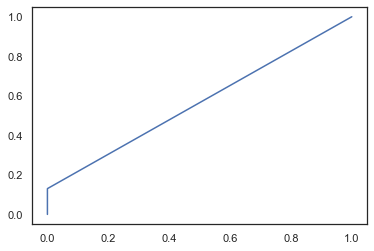

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression(max_iter=1000)

#Plug the model to the training set
mf_model_lr_deploy_train = logmodel.fit(x_train_mf_deploy,y_train_mf_deploy.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
mf_predictions_lr_test_deploy = mf_model_lr_deploy_train.predict(x_test_mf_deploy)
from sklearn.model_selection import cross_val_score
mf_acc_lr_deploy = round(accuracy_score(y_test_mf_deploy,mf_predictions_lr_test_deploy),3)
print("TEST SET\nAccuracy Score :", mf_acc_lr_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_deploy, mf_predictions_lr_test_deploy),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lr_weighted_deploy = precision_score(y_test_mf_deploy, mf_predictions_lr_test_deploy, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lr_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lr_weighted_deploy = recall_score(y_test_mf_deploy, mf_predictions_lr_test_deploy, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lr_weighted_deploy,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lr = confusion_matrix(y_test_mf_deploy, mf_predictions_lr_test_deploy)
print(cmx_mf_lr,'\n')
TP_mf_lr = cmx_mf_lr[1,1]
TN_mf_lr = cmx_mf_lr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lr[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lr[1,1]+cmx_mf_lr[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_deploy['Sale_MF'], mf_predictions_lr_test_deploy)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_deploy['Sale_MF'],mf_predictions_lr_test_deploy),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

------ CROSS VALIDATION ------

TEST SET
Accuracy Score : 0.764
Mean Absolute Error: 0.236
Precision Rate - Weighted : 0.723
Recall Rate - Weighted : 0.764 

CONFUSION MATRIX (Test Set)
[[139   6]
 [ 39   7]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 7
TN (True Negative)                   Negative responding clients well predicted : 139
                                                                     TOTAL TRUE : 146 

ROC CURVE
Area under the curve - AUC : 0.555


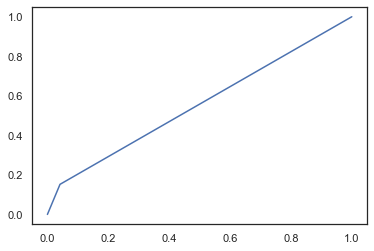

In [791]:
logmodel = LogisticRegression(max_iter=1000)

#Plug the model to the cross validation set
mf_model_lr_deploy_cv = logmodel.fit(x_cv_mf_deploy,y_cv_mf_deploy.values.ravel())
print('------ CROSS VALIDATION ------\n')

#Evaluate the model on the test set
mf_predictions_lr_test_deploy_cv = mf_model_lr_deploy_cv.predict(x_test_mf_deploy)

from sklearn.model_selection import cross_val_score
mf_acc_lr_deploy = round(accuracy_score(y_test_mf_deploy,mf_predictions_lr_test_deploy_cv),3)
print("TEST SET\nAccuracy Score :", mf_acc_lr_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_deploy, mf_predictions_lr_test_deploy_cv),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lr_weighted_deploy = precision_score(y_test_mf_deploy, mf_predictions_lr_test_deploy_cv, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lr_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lr_weighted_deploy = recall_score(y_test_mf_deploy, mf_predictions_lr_test_deploy_cv, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lr_weighted_deploy,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lr = confusion_matrix(y_test_mf_deploy, mf_predictions_lr_test_deploy_cv)
print(cmx_mf_lr,'\n')
TP_mf_lr = cmx_mf_lr[1,1]
TN_mf_lr = cmx_mf_lr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lr[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lr[1,1]+cmx_mf_lr[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_deploy['Sale_MF'], mf_predictions_lr_test_deploy_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_deploy['Sale_MF'],mf_predictions_lr_test_deploy_cv),3))
plt.show()

##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [792]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


In [793]:
#After few trials, 19 is the number optimizing the best our KPI
selector = SelectKBest(chi2, k=19)
x_train_mf_new_params = selector.fit_transform(x_train_mf_deploy,y_train_mf_deploy)
x_train_mf_new_params.shape

(608, 19)

In [794]:
x_test_mf_new_params = selector.fit_transform(x_test_mf_deploy,y_test_mf_deploy)
x_test_mf_new_params.shape

(191, 19)

In [795]:
x_cv_mf_new_params = selector.fit_transform(x_cv_mf_deploy,y_cv_mf_deploy)
x_cv_mf_new_params.shape

(152, 19)

In [796]:
#for visualising which columns have been selected
cols = selector.get_support(indices=True)
features_df_new = x_train_mf_deploy.iloc[:,cols]
features_df_new.columns

Index(['Client', 'Age', 'Tenure', 'Count_OVD', 'ActBal_CA', 'ActBal_SA',
       'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCashless_Card'],
      dtype='object')

###### TEST ON THE TRAINING DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.33
Mean Absolute Error: 0.67
Precision Rate - Weighted : 0.633
Recall Rate - Weighted : 0.33 

CONFUSION MATRIX (Test Set)
[[ 25 120]
 [  8  38]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 38
TN (True Negative)                   Negative responding clients well predicted : 25
                                                                     TOTAL TRUE : 63 

ROC CURVE
Area under the curve - AUC : 0.499


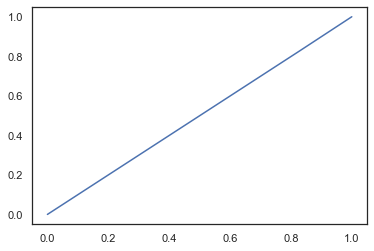

In [797]:
logmodel = LogisticRegression(max_iter=1000)

y_train_mf_new_params = y_train_mf_deploy
y_test_mf_new_params = y_test_mf_deploy

#Plug the model to the training set
mf_model_lr_optimized = logmodel.fit(x_train_mf_new_params,y_train_mf_new_params.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
mf_predictions_lr_optimized = mf_model_lr_optimized.predict(x_test_mf_new_params)
from sklearn.model_selection import cross_val_score

mf_acc_lr_optimized = round(accuracy_score(y_test_mf_new_params,mf_predictions_lr_optimized),3)
print("TEST SET\nAccuracy Score :", mf_acc_lr_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_new_params,mf_predictions_lr_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lr_weighted_optimized = precision_score(y_test_mf_new_params,mf_predictions_lr_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lr_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lr_weighted_optimized = recall_score(y_test_mf_new_params,mf_predictions_lr_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lr_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lr_op = confusion_matrix(y_test_mf_new_params,mf_predictions_lr_optimized)
print(cmx_mf_lr_op,'\n')
TP_mf_lr_op = cmx_mf_lr_op[1,1]
TN_mf_lr_op = cmx_mf_lr_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lr_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lr_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lr_op[1,1]+cmx_mf_lr_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_new_params['Sale_MF'], mf_predictions_lr_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_new_params['Sale_MF'],mf_predictions_lr_optimized),3))
plt.show()


###### TEST ON THE CROSS VALIDATION DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ CROSS VALIDATION SET ------

TEST SET
Accuracy Score : 0.382
Mean Absolute Error: 0.618
Precision Rate - Weighted : 0.631
Recall Rate - Weighted : 0.382 

CONFUSION MATRIX (Test Set)
[[ 40 105]
 [ 13  33]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 33
TN (True Negative)                   Negative responding clients well predicted : 40
                                                                     TOTAL TRUE : 73 

ROC CURVE
Area under the curve - AUC : 0.497


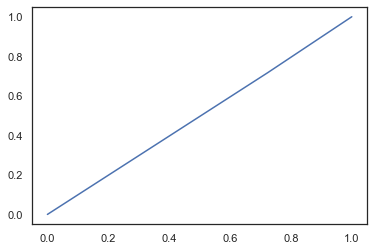

In [798]:
logmodel = LogisticRegression(max_iter=1000)

y_cv_mf_new_params = y_cv_mf_deploy
y_test_mf_new_params = y_test_mf_deploy

#Plug the model to thecross validation set
mf_model_lr_optimized = logmodel.fit(x_cv_mf_new_params,y_cv_mf_new_params.values.ravel())
print('------ CROSS VALIDATION SET ------\n')

#Evaluate the model on the test set
mf_predictions_lr_optimized = mf_model_lr_optimized.predict(x_test_mf_new_params)
from sklearn.model_selection import cross_val_score

mf_acc_lr_optimized = round(accuracy_score(y_test_mf_new_params,mf_predictions_lr_optimized),3)
print("TEST SET\nAccuracy Score :", mf_acc_lr_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_new_params,mf_predictions_lr_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lr_weighted_optimized = precision_score(y_test_mf_new_params,mf_predictions_lr_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lr_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lr_weighted_optimized = recall_score(y_test_mf_new_params,mf_predictions_lr_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lr_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lr_op = confusion_matrix(y_test_mf_new_params,mf_predictions_lr_optimized)
print(cmx_mf_lr_op,'\n')
TP_mf_lr_op = cmx_mf_lr_op[1,1]
TN_mf_lr_op = cmx_mf_lr_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lr_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lr_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lr_op[1,1]+cmx_mf_lr_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_new_params['Sale_MF'], mf_predictions_lr_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_new_params['Sale_MF'],mf_predictions_lr_optimized),3))
plt.show()


### LDA

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.764
Mean Absolute Error: 0.236
Precision Rate - Weighted : 0.742
Recall Rate - Weighted : 0.764 

ROC CURVE
Area under the curve - AUC : 0.518


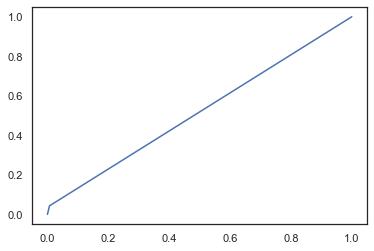

In [799]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_mf_deploy = sc.fit_transform(x_train_mf_deploy)
x_test_mf_deploy = sc.fit_transform(x_test_mf_deploy)

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_train_mf_deploy = lda.fit_transform(x_train_mf_deploy, y_train_mf_deploy)
x_test_mf_deploy = lda.transform(x_test_mf_deploy)

from sklearn.ensemble import RandomForestClassifier
mf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
mf_classifier = mf_classifier.fit(x_train_mf_deploy, y_train_mf_deploy)
mf_model_lda_deploy_train = mf_classifier.fit(x_train_mf_deploy,y_train_mf_deploy.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
mf_predictions_lda_test_deploy = mf_model_lda_deploy_train.predict(x_test_mf_deploy)
from sklearn.model_selection import cross_val_score
mf_acc_lda_deploy = round(accuracy_score(y_test_mf_deploy,mf_predictions_lda_test_deploy),3)
print("TEST SET\nAccuracy Score :", mf_acc_lda_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_deploy, mf_predictions_lda_test_deploy),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lda_weighted_deploy = precision_score(y_test_mf_deploy, mf_predictions_lda_test_deploy, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lda_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lda_weighted_deploy = recall_score(y_test_mf_deploy, mf_predictions_lda_test_deploy, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lda_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_deploy['Sale_MF'], mf_predictions_lda_test_deploy)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_deploy['Sale_MF'],mf_predictions_lda_test_deploy),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

------ CROSS VALIDATION ------

TEST SET
Accuracy Score : 0.775
Mean Absolute Error: 0.225
Precision Rate - Weighted : 0.748
Recall Rate - Weighted : 0.775 

ROC CURVE
Area under the curve - AUC : 0.562


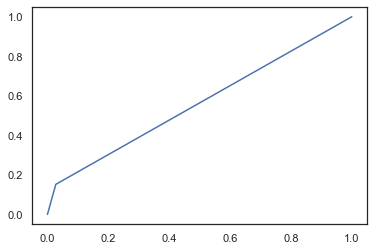

In [800]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_cv_mf_deploy = sc.fit_transform(x_cv_mf_deploy)
x_test_mf_deploy = sc.fit_transform(x_test_mf_deploy)

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_cv_mf_deploy = lda.fit_transform(x_cv_mf_deploy, y_cv_mf_deploy)
x_test_mf_deploy = lda.transform(x_test_mf_deploy)

from sklearn.ensemble import RandomForestClassifier
mf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
mf_classifier = mf_classifier.fit(x_cv_mf_deploy, y_cv_mf_deploy)
mf_model_lda_deploy_train_cv = mf_classifier.fit(x_cv_mf_deploy,y_cv_mf_deploy.values.ravel())
print('------ CROSS VALIDATION ------\n')

#Evaluate the model on the test set
mf_predictions_lda_test_deploy_cv = mf_model_lda_deploy_train_cv.predict(x_test_mf_deploy)
from sklearn.model_selection import cross_val_score
mf_acc_lda_deploy = round(accuracy_score(y_test_mf_deploy,mf_predictions_lda_test_deploy_cv),3)
print("TEST SET\nAccuracy Score :", mf_acc_lda_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_deploy, mf_predictions_lda_test_deploy_cv),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lda_weighted_deploy = precision_score(y_test_mf_deploy, mf_predictions_lda_test_deploy_cv, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lda_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lda_weighted_deploy = recall_score(y_test_mf_deploy, mf_predictions_lda_test_deploy_cv, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lda_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_deploy['Sale_MF'], mf_predictions_lda_test_deploy_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_deploy['Sale_MF'],mf_predictions_lda_test_deploy_cv),3))
plt.show()


##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [801]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [802]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
x = df2[features]
y_mf = df2[['Sale_MF']]
x_train_mf_deploy, x_test_mf_deploy, y_train_mf_deploy,y_test_mf_deploy = train_test_split(x,y_mf,test_size=0.2,random_state=42)
x_train_mf_deploy, x_cv_mf_deploy, y_train_mf_deploy, y_cv_mf_deploy = train_test_split(x_train_mf_deploy,y_train_mf_deploy,test_size=0.2,random_state=42)


#After few trials, 21 is the number optimizing the best our KPI
selector = SelectKBest(chi2, k=21)
x_train_mf_new_params_lda = selector.fit_transform(x_train_mf_deploy,y_train_mf_deploy)
x_train_mf_new_params_lda.shape

(608, 21)

In [803]:
x_test_mf_new_params_lda = selector.fit_transform(x_test_mf_deploy,y_test_mf_deploy)
x_test_mf_new_params_lda.shape

(191, 21)

In [804]:
x_cv_mf_new_params_lda = selector.fit_transform(x_cv_mf_deploy,y_cv_mf_deploy)
x_cv_mf_new_params_lda.shape

(152, 21)

In [805]:
#for visualising which columns have been selected
cols = selector.get_support(indices=True)
features_df_new = x_train_mf_deploy.iloc[:,cols]
features_df_new.columns

Index(['Client', 'Age', 'Tenure', 'Count_CA', 'Count_OVD', 'ActBal_CA',
       'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA',
       'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card'],
      dtype='object')

###### TEST ON THE TRAINING DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.262
Mean Absolute Error: 0.738
Precision Rate - Weighted : 0.818
Recall Rate - Weighted : 0.262 

CONFUSION MATRIX (Test Set)
[[  4 141]
 [  0  46]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 46
TN (True Negative)                   Negative responding clients well predicted : 4
                                                                     TOTAL TRUE : 50 

ROC CURVE
Area under the curve - AUC : 0.514


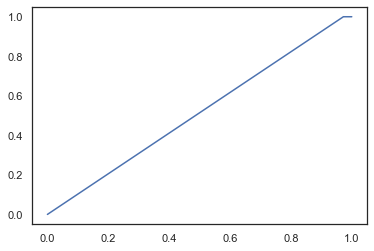

In [806]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_mf_deploy = sc.fit_transform(x_train_mf_deploy)
x_test_mf_deploy = sc.fit_transform(x_test_mf_deploy)

y_train_mf_new_params_lda = y_train_mf_deploy
y_test_mf_new_params_lda = y_test_mf_deploy

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_train_mf_new_params_lda = lda.fit_transform(x_train_mf_new_params_lda, y_train_mf_new_params_lda)
x_test_mf_new_params_lda = lda.transform(x_test_mf_new_params_lda)

from sklearn.ensemble import RandomForestClassifier
mf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
mf_classifier = mf_classifier.fit(x_train_mf_new_params_lda, y_train_mf_new_params_lda)
mf_model_lda_optimized = mf_classifier.fit(x_train_mf_new_params_lda,y_train_mf_new_params_lda.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
mf_predictions_lda_optimized = mf_model_lda_optimized.predict(x_test_mf_new_params_lda)
from sklearn.model_selection import cross_val_score
mf_acc_lda_optimized = round(accuracy_score(y_test_mf_new_params_lda,mf_predictions_lda_optimized),3)
print("TEST SET\nAccuracy Score :", mf_acc_lda_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_new_params_lda,mf_predictions_lda_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lda_weighted_optimized = precision_score(y_test_mf_new_params_lda,mf_predictions_lda_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lda_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lda_weighted_optimized = recall_score(y_test_mf_new_params_lda,mf_predictions_lda_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lda_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lda_op = confusion_matrix(y_test_mf_new_params_lda,mf_predictions_lda_optimized)
print(cmx_mf_lda_op,'\n')
TP_mf_lda_op = cmx_mf_lda_op[1,1]
TN_mf_lda_op = cmx_mf_lda_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lda_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lda_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lda_op[1,1]+cmx_mf_lda_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_new_params_lda['Sale_MF'], mf_predictions_lda_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_new_params_lda['Sale_MF'],mf_predictions_lda_optimized),3))
plt.show()


###### TEST ON THE CROSS VALIDATION DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ CROSS VALIDATION SET ------

TEST SET
Accuracy Score : 0.277
Mean Absolute Error: 0.723
Precision Rate - Weighted : 0.734
Recall Rate - Weighted : 0.277 

CONFUSION MATRIX (Test Set)
[[  8 137]
 [  1  45]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 45
TN (True Negative)                   Negative responding clients well predicted : 8
                                                                     TOTAL TRUE : 53 

ROC CURVE
Area under the curve - AUC : 0.517


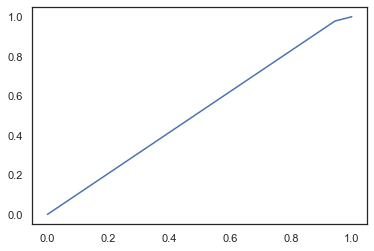

In [807]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_cv_mf_deploy = sc.fit_transform(x_cv_mf_deploy)
x_test_mf_deploy = sc.fit_transform(x_test_mf_deploy)

y_cv_mf_new_params_lda = y_cv_mf_deploy
y_test_mf_new_params_lda = y_test_mf_deploy

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_cv_mf_new_params_lda = lda.fit_transform(x_cv_mf_new_params_lda, y_cv_mf_new_params_lda)
x_test_mf_new_params_lda = lda.transform(x_test_mf_new_params_lda)

from sklearn.ensemble import RandomForestClassifier
mf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
mf_classifier = mf_classifier.fit(x_cv_mf_new_params_lda, y_cv_mf_new_params_lda)
mf_model_lda_optimized = mf_classifier.fit(x_cv_mf_new_params_lda,y_cv_mf_new_params_lda.values.ravel())
print('------ CROSS VALIDATION SET ------\n')

#Evaluate the model on the test set
mf_predictions_lda_optimized = mf_model_lda_optimized.predict(x_test_mf_new_params_lda)
from sklearn.model_selection import cross_val_score

mf_acc_lda_optimized = round(accuracy_score(y_test_mf_new_params_lda,mf_predictions_lda_optimized),3)
print("TEST SET\nAccuracy Score :", mf_acc_lda_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_mf_new_params_lda,mf_predictions_lda_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_mf_lda_weighted_optimized = precision_score(y_test_mf_new_params_lda,mf_predictions_lda_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_mf_lda_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_mf_lda_weighted_optimized = recall_score(y_test_mf_new_params_lda,mf_predictions_lda_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_mf_lda_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lda_op = confusion_matrix(y_test_mf_new_params_lda,mf_predictions_lda_optimized)
print(cmx_mf_lda_op,'\n')
TP_mf_lda_op = cmx_mf_lda_op[1,1]
TN_mf_lda_op = cmx_mf_lda_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lda_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lda_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lda_op[1,1]+cmx_mf_lda_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_mf_new_params_lda['Sale_MF'], mf_predictions_lda_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_mf_new_params_lda['Sale_MF'],mf_predictions_lda_optimized),3))
plt.show()


##### ELECTING THE FINAL MODEL 

In [808]:
print('MODEL 1 LOGISTIC REGRESSION -----------------')
print('Precision Rate - Weighted :',round(precision_mf_lr_weighted_optimized,3))
print('Recall Rate - Weighted :',round(recall_mf_lr_weighted_optimized,3))
print('AUC :', round(roc_auc_score(y_test_mf_new_params['Sale_MF'],mf_predictions_lr_optimized),3),'\n')
print('TOTAL TRUE :',cmx_mf_lr_op[1,1]+cmx_mf_lr_op[0,0])
print(cmx_mf_lr_op,'\n')

print('MODEL 2 LDA ---------------------------------')
print('Precision Rate - Weighted :',round(precision_mf_lda_weighted_optimized,3))
print('Recall Rate - Weighted :',round(recall_mf_lda_weighted_optimized,3))
print('AUC :', round(roc_auc_score(y_test_mf_new_params_lda['Sale_MF'],mf_predictions_lda_optimized),3),'\n')
print('TOTAL TRUE :',cmx_mf_lda_op[1,1]+cmx_mf_lda_op[0,0])
print(cmx_mf_lda_op)



MODEL 1 LOGISTIC REGRESSION -----------------
Precision Rate - Weighted : 0.631
Recall Rate - Weighted : 0.382
AUC : 0.497 

TOTAL TRUE : 73
[[ 40 105]
 [ 13  33]] 

MODEL 2 LDA ---------------------------------
Precision Rate - Weighted : 0.734
Recall Rate - Weighted : 0.277
AUC : 0.517 

TOTAL TRUE : 53
[[  8 137]
 [  1  45]]


######## BASED ON THE RESULTS : the chosen model for projecting SALE_CC is LDA

## MODEL SALE_CL : PARAMETERS AND DEPLOYMENT

##### SELECTION OF TARGET METRIC + EXCLUSION OF METRICS

In [809]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_cl = df2[['Sale_CL']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


##### SPLIT OF THE DATASET INTO TRAIN / CROSS VALIDATION / TEST

In [810]:
#import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cl_deploy, x_test_cl_deploy, y_train_cl_deploy,y_test_cl_deploy = train_test_split(x,y_cl,test_size=0.2,random_state=42)
x_train_cl_deploy, x_cv_cl_deploy, y_train_cl_deploy, y_cv_cl_deploy = train_test_split(x_train_cl_deploy,y_train_cl_deploy,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_cl_deploy.shape)
print('Training Labels Shape:', y_train_cl_deploy.shape)
print('Cross Validation Testing Features Shape:', x_cv_cl_deploy.shape)
print('Cross Validation Testing Labels Shape:', y_cv_cl_deploy.shape)
print('Testing Features Shape:', x_test_cl_deploy.shape)
print('Testing Labels Shape:', y_test_cl_deploy.shape,'\n')

print('Right Split with an overall matching number of observations :',x_train_cl_deploy.shape[0] + x_cv_cl_deploy.shape[0] + x_test_cl_deploy.shape[0] == x.shape[0])
print('Right Split with an overall matching number of variables :', (x_train_cl_deploy.shape[1] == x_cv_cl_deploy.shape[1] == x_test_cl_deploy.shape[1]) == y_cl.shape[1])

Training Features Shape: (608, 24)
Training Labels Shape: (608, 1)
Cross Validation Testing Features Shape: (152, 24)
Cross Validation Testing Labels Shape: (152, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1) 

Right Split with an overall matching number of observations : True
Right Split with an overall matching number of variables : True


### LOGISTIC REGRESSION

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.775
Mean Absolute Error: 0.225
Precision Rate - Weighted : 0.761
Recall Rate - Weighted : 0.775 

ROC CURVE
Area under the curve - AUC : 0.641


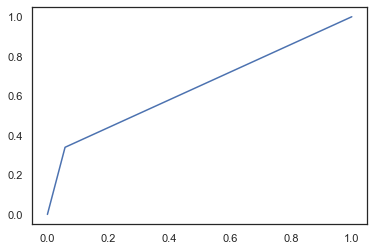

In [811]:
logmodel = LogisticRegression(max_iter=1000)

#Plug the model to the training set
cl_model_lr_deploy_train = logmodel.fit(x_train_cl_deploy,y_train_cl_deploy.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cl_predictions_lr_test_deploy = cl_model_lr_deploy_train.predict(x_test_cl_deploy)
from sklearn.model_selection import cross_val_score
cl_acc_lr_deploy = round(accuracy_score(y_test_cl_deploy,cl_predictions_lr_test_deploy),3)
print("TEST SET\nAccuracy Score :", cl_acc_lr_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_deploy, cl_predictions_lr_test_deploy),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lr_weighted_deploy = precision_score(y_test_cl_deploy, cl_predictions_lr_test_deploy, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lr_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lr_weighted_deploy = recall_score(y_test_cl_deploy, cl_predictions_lr_test_deploy, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lr_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_deploy['Sale_CL'], cl_predictions_lr_test_deploy)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_deploy['Sale_CL'],cl_predictions_lr_test_deploy),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

------ CROSS VALIDATION ------

TEST SET
Accuracy Score : 0.691
Mean Absolute Error: 0.309
Precision Rate - Weighted : 0.668
Recall Rate - Weighted : 0.691 

ROC CURVE
Area under the curve - AUC : 0.577


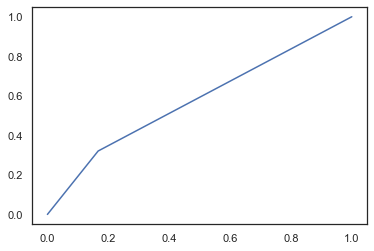

In [812]:
logmodel = LogisticRegression(max_iter=1000)

#Plug the model to the cross validation set
cl_model_lr_deploy_cv = logmodel.fit(x_cv_cl_deploy,y_cv_cl_deploy.values.ravel())
print('------ CROSS VALIDATION ------\n')

#Evaluate the model on the test set
cl_predictions_lr_test_deploy_cv = cl_model_lr_deploy_cv.predict(x_test_cl_deploy)

from sklearn.model_selection import cross_val_score
cl_acc_lr_deploy = round(accuracy_score(y_test_cl_deploy,cl_predictions_lr_test_deploy_cv),3)
print("TEST SET\nAccuracy Score :", cl_acc_lr_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_deploy, cl_predictions_lr_test_deploy_cv),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lr_weighted_deploy = precision_score(y_test_cl_deploy, cl_predictions_lr_test_deploy_cv, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lr_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lr_weighted_deploy = recall_score(y_test_cl_deploy, cl_predictions_lr_test_deploy_cv, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lr_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_deploy['Sale_CL'], cl_predictions_lr_test_deploy_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_deploy['Sale_CL'],cl_predictions_lr_test_deploy_cv),3))
plt.show()

###### TEST ON THE TRAINING DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

In [813]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [814]:
#After few trials, 14 is the number optimizing the best our KPI
selector = SelectKBest(chi2, k=14)
x_train_cl_new_params = selector.fit_transform(x_train_cl_deploy,y_train_cl_deploy)
x_train_cl_new_params.shape

(608, 14)

In [815]:
x_test_cl_new_params = selector.fit_transform(x_test_cl_deploy,y_test_cl_deploy)
x_test_cl_new_params.shape

(191, 14)

In [816]:
x_cv_cl_new_params = selector.fit_transform(x_cv_cl_deploy,y_cv_cl_deploy)
x_cv_cl_new_params.shape

(152, 14)

In [817]:
#for visualising which columns have been selected
cols = selector.get_support(indices=True)
features_df_new = x_train_cl_deploy.iloc[:,cols]
features_df_new.columns

Index(['Client', 'Tenure', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD',
       'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'TransactionsDebCashless_Card'],
      dtype='object')

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.628
Mean Absolute Error: 0.372
Precision Rate - Weighted : 0.567
Recall Rate - Weighted : 0.628 

CONFUSION MATRIX (Test Set)
[[114  24]
 [ 47   6]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 6
TN (True Negative)                   Negative responding clients well predicted : 114
                                                                     TOTAL TRUE : 120 

ROC CURVE
Area under the curve - AUC : 0.47


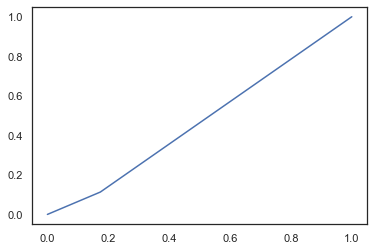

In [1142]:
logmodel = LogisticRegression(max_iter=1000)

y_train_cl_new_params = y_train_cl_deploy
y_test_cl_new_params = y_test_cl_deploy

#Plug the model to the training set
cl_model_lr_optimized = logmodel.fit(x_train_cl_new_params,y_train_cl_new_params.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cl_predictions_lr_optimized = cl_model_lr_optimized.predict(x_test_cl_new_params)
from sklearn.model_selection import cross_val_score

cl_acc_lr_optimized = round(accuracy_score(y_test_cl_new_params,cl_predictions_lr_optimized),3)
print("TEST SET\nAccuracy Score :", cl_acc_lr_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_new_params,cl_predictions_lr_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lr_weighted_optimized = precision_score(y_test_cl_new_params,cl_predictions_lr_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lr_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lr_weighted_optimized = recall_score(y_test_cl_new_params,cl_predictions_lr_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lr_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lr_op = confusion_matrix(y_test_cl_new_params,cl_predictions_lr_optimized)
print(cmx_cl_lr_op,'\n')
TP_cl_lr_op = cmx_cl_lr_op[1,1]
TN_cl_lr_op = cmx_cl_lr_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lr_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lr_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_lr_op[1,1]+cmx_cl_lr_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_new_params['Sale_CL'], cl_predictions_lr_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_new_params['Sale_CL'],cl_predictions_lr_optimized),3))
plt.show()

###### TEST ON THE CROSS VALIDATION DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ CROSS VALIDATION SET ------

TEST SET
Accuracy Score : 0.654
Mean Absolute Error: 0.346
Precision Rate - Weighted : 0.65
Recall Rate - Weighted : 0.654 

CONFUSION MATRIX (Test Set)
[[106  32]
 [ 34  19]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 19
TN (True Negative)                   Negative responding clients well predicted : 106
                                                                     TOTAL TRUE : 125 

ROC CURVE
Area under the curve - AUC : 0.563


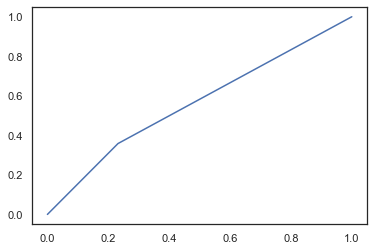

In [819]:
logmodel = LogisticRegression(max_iter=1000)

y_cv_cl_new_params = y_cv_cl_deploy
y_test_cl_new_params = y_test_cl_deploy

#Plug the model to thecross validation set
cl_model_lr_optimized = logmodel.fit(x_cv_cl_new_params,y_cv_cl_new_params.values.ravel())
print('------ CROSS VALIDATION SET ------\n')

#Evaluate the model on the test set
cl_predictions_lr_optimized = cl_model_lr_optimized.predict(x_test_cl_new_params)
from sklearn.model_selection import cross_val_score

cl_acc_lr_optimized = round(accuracy_score(y_test_cl_new_params,cl_predictions_lr_optimized),3)
print("TEST SET\nAccuracy Score :", cl_acc_lr_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_new_params,cl_predictions_lr_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lr_weighted_optimized = precision_score(y_test_cl_new_params,cl_predictions_lr_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lr_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lr_weighted_optimized = recall_score(y_test_cl_new_params,cl_predictions_lr_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lr_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lr_op = confusion_matrix(y_test_cl_new_params,cl_predictions_lr_optimized)
print(cmx_cl_lr_op,'\n')
TP_cl_lr_op = cmx_cl_lr_op[1,1]
TN_cl_lr_op = cmx_cl_lr_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lr_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lr_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_lr_op[1,1]+cmx_cl_lr_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_new_params['Sale_CL'], cl_predictions_lr_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_new_params['Sale_CL'],cl_predictions_lr_optimized),3))
plt.show()


### LDA

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.78
Mean Absolute Error: 0.22
Precision Rate - Weighted : 0.768
Recall Rate - Weighted : 0.78 

ROC CURVE
Area under the curve - AUC : 0.65


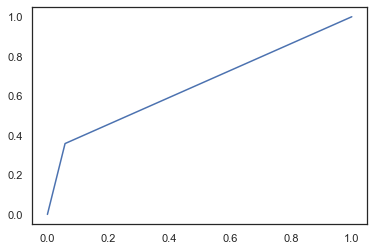

In [820]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_cl_deploy = sc.fit_transform(x_train_cl_deploy)
x_test_cl_deploy = sc.fit_transform(x_test_cl_deploy)

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_train_cl_deploy = lda.fit_transform(x_train_cl_deploy, y_train_cl_deploy)
x_test_cl_deploy = lda.transform(x_test_cl_deploy)

from sklearn.ensemble import RandomForestClassifier
cl_classifier = RandomForestClassifier(max_depth=2, random_state=0)
cl_classifier = cl_classifier.fit(x_train_cl_deploy, y_train_cl_deploy)
cl_model_lda_deploy_train = cl_classifier.fit(x_train_cl_deploy,y_train_cl_deploy.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cl_predictions_lda_test_deploy = cl_model_lda_deploy_train.predict(x_test_cl_deploy)
from sklearn.model_selection import cross_val_score
cl_acc_lda_deploy = round(accuracy_score(y_test_cl_deploy,cl_predictions_lda_test_deploy),3)
print("TEST SET\nAccuracy Score :", cl_acc_lda_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_deploy, cl_predictions_lda_test_deploy),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lda_weighted_deploy = precision_score(y_test_cl_deploy, cl_predictions_lda_test_deploy, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lda_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lda_weighted_deploy = recall_score(y_test_cl_deploy, cl_predictions_lda_test_deploy, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lda_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_deploy['Sale_CL'], cl_predictions_lda_test_deploy)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_deploy['Sale_CL'],cl_predictions_lda_test_deploy),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

------ CROSS VALIDATION ------

TEST SET
Accuracy Score : 0.78
Mean Absolute Error: 0.22
Precision Rate - Weighted : 0.767
Recall Rate - Weighted : 0.78 

ROC CURVE
Area under the curve - AUC : 0.656


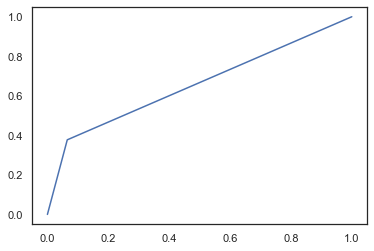

In [821]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_cv_cl_deploy = sc.fit_transform(x_cv_cl_deploy)
x_test_cl_deploy = sc.fit_transform(x_test_cl_deploy)

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_cv_cl_deploy = lda.fit_transform(x_cv_cl_deploy, y_cv_cl_deploy)
x_test_cl_deploy = lda.transform(x_test_cl_deploy)

from sklearn.ensemble import RandomForestClassifier
cl_classifier = RandomForestClassifier(max_depth=2, random_state=0)
cl_classifier = cl_classifier.fit(x_cv_cl_deploy, y_cv_cl_deploy)
cl_model_lda_deploy_train_cv = cl_classifier.fit(x_cv_cl_deploy,y_cv_cl_deploy.values.ravel())
print('------ CROSS VALIDATION ------\n')

#Evaluate the model on the test set
cl_predictions_lda_test_deploy_cv = cl_model_lda_deploy_train_cv.predict(x_test_cl_deploy)
from sklearn.model_selection import cross_val_score
cl_acc_lda_deploy = round(accuracy_score(y_test_cl_deploy,cl_predictions_lda_test_deploy_cv),3)
print("TEST SET\nAccuracy Score :", cl_acc_lda_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_deploy, cl_predictions_lda_test_deploy_cv),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lda_weighted_deploy = precision_score(y_test_cl_deploy, cl_predictions_lda_test_deploy_cv, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lda_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lda_weighted_deploy = recall_score(y_test_cl_deploy, cl_predictions_lda_test_deploy_cv, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lda_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_deploy['Sale_CL'], cl_predictions_lda_test_deploy_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_deploy['Sale_CL'],cl_predictions_lda_test_deploy_cv),3))
plt.show()


##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [822]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [823]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
x = df2[features]
y_mf = df2[['Sale_CL']]
x_train_cl_deploy, x_test_cl_deploy, y_train_cl_deploy,y_test_cl_deploy = train_test_split(x,y_cl,test_size=0.2,random_state=42)
x_train_cl_deploy, x_cv_cl_deploy, y_train_cl_deploy, y_cv_cl_deploy = train_test_split(x_train_cl_deploy,y_train_cl_deploy,test_size=0.2,random_state=42)


#After few trials, 20 is the number optimizing the best our KPI
selector = SelectKBest(chi2, k=20)
x_train_cl_new_params_lda = selector.fit_transform(x_train_cl_deploy,y_train_cl_deploy)
x_train_cl_new_params_lda.shape

(608, 20)

In [824]:
x_test_cl_new_params_lda = selector.fit_transform(x_test_cl_deploy,y_test_cl_deploy)
x_test_cl_new_params_lda.shape

(191, 20)

In [825]:
x_cv_cl_new_params_lda = selector.fit_transform(x_cv_cl_deploy,y_cv_cl_deploy)
x_cv_cl_new_params_lda.shape

(152, 20)

In [826]:
#for visualising which columns have been selected
cols = selector.get_support(indices=True)
features_df_new = x_train_cl_deploy.iloc[:,cols]
features_df_new.columns

Index(['Client', 'Age', 'Tenure', 'Count_SA', 'Count_OVD', 'ActBal_CA',
       'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA',
       'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb_CA',
       'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder'],
      dtype='object')

###### TEST ON THE TRAINING DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.325
Mean Absolute Error: 0.675
Precision Rate - Weighted : 0.61
Recall Rate - Weighted : 0.325 

CONFUSION MATRIX (Test Set)
[[ 14 124]
 [  5  48]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 48
TN (True Negative)                   Negative responding clients well predicted : 14
                                                                     TOTAL TRUE : 62 

ROC CURVE
Area under the curve - AUC : 0.504


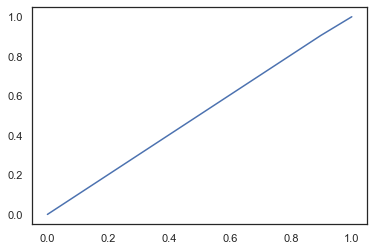

In [827]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_cl_deploy = sc.fit_transform(x_train_cl_deploy)
x_test_cl_deploy = sc.fit_transform(x_test_cl_deploy)

y_train_cl_new_params_lda = y_train_cl_deploy
y_test_cl_new_params_lda = y_test_cl_deploy

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_train_cl_new_params_lda = lda.fit_transform(x_train_cl_new_params_lda, y_train_cl_new_params_lda)
x_test_cl_new_params_lda = lda.transform(x_test_cl_new_params_lda)

from sklearn.ensemble import RandomForestClassifier
cl_classifier = RandomForestClassifier(max_depth=2, random_state=0)
cl_classifier = cl_classifier.fit(x_train_cl_new_params_lda, y_train_cl_new_params_lda)
cl_model_lda_optimized = mf_classifier.fit(x_train_cl_new_params_lda,y_train_cl_new_params_lda.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cl_predictions_lda_optimized = cl_model_lda_optimized.predict(x_test_cl_new_params_lda)
from sklearn.model_selection import cross_val_score
cl_acc_lda_optimized = round(accuracy_score(y_test_cl_new_params_lda,cl_predictions_lda_optimized),3)
print("TEST SET\nAccuracy Score :", cl_acc_lda_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_new_params_lda,cl_predictions_lda_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lda_weighted_optimized = precision_score(y_test_cl_new_params_lda,cl_predictions_lda_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lda_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lda_weighted_optimized = recall_score(y_test_cl_new_params_lda,cl_predictions_lda_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lda_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lda_op = confusion_matrix(y_test_cl_new_params_lda,cl_predictions_lda_optimized)
print(cmx_cl_lda_op,'\n')
TP_cl_lda_op = cmx_cl_lda_op[1,1]
TN_cl_lda_op = cmx_cl_lda_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lda_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lda_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_lda_op[1,1]+cmx_cl_lda_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_new_params_lda['Sale_CL'], cl_predictions_lda_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_new_params_lda['Sale_CL'],cl_predictions_lda_optimized),3))
plt.show()


###### TEST ON THE CROSS VALIDATION DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ CROSS VALIDATION SET ------

TEST SET
Accuracy Score : 0.346
Mean Absolute Error: 0.654
Precision Rate - Weighted : 0.645
Recall Rate - Weighted : 0.346 

CONFUSION MATRIX (Test Set)
[[ 18 120]
 [  5  48]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 48
TN (True Negative)                   Negative responding clients well predicted : 18
                                                                     TOTAL TRUE : 66 

ROC CURVE
Area under the curve - AUC : 0.518


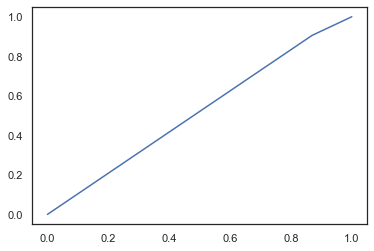

In [828]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_cv_cl_deploy = sc.fit_transform(x_cv_cl_deploy)
x_test_cl_deploy = sc.fit_transform(x_test_cl_deploy)

y_cv_cl_new_params_lda = y_cv_cl_deploy
y_test_cl_new_params_lda = y_test_cl_deploy

#definition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

# Fit the classifier to the data
x_cv_cl_new_params_lda = lda.fit_transform(x_cv_cl_new_params_lda, y_cv_cl_new_params_lda)
x_test_cl_new_params_lda = lda.transform(x_test_cl_new_params_lda)

from sklearn.ensemble import RandomForestClassifier
cl_classifier = RandomForestClassifier(max_depth=2, random_state=0)
cl_classifier = cl_classifier.fit(x_cv_cl_new_params_lda, y_cv_cl_new_params_lda)
cl_model_lda_optimized = cl_classifier.fit(x_cv_cl_new_params_lda,y_cv_cl_new_params_lda.values.ravel())
print('------ CROSS VALIDATION SET ------\n')

#Evaluate the model on the test set
cl_predictions_lda_optimized = cl_model_lda_optimized.predict(x_test_cl_new_params_lda)
from sklearn.model_selection import cross_val_score

cl_acc_lda_optimized = round(accuracy_score(y_test_cl_new_params_lda,cl_predictions_lda_optimized),3)
print("TEST SET\nAccuracy Score :", cl_acc_lda_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cl_new_params_lda,cl_predictions_lda_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cl_lda_weighted_optimized = precision_score(y_test_cl_new_params_lda,cl_predictions_lda_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cl_lda_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cl_lda_weighted_optimized = recall_score(y_test_cl_new_params_lda,cl_predictions_lda_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cl_lda_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lda_op = confusion_matrix(y_test_cl_new_params_lda,cl_predictions_lda_optimized)
print(cmx_cl_lda_op,'\n')
TP_cl_lda_op = cmx_cl_lda_op[1,1]
TN_cl_lda_op = cmx_cl_lda_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lda_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lda_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_lda_op[1,1]+cmx_cl_lda_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cl_new_params_lda['Sale_CL'], cl_predictions_lda_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cl_new_params_lda['Sale_CL'],cl_predictions_lda_optimized),3))
plt.show()


##### ELECTING THE FINAL MODEL 

In [829]:
print('MODEL 1 LOGISTIC REGRESSION -----------------')
print('Precision Rate - Weighted :',round(precision_cl_lr_weighted_optimized,3))
print('Recall Rate - Weighted :',round(recall_cl_lr_weighted_optimized,3))
print('AUC :', round(roc_auc_score(y_test_cl_new_params['Sale_CL'],cl_predictions_lr_optimized),3),'\n')
print('TOTAL TRUE :',cmx_cl_lr_op[1,1]+cmx_cl_lr_op[0,0])
print(cmx_cl_lr_op,'\n')

print('MODEL 2 LDA ---------------------------------')
print('Precision Rate - Weighted :',round(precision_cl_lda_weighted_optimized,3))
print('Recall Rate - Weighted :',round(recall_cl_lda_weighted_optimized,3))
print('AUC :', round(roc_auc_score(y_test_cl_new_params_lda['Sale_CL'],cl_predictions_lda_optimized),3),'\n')
print('TOTAL TRUE :',cmx_cl_lda_op[1,1]+cmx_cl_lda_op[0,0])
print(cmx_cl_lda_op)

MODEL 1 LOGISTIC REGRESSION -----------------
Precision Rate - Weighted : 0.65
Recall Rate - Weighted : 0.654
AUC : 0.563 

TOTAL TRUE : 125
[[106  32]
 [ 34  19]] 

MODEL 2 LDA ---------------------------------
Precision Rate - Weighted : 0.645
Recall Rate - Weighted : 0.346
AUC : 0.518 

TOTAL TRUE : 66
[[ 18 120]
 [  5  48]]


######## BASED ON THE RESULTS : the chosen model for projecting SALE_CL is LDA

## MODEL SALE_CC : PARAMETERS AND DEPLOYMENT

##### SELECTION OF TARGET METRIC + EXCLUSION OF METRICS

In [830]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_cc = df2[['Sale_CC']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


##### SPLIT OF THE DATASET INTO TRAIN / CROSS VALIDATION / TEST

In [831]:
#import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cc_deploy, x_test_cc_deploy, y_train_cc_deploy,y_test_cc_deploy = train_test_split(x,y_cc,test_size=0.2,random_state=42)
x_train_cc_deploy, x_cv_cc_deploy, y_train_cc_deploy, y_cv_cc_deploy = train_test_split(x_train_cc_deploy,y_train_cc_deploy,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_cc_deploy.shape)
print('Training Labels Shape:', y_train_cc_deploy.shape)
print('Cross Validation Testing Features Shape:', x_cv_cc_deploy.shape)
print('Cross Validation Testing Labels Shape:', y_cv_cc_deploy.shape)
print('Testing Features Shape:', x_test_cc_deploy.shape)
print('Testing Labels Shape:', y_test_cc_deploy.shape,'\n')

print('Right Split with an overall matching number of observations :',x_train_cc_deploy.shape[0] + x_cv_cc_deploy.shape[0] + x_test_cc_deploy.shape[0] == x.shape[0])
print('Right Split with an overall matching number of variables :', (x_train_cc_deploy.shape[1] == x_cv_cc_deploy.shape[1] == x_test_cc_deploy.shape[1]) == y_cc.shape[1])

Training Features Shape: (608, 24)
Training Labels Shape: (608, 1)
Cross Validation Testing Features Shape: (152, 24)
Cross Validation Testing Labels Shape: (152, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1) 

Right Split with an overall matching number of observations : True
Right Split with an overall matching number of variables : True


### LOGISTIC REGRESSION

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.754
Mean Absolute Error: 0.246
Precision Rate - Weighted : 0.769
Recall Rate - Weighted : 0.754 

ROC CURVE
Area under the curve - AUC : 0.576


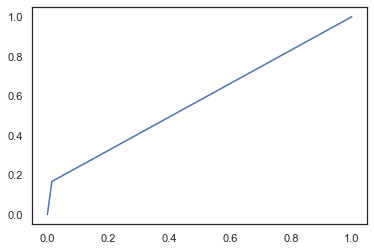

In [832]:
logmodel = LogisticRegression(max_iter=1000)

#Plug the model to the training set
cc_model_lr_deploy_train = logmodel.fit(x_train_cc_deploy,y_train_cc_deploy.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cc_predictions_lr_test_deploy = cc_model_lr_deploy_train.predict(x_test_cc_deploy)
from sklearn.model_selection import cross_val_score
cc_acc_lr_deploy = round(accuracy_score(y_test_cc_deploy,cc_predictions_lr_test_deploy),3)
print("TEST SET\nAccuracy Score :", cc_acc_lr_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_deploy, cc_predictions_lr_test_deploy),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_lr_weighted_deploy = precision_score(y_test_cc_deploy, cc_predictions_lr_test_deploy, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_lr_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cc_lr_weighted_deploy = recall_score(y_test_cc_deploy, cc_predictions_lr_test_deploy, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_lr_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_deploy['Sale_CC'], cc_predictions_lr_test_deploy)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_deploy['Sale_CC'],cc_predictions_lr_test_deploy),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

------ CROSS VALIDATION ------

TEST SET
Accuracy Score : 0.691
Mean Absolute Error: 0.309
Precision Rate - Weighted : 0.663
Recall Rate - Weighted : 0.691 

ROC CURVE
Area under the curve - AUC : 0.572


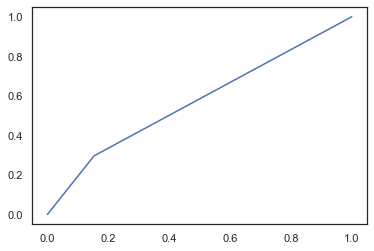

In [833]:
logmodel = LogisticRegression(max_iter=1000)

#Plug the model to the cross validation set
cc_model_lr_deploy_cv = logmodel.fit(x_cv_cc_deploy,y_cv_cc_deploy.values.ravel())
print('------ CROSS VALIDATION ------\n')

#Evaluate the model on the test set
cc_predictions_lr_test_deploy_cv = cc_model_lr_deploy_cv.predict(x_test_cc_deploy)

from sklearn.model_selection import cross_val_score
cc_acc_lr_deploy = round(accuracy_score(y_test_cc_deploy,cc_predictions_lr_test_deploy_cv),3)
print("TEST SET\nAccuracy Score :", cc_acc_lr_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_deploy, cc_predictions_lr_test_deploy_cv),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_lr_weighted_deploy = precision_score(y_test_cc_deploy, cc_predictions_lr_test_deploy_cv, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_lr_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cc_lr_weighted_deploy = recall_score(y_test_cc_deploy, cc_predictions_lr_test_deploy_cv, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_lr_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_deploy['Sale_CC'], cc_predictions_lr_test_deploy_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_deploy['Sale_CC'],cc_predictions_lr_test_deploy_cv),3))
plt.show()

###### TEST ON THE TRAINING DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

In [834]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [835]:
#After few trials, 21 is the number optimizing the best our KPI
selector = SelectKBest(chi2, k=21)
x_train_cc_new_params = selector.fit_transform(x_train_cc_deploy,y_train_cc_deploy)
x_train_cc_new_params.shape

(608, 21)

In [836]:
x_test_cc_new_params = selector.fit_transform(x_test_cc_deploy,y_test_cc_deploy)
x_test_cc_new_params.shape

(191, 21)

In [837]:
x_cv_cc_new_params = selector.fit_transform(x_cv_cc_deploy,y_cv_cc_deploy)
x_cv_cc_new_params.shape

(152, 21)

In [838]:
#for visualising which columns have been selected
cols = selector.get_support(indices=True)
features_df_new = x_train_cc_deploy.iloc[:,cols]
features_df_new.columns

Index(['Client', 'Age', 'Tenure', 'Count_SA', 'Count_OVD', 'ActBal_CA',
       'ActBal_SA', 'ActBal_OVD', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder'],
      dtype='object')

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.398
Mean Absolute Error: 0.602
Precision Rate - Weighted : 0.577
Recall Rate - Weighted : 0.398 

CONFUSION MATRIX (Test Set)
[[39 98]
 [17 37]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 37
TN (True Negative)                   Negative responding clients well predicted : 39
                                                                     TOTAL TRUE : 76 

ROC CURVE
Area under the curve - AUC : 0.485


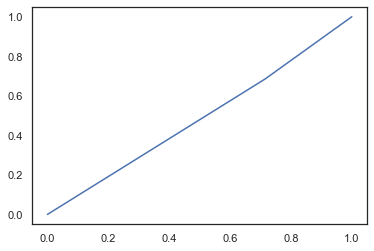

In [839]:
logmodel = LogisticRegression(max_iter=1000)

y_train_cc_new_params = y_train_cc_deploy
y_test_cc_new_params = y_test_cc_deploy

#Plug the model to the training set
cc_model_lr_optimized = logmodel.fit(x_train_cc_new_params,y_train_cc_new_params.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cc_predictions_lr_optimized = cc_model_lr_optimized.predict(x_test_cc_new_params)
from sklearn.model_selection import cross_val_score

cc_acc_lr_optimized = round(accuracy_score(y_test_cc_new_params,cc_predictions_lr_optimized),3)
print("TEST SET\nAccuracy Score :", cc_acc_lr_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_new_params,cc_predictions_lr_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_lr_weighted_optimized = precision_score(y_test_cc_new_params,cc_predictions_lr_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_lr_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cc_lr_weighted_optimized = recall_score(y_test_cc_new_params,cc_predictions_lr_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_lr_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_lr_op = confusion_matrix(y_test_cc_new_params,cc_predictions_lr_optimized)
print(cmx_cc_lr_op,'\n')
TP_cc_lr_op = cmx_cc_lr_op[1,1]
TN_cc_lr_op = cmx_cc_lr_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_lr_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_lr_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_lr_op[1,1]+cmx_cc_lr_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_new_params['Sale_CC'], cc_predictions_lr_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_new_params['Sale_CC'],cc_predictions_lr_optimized),3))
plt.show()

###### TEST ON THE CROSS VALIDATION DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ CROSS VALIDATION SET ------

TEST SET
Accuracy Score : 0.424
Mean Absolute Error: 0.576
Precision Rate - Weighted : 0.618
Recall Rate - Weighted : 0.424 

CONFUSION MATRIX (Test Set)
[[41 96]
 [14 40]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 40
TN (True Negative)                   Negative responding clients well predicted : 41
                                                                     TOTAL TRUE : 81 

ROC CURVE
Area under the curve - AUC : 0.52


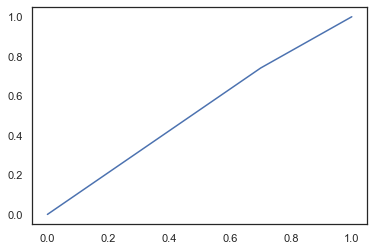

In [840]:
logmodel = LogisticRegression(max_iter=1000)

y_cv_cc_new_params = y_cv_cc_deploy
y_test_cc_new_params = y_test_cc_deploy

#Plug the model to thecross validation set
cc_model_lr_optimized = logmodel.fit(x_cv_cc_new_params,y_cv_cc_new_params.values.ravel())
print('------ CROSS VALIDATION SET ------\n')

#Evaluate the model on the test set
cc_predictions_lr_optimized = cc_model_lr_optimized.predict(x_test_cc_new_params)
from sklearn.model_selection import cross_val_score

cc_acc_lr_optimized = round(accuracy_score(y_test_cc_new_params,cc_predictions_lr_optimized),3)
print("TEST SET\nAccuracy Score :", cc_acc_lr_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_new_params,cc_predictions_lr_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_lr_weighted_optimized = precision_score(y_test_cc_new_params,cc_predictions_lr_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_lr_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cc_lr_weighted_optimized = recall_score(y_test_cc_new_params,cc_predictions_lr_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_lr_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_lr_op = confusion_matrix(y_test_cc_new_params,cc_predictions_lr_optimized)
print(cmx_cc_lr_op,'\n')
TP_cc_lr_op = cmx_cc_lr_op[1,1]
TN_cc_lr_op = cmx_cc_lr_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_lr_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_lr_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_lr_op[1,1]+cmx_cc_lr_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_new_params['Sale_CC'], cc_predictions_lr_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_new_params['Sale_CC'],cc_predictions_lr_optimized),3))
plt.show()

### SVM

###### TEST ON THE TRAINING DATASET

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.759
Mean Absolute Error: 0.241
Precision Rate - Weighted : 0.82
Recall Rate - Weighted : 0.759 

ROC CURVE
Area under the curve - AUC : 0.574


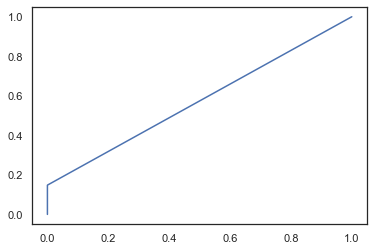

In [841]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
svmmodel = svm.SVC()

#Plug the model to the training set
cc_model_svm_deploy_train = svmmodel.fit(x_train_cc_deploy,y_train_cc_deploy.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cc_predictions_svm_test_deploy = cc_model_svm_deploy_train.predict(x_test_cc_deploy)


from sklearn.model_selection import cross_val_score
cc_acc_svm_deploy = round(accuracy_score(y_test_cc_deploy,cc_predictions_svm_test_deploy),3)
print("TEST SET\nAccuracy Score :", cc_acc_svm_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_deploy, cc_predictions_svm_test_deploy),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_svm_weighted_deploy = precision_score(y_test_cc_deploy, cc_predictions_svm_test_deploy, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_svm_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cc_svm_weighted_deploy = recall_score(y_test_cc_deploy, cc_predictions_svm_test_deploy, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_svm_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_deploy['Sale_CC'], cc_predictions_svm_test_deploy)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_deploy['Sale_CC'],cc_predictions_svm_test_deploy),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

------ CROSS VALIDATION ------

TEST SET
Accuracy Score : 0.759
Mean Absolute Error: 0.241
Precision Rate - Weighted : 0.757
Recall Rate - Weighted : 0.759 

ROC CURVE
Area under the curve - AUC : 0.597


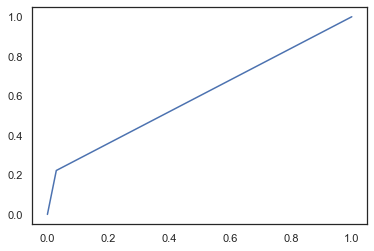

In [842]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
svmmodel = svm.SVC()

#Plug the model to the cross validation set
cc_model_svm_deploy_cv = svmmodel.fit(x_cv_cc_deploy,y_cv_cc_deploy.values.ravel())
print('------ CROSS VALIDATION ------\n')

#Evaluate the model on the test set
cc_predictions_svm_test_deploy_cv = cc_model_svm_deploy_cv.predict(x_test_cc_deploy)

from sklearn.model_selection import cross_val_score
cc_acc_svm_deploy = round(accuracy_score(y_test_cc_deploy,cc_predictions_svm_test_deploy_cv),3)
print("TEST SET\nAccuracy Score :", cc_acc_svm_deploy)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_deploy, cc_predictions_svm_test_deploy_cv),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_svm_weighted_deploy = precision_score(y_test_cc_deploy, cc_predictions_svm_test_deploy_cv, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_svm_weighted_deploy,3))

#recall
from sklearn.metrics import recall_score
recall_cc_svm_weighted_deploy = recall_score(y_test_cc_deploy, cc_predictions_svm_test_deploy_cv, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_svm_weighted_deploy,3),'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_deploy['Sale_CC'], cc_predictions_svm_test_deploy_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_deploy['Sale_CC'],cc_predictions_svm_test_deploy_cv),3))
plt.show()

###### TEST ON THE TRAINING DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

In [843]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [844]:
#After few trials, 12 is the number optimizing the best our KPI
selector = SelectKBest(chi2, k=12)
x_train_cc_new_params_svm = selector.fit_transform(x_train_cc_deploy,y_train_cc_deploy)
x_train_cc_new_params_svm.shape

(608, 12)

In [845]:
x_test_cc_new_params_svm = selector.fit_transform(x_test_cc_deploy,y_test_cc_deploy)
x_test_cc_new_params_svm.shape

(191, 12)

In [846]:
x_cv_cc_new_params_svm = selector.fit_transform(x_cv_cc_deploy,y_cv_cc_deploy)
x_cv_cc_new_params_svm.shape

(152, 12)

In [847]:
#for visualising which columns have been selected
cols = selector.get_support(indices=True)
features_df_new = x_train_cc_deploy.iloc[:,cols]
features_df_new.columns

Index(['Client', 'Tenure', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD',
       'VolumeCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card',
       'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder',
       'TransactionsDebCashless_Card'],
      dtype='object')

------ TRAINING SET ------

TEST SET
Accuracy Score : 0.759
Mean Absolute Error: 0.241
Precision Rate - Weighted : 0.82
Recall Rate - Weighted : 0.759 

CONFUSION MATRIX (Test Set)
[[137   0]
 [ 46   8]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 8
TN (True Negative)                   Negative responding clients well predicted : 137
                                                                     TOTAL TRUE : 145 

ROC CURVE
Area under the curve - AUC : 0.574


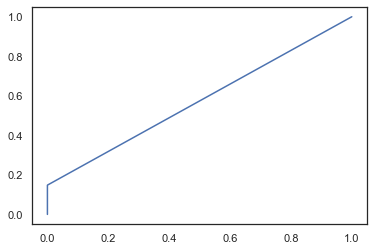

In [848]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
svmmodel = svm.SVC()

y_train_cc_new_params_svm = y_train_cc_deploy
y_test_cc_new_params_svm = y_test_cc_deploy

#Plug the model to the training set
cc_model_svm_optimized = svmmodel.fit(x_train_cc_new_params_svm,y_train_cc_new_params_svm.values.ravel())
print('------ TRAINING SET ------\n')

#Evaluate the model on the test set
cc_predictions_svm_optimized = cc_model_svm_optimized.predict(x_test_cc_new_params_svm)
from sklearn.model_selection import cross_val_score

cc_acc_svm_optimized = round(accuracy_score(y_test_cc_new_params_svm,cc_predictions_svm_optimized),3)
print("TEST SET\nAccuracy Score :", cc_acc_svm_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_new_params_svm,cc_predictions_svm_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_svm_weighted_optimized = precision_score(y_test_cc_new_params_svm,cc_predictions_svm_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_svm_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cc_svm_weighted_optimized = recall_score(y_test_cc_new_params_svm,cc_predictions_svm_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_svm_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_svm_op = confusion_matrix(y_test_cc_new_params_svm,cc_predictions_svm_optimized)
print(cmx_cc_svm_op,'\n')
TP_cc_svm_op = cmx_cc_svm_op[1,1]
TN_cc_svm_op = cmx_cc_svm_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_svm_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_svm_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_svm_op[1,1]+cmx_cc_svm_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_new_params_svm['Sale_CC'], cc_predictions_svm_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_new_params_svm['Sale_CC'],cc_predictions_svm_optimized),3))
plt.show()


###### TEST ON THE CROSS VALIDATION DATASET WITH SELECTED FEATURES (RUNNING OPTIMISED MODEL)

------ CROSS VALIDATION SET ------

TEST SET
Accuracy Score : 0.733
Mean Absolute Error: 0.267
Precision Rate - Weighted : 0.702
Recall Rate - Weighted : 0.733 

CONFUSION MATRIX (Test Set)
[[128   9]
 [ 42  12]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 12
TN (True Negative)                   Negative responding clients well predicted : 128
                                                                     TOTAL TRUE : 140 

ROC CURVE
Area under the curve - AUC : 0.578


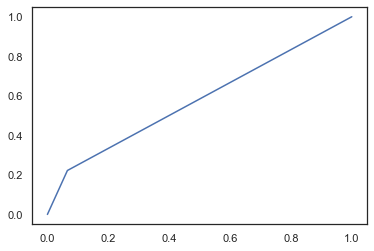

In [849]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
svmmodel = svm.SVC()

y_cv_cc_new_params_svm = y_cv_cc_deploy
y_test_cc_new_params_svm = y_test_cc_deploy

#Plug the model to thecross validation set
cc_model_svm_optimized = svmmodel.fit(x_cv_cc_new_params_svm,y_cv_cc_new_params_svm.values.ravel())
print('------ CROSS VALIDATION SET ------\n')

#Evaluate the model on the test set
cc_predictions_svm_optimized = cc_model_svm_optimized.predict(x_test_cc_new_params_svm)
from sklearn.model_selection import cross_val_score

cc_acc_svm_optimized = round(accuracy_score(y_test_cc_new_params_svm,cc_predictions_svm_optimized),3)
print("TEST SET\nAccuracy Score :", cc_acc_svm_optimized)

#Evaluating the results
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test_cc_new_params_svm,cc_predictions_svm_optimized),3))

# precision 
from sklearn.metrics import precision_score
precision_cc_svm_weighted_optimized = precision_score(y_test_cc_new_params_svm,cc_predictions_svm_optimized, average='weighted')
print('Precision Rate - Weighted :',round(precision_cc_svm_weighted_optimized,3))

#recall
from sklearn.metrics import recall_score
recall_cc_svm_weighted_optimized = recall_score(y_test_cc_new_params_svm,cc_predictions_svm_optimized, average='weighted')
print('Recall Rate - Weighted :',round(recall_cc_svm_weighted_optimized,3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_svm_op = confusion_matrix(y_test_cc_new_params_svm,cc_predictions_svm_optimized)
print(cmx_cc_svm_op,'\n')
TP_cc_svm_op = cmx_cc_svm_op[1,1]
TN_cc_svm_op = cmx_cc_svm_op[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_svm_op[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_svm_op[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_svm_op[1,1]+cmx_cc_svm_op[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_cc_new_params_svm['Sale_CC'], cc_predictions_svm_optimized)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_cc_new_params_svm['Sale_CC'],cc_predictions_svm_optimized),3))
plt.show()


##### ELECTING THE FINAL MODEL 

In [850]:
print('MODEL 1 LOGISTIC REGRESSION -----------------')
print('Precision Rate - Weighted :',round(precision_cc_lr_weighted_optimized,3))
print('Recall Rate - Weighted :',round(recall_cc_lr_weighted_optimized,3))
print('AUC :', round(roc_auc_score(y_test_cc_new_params['Sale_CC'],cc_predictions_lr_optimized),3),'\n')
print('TOTAL TRUE :',cmx_cc_lr_op[1,1]+cmx_cc_lr_op[0,0])
print(cmx_cc_lr_op,'\n')

print('MODEL 2 SVM ---------------------------------')
print('Precision Rate - Weighted :',round(precision_cc_svm_weighted_optimized,3))
print('Recall Rate - Weighted :',round(recall_cc_svm_weighted_optimized,3))
print('AUC :', round(roc_auc_score(y_test_cc_new_params_svm['Sale_CC'],cc_predictions_svm_optimized),3),'\n')
print('TOTAL TRUE :',cmx_cc_svm_op[1,1]+cmx_cc_svm_op[0,0])
print(cmx_cc_svm_op)



MODEL 1 LOGISTIC REGRESSION -----------------
Precision Rate - Weighted : 0.618
Recall Rate - Weighted : 0.424
AUC : 0.52 

TOTAL TRUE : 81
[[41 96]
 [14 40]] 

MODEL 2 SVM ---------------------------------
Precision Rate - Weighted : 0.702
Recall Rate - Weighted : 0.733
AUC : 0.578 

TOTAL TRUE : 140
[[128   9]
 [ 42  12]]


######## BASED ON THE RESULTS : the chosen model for projecting SALE_CC is LOGISTIC REGRESSION

### MODELS ELECTED FOR DEPLOYMENT :
>  - Sale_MF : LDA
 - Sale_CL : LDA
 - Sale_CC : LOGISTIC


# 5. MODELS DEPLOYMENT TO PREDICT 3 SALES TARGETS

##### SALE_MF : DEPLOYING THE MODEL TO CREATE PREDICTIONS

##### Definition of the target over the target dataset

In [877]:
df_2_40_3 = df_2_40_3.set_value(0, 'Sale_MF', 1) 
df_2_40_3[['Sale_MF']].nunique()

Sale_MF    2
dtype: int64

In [878]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [879]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}

features_60 = [a for a in df2 if a not in dropers]
x_mf_df_2_60 = df2[features_60]
y_mf_df_2_60 = df2[['Sale_MF']]

features_40 = [a for a in df_2_40_3 if a not in dropers]
x_mf_df_2_40 = df_2_40_3[features_40]
y_mf_df_2_40 = df_2_40_3[['Sale_MF']]

selector = SelectKBest(chi2, k=21)
x_mf_df_2_60 = selector.fit_transform(x_mf_df_2_60,y_mf_df_2_60)
x_mf_df_2_40 = selector.fit_transform(x_mf_df_2_40,y_mf_df_2_40)

print(y_mf_df_2_40.nunique())
print('x 60% :', x_mf_df_2_60.shape,'\ny 60% :', y_mf_df_2_60.shape,'\n\nx 40%:', x_mf_df_2_40.shape,'\ny 40%:', y_mf_df_2_40.shape)

Sale_MF    2
dtype: int64
x 60% : (951, 21) 
y 60% : (951, 1) 

x 40%: (646, 21) 
y 40%: (646, 1)



###### Model definition : LDA

In [880]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
D = sc.fit_transform(x_mf_df_2_60)

# Fit the classifier to the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
lda = LDA(n_components=1)
D = lda.fit_transform(D,y_mf_df_2_60)

mf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
mf_model_lda_deployed = mf_classifier.fit(D,y_mf_df_2_60.values.ravel())

#project values
O = sc.fit_transform(x_mf_df_2_40)
O = lda.fit_transform(O,y_mf_df_2_40)
y_pred_mf_lda_ok = mf_model_lda_deployed.predict(O)
pred_labels_mf = {'Client': df_2_40_3['Client'], 'Sale_MF_Pred': y_pred_mf_lda_ok}
pred_mf_lda = pd.DataFrame(pred_labels_mf,columns= ['Client', 'Sale_MF_Pred']).sort_values(by=['Client']).set_index('Client')

print('Verification Projection :',pred_mf_lda['Sale_MF_Pred'].unique(),' with nunique() of',pred_mf_lda['Sale_MF_Pred'].nunique())
print('Number of Sales projected :',pred_mf_lda['Sale_MF_Pred'].sum(),' / out of ',pred_mf_lda['Sale_MF_Pred'].count())
pred_mf_lda

Verification Projection : [0 1]  with nunique() of 2
Number of Sales projected : 55  / out of  646


,Sale_MF_Pred
Client,
3,0
4,0
5,0
7,0
9,0
...,...
1606,0
1609,0
1610,0


##### SALE_CL : DEPLOYING THE MODEL TO CREATE PREDICTIONS

##### Definition of the target over the target dataset

In [881]:
df_2_40_3 = df_2_40_3.set_value(0, 'Sale_CL', 1) 
df_2_40_3[['Sale_CL']].nunique()

Sale_CL    2
dtype: int64

In [882]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [883]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}

features_60 = [a for a in df2 if a not in dropers]
x_cl_df_2_60 = df2[features_60]
y_cl_df_2_60 = df2[['Sale_CL']]

features_40 = [a for a in df_2_40_3 if a not in dropers]
x_cl_df_2_40 = df_2_40_3[features_40]
y_cl_df_2_40 = df_2_40_3[['Sale_CL']]

selector = SelectKBest(chi2, k=20)
x_cl_df_2_60 = selector.fit_transform(x_cl_df_2_60,y_cl_df_2_60)
x_cl_df_2_40 = selector.fit_transform(x_cl_df_2_40,y_cl_df_2_40)

print(y_cl_df_2_40.nunique())
print('x 60% :', x_cl_df_2_60.shape,'\ny 60% :', y_cl_df_2_60.shape,'\n\nx 40%:', x_cl_df_2_40.shape,'\ny 40%:', y_cl_df_2_40.shape)

Sale_CL    2
dtype: int64
x 60% : (951, 20) 
y 60% : (951, 1) 

x 40%: (646, 20) 
y 40%: (646, 1)



###### Model definition : LDA

In [884]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
D = sc.fit_transform(x_cl_df_2_60)

# Fit the classifier to the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
lda = LDA(n_components=1)
D = lda.fit_transform(D,y_cl_df_2_60)

cl_classifier = RandomForestClassifier(max_depth=2, random_state=0)
cl_model_lda_deployed = cl_classifier.fit(D,y_cl_df_2_60.values.ravel())

#project values
O = sc.fit_transform(x_cl_df_2_40)
O = lda.fit_transform(O,y_cl_df_2_40)
y_pred_cl_lda_ok = cl_model_lda_deployed.predict(O)
pred_labels_cl = {'Client': df_2_40_3['Client'], 'Sale_CL_Pred': y_pred_cl_lda_ok}
pred_cl_lda = pd.DataFrame(pred_labels_cl,columns= ['Client', 'Sale_CL_Pred']).sort_values(by=['Client']).set_index('Client')

print('Verification Projection :',pred_cl_lda['Sale_CL_Pred'].unique(),' with nunique() of',pred_cl_lda['Sale_CL_Pred'].nunique())
print('Number of Sales projected :',pred_cl_lda['Sale_CL_Pred'].sum(),' / out of ',pred_cl_lda['Sale_CL_Pred'].count())
pred_cl_lda

Verification Projection : [0 1]  with nunique() of 2
Number of Sales projected : 104  / out of  646


,Sale_CL_Pred
Client,
3,0
4,0
5,0
7,0
9,1
...,...
1606,0
1609,0
1610,0


##### SALE_CC : DEPLOYING THE MODEL TO CREATE PREDICTIONS

##### Definition of the target over the target dataset

In [885]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [886]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}

features_60 = [a for a in df2 if a not in dropers]
x_cc_df_2_60 = df2[features_60]
y_cc_df_2_60 = df2[['Sale_CC']]

features_40 = [a for a in df_2_40_3 if a not in dropers]
x_cc_df_2_40 = df_2_40_3[features_40]
y_cc_df_2_40 = df_2_40_3[['Sale_CC']]

selector = SelectKBest(chi2, k=21)
x_cc_df_2_60 = selector.fit_transform(x_cc_df_2_60,y_cc_df_2_60)
x_cc_df_2_40 = selector.fit_transform(x_cc_df_2_40,y_cc_df_2_40)

print(y_cc_df_2_40.nunique())
print('x 60% :', x_cc_df_2_60.shape,'\ny 60% :', y_cc_df_2_60.shape,'\n\nx 40%:', x_cc_df_2_40.shape,'\ny 40%:', y_cc_df_2_40.shape)

Sale_CC    1
dtype: int64
x 60% : (951, 21) 
y 60% : (951, 1) 

x 40%: (646, 21) 
y 40%: (646, 1)


###### Model definition : Logistic Regression

In [887]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_cc_df_2_60,y_cc_df_2_60)
y_pred_cc=logreg.predict(x_cc_df_2_40)

pred_labels = {'Client': df_2_40_3['Client'], 'Sale_CC_Pred': y_pred_cc}

pred_cc_lr = pd.DataFrame(pred_labels,columns= ['Client', 'Sale_CC_Pred']).sort_values(by=['Client']).set_index('Client') 
print('Verification Projection :',pred_cc_lr['Sale_CC_Pred'].unique(),' with nunique() of',pred_cc_lr['Sale_CC_Pred'].nunique())
print('Number of Sales projected :',pred_cc_lr['Sale_CC_Pred'].sum(),' / out of ',pred_cc_lr['Sale_CC_Pred'].count())
pred_cc_lr

Verification Projection : [1 0]  with nunique() of 2
Number of Sales projected : 252  / out of  646


,Sale_CC_Pred
Client,
3,1
4,0
5,0
7,1
9,0
...,...
1606,1
1609,1
1610,0


### FINAL PROJECTIONS FOR SALES

#### DATASET 40%

In [888]:
M1 = pd.merge(pred_mf_lda, pred_cl_lda, on='Client', how='left')
df_forecast_sales = pd.merge(M1,pred_cc_lr, on='Client', how='left')
df_forecast_sales

,Sale_MF_Pred,Sale_CL_Pred,Sale_CC_Pred
Client,,,
3,0,0,1
4,0,0,0
5,0,0,0
7,0,0,1
9,0,1,0
...,...,...,...
1606,0,0,1
1609,0,0,1
1610,0,0,0


In [890]:
df_2_40_Sales_Pred = pd.merge(df_forecast_sales,df_2_40,on="Client",how='left')
df_2_40_Sales_Pred

#Exportation of the dataset
#df_2_40_Sales_Pred.to_pickle('df_2_40_Sales_Pred.dat')

,Client,Sale_MF_Pred,Sale_CL_Pred,Sale_CC_Pred,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,3,0,0,1,2.0,17.0,140.0,1.0,0.0,1.0,...,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4,0,0,0,2.0,24.0,153.0,1.0,1.0,0.0,...,36.0,6.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5,0,0,0,1.0,58.0,200.0,1.0,1.0,0.0,...,41.0,4.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
3,7,0,0,1,1.0,55.0,227.0,1.0,0.0,0.0,...,10.0,1.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9,0,1,0,1.0,33.0,182.0,1.0,0.0,0.0,...,7.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,1606,0,0,1,2.0,47.0,78.0,1.0,0.0,0.0,...,17.0,0.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
642,1609,0,0,1,2.0,31.0,111.0,1.0,0.0,0.0,...,2.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
643,1610,0,0,0,1.0,48.0,92.0,1.0,0.0,0.0,...,18.0,3.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
644,1611,0,1,0,1.0,41.0,181.0,1.0,0.0,0.0,...,11.0,1.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN


# ------------ REVENUES

# 6. MODELS EXPLORATION : Which to choose for each Revenue objective

In [1388]:
#df2 = df2.drop(['Responding_Client','Sale_Total','Revenue_Total'], axis=1)
print(df2.head(0))

Empty DataFrame
Columns: [Client, Sex, Age, Tenure, Count_CA, Count_SA, Count_MF, Count_OVD, Count_CC, Count_CL, ActBal_CA, ActBal_SA, ActBal_MF, ActBal_OVD, ActBal_CC, ActBal_CL, VolumeCred, VolumeCred_CA, TransactionsCred, TransactionsCred_CA, VolumeDeb, VolumeDeb_CA, VolumeDebCash_Card, VolumeDebCashless_Card, VolumeDeb_PaymentOrder, TransactionsDeb, TransactionsDeb_CA, TransactionsDebCash_Card, TransactionsDebCashless_Card, TransactionsDeb_PaymentOrder, Sale_MF, Sale_CC, Sale_CL, Revenue_MF, Revenue_CC, Revenue_CL]
Index: []

[0 rows x 36 columns]


### FOCUS 1 : REVENUE_MF 

#### 1. CREATE THE TRAINING SET FOR THE REVENUE_MF TARGET

In [1389]:
MF_ = df2.loc[:, df2.columns.str.endswith("MF")]
#print(MF_.head(0))

In [1390]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_mf_rv = df2[['Revenue_MF']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


In [1391]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_mf_rv, x_test_mf_rv, y_train_mf_rv,y_test_mf_rv = train_test_split(x,y_mf_rv,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_mf_rv.shape)
print('Training Labels Shape:', y_train_mf_rv.shape)
print('Testing Features Shape:', x_test_mf_rv.shape)
print('Testing Labels Shape:', y_test_mf_rv.shape)

Training Features Shape: (760, 24)
Training Labels Shape: (760, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1)


#### 2. EVALUATE ACCURACY OF MODELS ON THE REVENUE_MF TARGET

##### LINEAR REGRESSION

In [1392]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv = lm.fit(x_train_mf_rv, y_train_mf_rv.values.ravel())

#Evaluate the model on the test set
mf_predictions_lm_rv = model_lm_rv.score(x_test_mf_rv, y_test_mf_rv)
mf_predictions_lm_rv = model_lm_rv.predict(x_test_mf_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_lm = round(metrics.mean_absolute_error(y_test_mf_rv, mf_predictions_lm_rv),3)
print('Mean Absolute Error:',mean_abs_error_mf_lm)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf_rv, mf_predictions_lm_rv),3),'\n\n')


#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_mf_lm = np.zeros_like(mf_predictions_lm_rv)    # initialise a matrix full with zeros
y_pred_classes_mf_lm[mf_predictions_lm_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_mf_lm = np.zeros_like(y_test_mf_rv)
y_test_classes_mf_lm[y_test_mf_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lm = confusion_matrix(y_test_classes_mf_lm, y_pred_classes_mf_lm)
print(cmx_mf_lm,'\n')
TP_mf_lm = cmx_mf_lm[1,1]
TN_mf_lm = cmx_mf_lm[0,0]
FP_mf_lm = cmx_mf_lm[0,1]
FN_mf_lm = cmx_mf_lm[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lm[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_lm[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_lm[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_lm_micro = precision_score(y_test_classes_mf_lm, y_pred_classes_mf_lm, average='micro')
precision_mf_lm_weighted = precision_score(y_test_classes_mf_lm, y_pred_classes_mf_lm, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_lm_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_lm_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_lm_micro = recall_score(y_test_classes_mf_lm, y_pred_classes_mf_lm, average='micro')
recall_mf_lm_weighted = recall_score(y_test_classes_mf_lm, y_pred_classes_mf_lm, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_lm_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_lm_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

Mean Absolute Error: 4.296
Mean Squared Error: 90.743 


CONFUSION MATRIX (Test Set)
[[ 50 102]
 [  8  31]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 31
TN (True Negative)                   Negative responding clients well predicted : 50
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 102
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 8 


Precision Rate - Micro : 0.424
Precision Rate - Weighted : 0.734 

Recall Rate - Micro : 0.424
Recall Rate - Weighted : 0.424 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### DECISION TREE REGRESSOR

In [1393]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor()

#Plug the model to the training set
mf_model_dt_rv = regressor.fit(x_train_mf_rv,y_train_mf_rv.values.ravel())

#Evaluate the model on the test set
mf_predictions_dt_rv = mf_model_dt_rv.score(x_test_mf_rv, y_test_mf_rv)
mf_predictions_dt_rv = mf_model_dt_rv.predict(x_test_mf_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_dt = round(metrics.mean_absolute_error(y_test_mf_rv, mf_predictions_dt_rv),3)
print('Mean Absolute Error:',mean_abs_error_mf_dt)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf_rv, mf_predictions_dt_rv),3),'\n\n')


#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_mf_dt = np.zeros_like(mf_predictions_dt_rv)    # initialise a matrix full with zeros
y_pred_classes_mf_dt[mf_predictions_dt_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_mf_dt = np.zeros_like(y_test_mf_rv)
y_test_classes_mf_dt[y_test_mf_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_dt = confusion_matrix(y_test_classes_mf_dt, y_pred_classes_mf_dt)
print(cmx_mf_lm,'\n')
TP_mf_dt = cmx_mf_dt[1,1]
TN_mf_dt = cmx_mf_dt[0,0]
FP_mf_dt = cmx_mf_dt[0,1]
FN_mf_dt = cmx_mf_dt[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_dt[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_dt[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_dt[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_dt[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_dt_micro = precision_score(y_test_classes_mf_dt, y_pred_classes_mf_dt, average='micro')
precision_mf_dt_weighted = precision_score(y_test_classes_mf_dt, y_pred_classes_mf_dt, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_dt_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_dt_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_dt_micro = recall_score(y_test_classes_mf_dt, y_pred_classes_mf_dt, average='micro')
recall_mf_dt_weighted = recall_score(y_test_classes_mf_dt, y_pred_classes_mf_dt, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_dt_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_dt_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

Mean Absolute Error: 5.904
Mean Squared Error: 238.565 


CONFUSION MATRIX (Test Set)
[[ 50 102]
 [  8  31]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 9
TN (True Negative)                   Negative responding clients well predicted : 117
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 35
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 30 


Precision Rate - Micro : 0.66
Precision Rate - Weighted : 0.675 

Recall Rate - Micro : 0.66
Recall Rate - Weighted : 0.66 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### NEURAL NETWORK REGRESSION

In [1394]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnr = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')

#Plug the model to the training set
mf_model_nnr_rv = nnr.fit(x_train_mf_rv,y_train_mf_rv)#.values.ravel())

#Evaluate the model on the test set
nnr = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
mf_predictions_nnr_rv = mf_model_nnr_rv.predict(x_test_mf_rv)
mf_acc_nnr = round(accuracy_score(y_test_mf_rv,mf_predictions_nnr_rv),3)
print("TEST SET\nAccuracy Score :", mf_acc_nnr)

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_nnr = round(metrics.mean_absolute_error(y_test_mf_rv, mf_predictions_nnr_rv),3)
print('Mean Absolute Error:',mean_abs_error_mf_nnr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_mf_rv, mf_predictions_nnr_rv),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_mf_rv, mf_predictions_nnr_rv)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_nnr = confusion_matrix(y_test_mf_rv,mf_predictions_nnr_rv)
print(cmx_mf_nnr,'\n')
TP_mf_nnr = cmx_mf_nnr[1,1]
TN_mf_nnr = cmx_mf_nnr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_nnr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_nnr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_nnr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_nnr[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_mf_knn_micro = precision_score(y_test_mf, mf_predictions_knn_test, average='micro')
precision_mf_knn_weighted = precision_score(y_test_mf, mf_predictions_knn_test, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_knn_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_knn_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_knn_micro = recall_score(y_test_mf, mf_predictions_knn_test, average='micro')
recall_mf_knn_weighted = recall_score(y_test_mf, mf_predictions_knn_test, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_knn_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_knn_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


ValueError: Unknown label type: (array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.99928571e+00, 0.00000000e+00, 0.00000000e+00,
       6.29285714e-01, 0.00000000e+00, 0.00000000e+00, 1.12910714e+00,
       4.92964286e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.96428571e-01, 0.00000000e+00,
       0.00000000e+00, 1.76785714e-02, 4.06778571e+01, 0.00000000e+00,
       1.36839286e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58500000e+00,
       4.98214286e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.93546429e+01, 2.95803571e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.91071429e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.04232143e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.40125000e+00,
       6.08017857e+00, 1.42964286e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.15535714e+00, 0.00000000e+00, 1.02846429e+01,
       0.00000000e+00, 0.00000000e+00, 4.82142857e-03, 3.06973214e+01,
       0.00000000e+00, 4.63785714e+00, 3.29303571e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.86428571e-01, 0.00000000e+00,
       1.51142857e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.77142857e-01, 9.37696429e+00, 0.00000000e+00, 1.13764286e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.54142857e+00, 0.00000000e+00, 1.21714286e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.59535714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.84867857e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.47321429e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.99642857e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.71482143e+00,
       5.88196429e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.01264286e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.34928571e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.47321429e-01, 2.60714286e-01, 2.38035714e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.79392857e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.24946429e+00, 0.00000000e+00,
       0.00000000e+00, 4.65714286e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.67464286e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.91250000e-01, 6.90107143e+00, 0.00000000e+00,
       3.19821429e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.82955357e+01, 0.00000000e+00, 0.00000000e+00, 3.20401786e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.94285714e+00, 4.27166071e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.66357143e+00, 2.26035714e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.44821429e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.84314286e+01,
       0.00000000e+00, 1.57789286e+01, 0.00000000e+00, 0.00000000e+00,
       1.08835714e+01, 0.00000000e+00, 0.00000000e+00, 1.33571429e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.77125000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.26964286e+00, 8.30178571e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.99642857e-01, 0.00000000e+00,
       0.00000000e+00, 2.28839286e+00, 0.00000000e+00, 5.22857143e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.89875000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.17928571e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.79410714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.37375000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.91071429e+00, 9.38571429e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.59446429e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.13571429e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.36892857e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.03017857e+00, 0.00000000e+00, 0.00000000e+00, 3.45375000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.34660714e+00, 0.00000000e+00, 6.57041071e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.82321429e-01, 0.00000000e+00,
       3.40166071e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.76964286e-01, 5.16428571e-01, 0.00000000e+00, 3.90017857e+00,
       8.93696429e+00, 0.00000000e+00, 3.07982143e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.06642857e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.79553571e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.27425000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.76392857e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.79803571e+00, 0.00000000e+00, 9.29017857e+00, 0.00000000e+00,
       0.00000000e+00, 5.61398214e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.72464286e+00, 1.82535714e+00,
       5.41642857e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.46785714e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.34482143e+00,
       0.00000000e+00, 2.00535714e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.58142857e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.74642857e-01,
       0.00000000e+00, 2.04510714e+01, 1.54750000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.30380357e+01, 0.00000000e+00, 7.75178571e-01, 0.00000000e+00,
       0.00000000e+00, 2.45458929e+01, 1.71089286e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.05271429e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.86964286e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.36178571e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.99607143e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.21658929e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.41089286e+00, 0.00000000e+00, 0.00000000e+00, 2.14232143e+00,
       7.62500000e-01, 0.00000000e+00, 6.41250000e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.41660714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.63571429e-01, 5.98767857e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.68214286e-01, 9.70178571e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.02464286e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.03630357e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.41358929e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.69821429e-01, 0.00000000e+00, 0.00000000e+00,
       1.65625000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.99732143e+00, 3.87517857e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.89285714e+00, 0.00000000e+00, 0.00000000e+00,
       5.26182143e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.01071429e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.49053571e+00, 3.13892857e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.20375000e+00,
       0.00000000e+00, 7.43035714e-01, 0.00000000e+00, 6.18839286e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.02750000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.23196429e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.13642857e+00, 0.00000000e+00, 1.18982143e+00, 0.00000000e+00,
       1.76107143e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.80750000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.15535714e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.37982143e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.98214286e-02, 0.00000000e+00,
       2.72337500e+01, 5.70178571e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.20488214e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),)

##### SVR

In [1395]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score

svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
mf_model_svr_rv = svr.fit(x_train_mf_rv,y_train_mf_rv.values.ravel())


#Evaluate the model on the test set
mf_predictions_svr_rv = mf_model_svr_rv.predict(x_test_mf_rv)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_mf_svr = np.zeros_like(mf_predictions_svr_rv)    # initialise a matrix full with zeros
y_pred_classes_mf_svr[mf_predictions_svr_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_mf_svr = np.zeros_like(y_test_mf_rv)
y_test_classes_mf_svr[y_test_mf_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_svr = round(metrics.mean_absolute_error(y_test_classes_mf_svr, y_pred_classes_mf_svr),3)
print('Mean Absolute Error:',mean_abs_error_mf_svr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_classes_mf_svr, y_pred_classes_mf_svr),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_classes_mf_svr, y_pred_classes_mf_svr)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_svr = confusion_matrix(y_test_classes_mf_svr,y_test_classes_mf_svr)
print(cmx_mf_svr,'\n')
TP_mf_svr = cmx_mf_svr[1,1]
TN_mf_svr = cmx_mf_svr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_svr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_svr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_mf_svr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_mf_svr[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_svr_micro = precision_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='micro')
precision_mf_svr_weighted = precision_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_svr_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_svr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_svr_micro = recall_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='micro')
recall_mf_svr_weighted = recall_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_svr_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_svr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

from sklearn.model_selection import KFold
import numpy as np
acc_score = []

#overfitting
#kf = KFold(n_splits=5)
#for train_index, test_index in kf.split(X):
#x_train_mf_rv, x_test_mf_rv = X[train_index], X[test_index]
#y_train_mf_rv, y_test_mf_rv= y[train_index], y[test_index]
#svm_model.fit(x_train_mf_rv,y_train_mf_rv)
#predictions = svm_model.predict(y_test_mf_rv)
#acc_score.append(accuracy_score(predictions, y_test_mf_rv))
#np.mean(acc_score)

print('\nOVERFITTING :')
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x_train_mf_rv)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)
X = mf_predictions_svr_rv
y = mf_predictions_svr_rv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
return print("TRAIN:", train_index, "TEST:", test_index)

Mean Absolute Error: 0.204
Mean Squared Error: 0.204
Root Mean Squared Error: 0.452 

CONFUSION MATRIX (Test Set)
[[152   0]
 [  0  39]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 39
TN (True Negative)                   Negative responding clients well predicted : 152
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 0 


Precision Rate - Micro : 1.0
Precision Rate - Weighted : 1.0 

Recall Rate - Micro : 1.0
Recall Rate - Weighted : 1.0 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

OVERFITTING :
KFold(n_splits=2, random_state=None, shuffle=False)


SyntaxError: 'return' outside function (<ipython-input-1395-3fc84f954b87>, line 85)

#### 3. RESULT REVENUE_MF  :

In [1396]:
print('ABSOLUTE ERROR (REVENUE_CL) :\n')
print('- LINEAR Mean Absolute Error:',mean_abs_error_mf_lm)
print('- DT Mean Absolute Error:',mean_abs_error_mf_dt)
#print('- NNR Mean Absolute Error:',mean_abs_error_mf_nnr)
print('- SVR Mean Absolute Error:',mean_abs_error_mf_svr)

ABSOLUTE ERROR (REVENUE_CL) :

- LINEAR Mean Absolute Error: 4.296
- DT Mean Absolute Error: 5.904
- SVR Mean Absolute Error: 0.204


In [1397]:
print('CONFUSION MATRIX POST TEST ANALYSIS (REVENUE_MF) :\n')
print('LINEAR REGRESSION')
print('True Positive :',TP_mf_lm,' ------------> TARGET')
print('True Negative :',TN_mf_lm)
#print('False Positive :',FP_cl_dt)
#print('False Negative :',FN_cl_dt)
print('Precision - micro : ',round(precision_mf_lm_micro,2),'\nPrecision - weighted :',round(precision_mf_lm_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_lm_micro,2),'\nRecall - weighted :',round(recall_mf_lm_weighted,2),' -----> TARGET\n')

print('DECISION TREE REGRESSION')
print('True Positive :',TP_mf_dt,' ------------> TARGET')
print('True Negative :',TN_mf_dt)
print('Precision - micro : ',round(precision_mf_dt_micro,2),'\nPrecision - weighted :',round(precision_mf_dt_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_dt_micro,2),'\nRecall - weighted :',round(recall_mf_dt_weighted,2),' -----> TARGET\n')

print('NEURAL NETWORK REGRESSION')
print('Not available\n')

print('SVR')
print('True Positive :',TP_mf_svr,' ------------> TARGET')
print('True Negative :',TN_mf_svr)
print('Precision - micro : ',round(precision_mf_svr_micro,2),'\nPrecision - weighted :',round(precision_mf_svr_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_mf_svr_micro,2),'\nRecall - weighted :',round(recall_mf_svr_weighted,2),' -----> TARGET\n')


CONFUSION MATRIX POST TEST ANALYSIS (REVENUE_MF) :

LINEAR REGRESSION
True Positive : 31  ------------> TARGET
True Negative : 50
Precision - micro :  0.42 
Precision - weighted : 0.73  --> TARGET
Recall - micro :  0.42 
Recall - weighted : 0.42  -----> TARGET

DECISION TREE REGRESSION
True Positive : 9  ------------> TARGET
True Negative : 117
Precision - micro :  0.66 
Precision - weighted : 0.68  --> TARGET
Recall - micro :  0.66 
Recall - weighted : 0.66  -----> TARGET

NEURAL NETWORK REGRESSION
Not available

SVR
True Positive : 39  ------------> TARGET
True Negative : 152
Precision - micro :  1.0 
Precision - weighted : 1.0  --> TARGET
Recall - micro :  1.0 
Recall - weighted : 1.0  -----> TARGET



### FOCUS 2 : REVENUE_CL

#### 1. CREATE THE TRAINING SET FOR THE REVENUE_CL TARGET

In [1398]:
CL_ = df2.loc[:, df2.columns.str.endswith("CL")]
#print(MF_.head(0))

In [1399]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_cl_rv = df2[['Revenue_CL']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


In [1400]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cl_rv, x_test_cl_rv, y_train_cl_rv,y_test_cl_rv = train_test_split(x,y_cl_rv,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_cl_rv.shape)
print('Training Labels Shape:', y_train_cl_rv.shape)
print('Testing Features Shape:', x_test_cl_rv.shape)
print('Testing Labels Shape:', y_test_cl_rv.shape)

Training Features Shape: (760, 24)
Training Labels Shape: (760, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1)


#### 2. EVALUATE ACCURACY OF MODELS ON THE REVENUE_CL TARGET

##### LINEAR REGRESSION

In [1401]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv = lm.fit(x_train_cl_rv, y_train_cl_rv.values.ravel())

#Evaluate the model on the test set
cl_predictions_lm_rv = model_lm_rv.score(x_test_cl_rv, y_test_cl_rv)
cl_predictions_lm_rv = model_lm_rv.predict(x_test_cl_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_lm = round(metrics.mean_absolute_error(y_test_cl_rv, cl_predictions_lm_rv),3)
print('Mean Absolute Error:',mean_abs_error_cl_lm)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl_rv, cl_predictions_lm_rv),3),'\n\n')


#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cl_lm = np.zeros_like(cl_predictions_lm_rv)    # initialise a matrix full with zeros
y_pred_classes_cl_lm[cl_predictions_lm_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cl_lm = np.zeros_like(y_test_cl_rv)
y_test_classes_cl_lm[y_test_cl_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lm = confusion_matrix(y_test_classes_cl_lm, y_pred_classes_cl_lm)
print(cmx_cl_lm,'\n')
TP_cl_lm = cmx_cl_lm[1,1]
TN_cl_lm = cmx_cl_lm[0,0]
FP_cl_lm = cmx_cl_lm[0,1]
FN_cl_lm = cmx_cl_lm[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lm[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_lm[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_lm[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_lm_micro = precision_score(y_test_classes_cl_lm, y_pred_classes_cl_lm, average='micro')
precision_cl_lm_weighted = precision_score(y_test_classes_cl_lm, y_pred_classes_cl_lm, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_lm_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_lm_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_lm_micro = recall_score(y_test_classes_cl_lm, y_pred_classes_cl_lm, average='micro')
recall_cl_lm_weighted = recall_score(y_test_classes_cl_lm, y_pred_classes_cl_lm, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_lm_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_lm_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

Mean Absolute Error: 4.4
Mean Squared Error: 40.291 


CONFUSION MATRIX (Test Set)
[[ 10 128]
 [  0  53]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 53
TN (True Negative)                   Negative responding clients well predicted : 10
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 128
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 0 


Precision Rate - Micro : 0.33
Precision Rate - Weighted : 0.804 

Recall Rate - Micro : 0.33
Recall Rate - Weighted : 0.33 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### DECISION TREE REGRESSOR

In [1402]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor()

#Plug the model to the training set
cl_model_dt_rv = regressor.fit(x_train_cl_rv,y_train_cl_rv.values.ravel())

#Evaluate the model on the test set
cl_predictions_dt_rv = cl_model_dt_rv.score(x_test_cl_rv, y_test_cl_rv)
cl_predictions_dt_rv = cl_model_dt_rv.predict(x_test_cl_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_dt = round(metrics.mean_absolute_error(y_test_cl_rv, cl_predictions_dt_rv),3)
print('Mean Absolute Error:',mean_abs_error_cl_dt)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl_rv, cl_predictions_dt_rv),3),'\n\n')


#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cl_dt = np.zeros_like(cl_predictions_dt_rv)    # initialise a matrix full with zeros
y_pred_classes_cl_dt[cl_predictions_dt_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cl_dt = np.zeros_like(y_test_cl_rv)
y_test_classes_cl_dt[y_test_cl_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_dt = confusion_matrix(y_test_classes_cl_dt, y_pred_classes_cl_dt)
print(cmx_cl_dt,'\n')
TP_cl_dt = cmx_cl_dt[1,1]
TN_cl_dt = cmx_cl_dt[0,0]
FP_cl_dt = cmx_cl_dt[0,1]
FN_cl_dt = cmx_cl_dt[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_dt[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_dt[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_dt[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_dt[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_dt_micro = precision_score(y_test_classes_cl_dt, y_pred_classes_cl_dt, average='micro')
precision_cl_dt_weighted = precision_score(y_test_classes_cl_dt, y_pred_classes_cl_dt, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_dt_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_dt_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_dt_micro = recall_score(y_test_classes_cl_dt, y_pred_classes_cl_dt, average='micro')
recall_cl_dt_weighted = recall_score(y_test_classes_cl_dt, y_pred_classes_cl_dt, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_dt_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_dt_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

Mean Absolute Error: 4.517
Mean Squared Error: 66.682 


CONFUSION MATRIX (Test Set)
[[103  35]
 [ 31  22]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 22
TN (True Negative)                   Negative responding clients well predicted : 103
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 35
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 31 


Precision Rate - Micro : 0.654
Precision Rate - Weighted : 0.662 

Recall Rate - Micro : 0.654
Recall Rate - Weighted : 0.654 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### NEURAL NETWORK REGRESSION

In [1403]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnr = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')

#Plug the model to the training set
cl_model_nnr_rv = nnr.fit(x_train_cl_rv,y_train_cl_rv)#.values.ravel())

#Assesing the accuracy of the model on the cross validation set
from sklearn.model_selection import cross_val_score
scores_cross_val_nnr_cl_rv = cross_val_score(cl_model_nnr_rv, x_train_cl_rv, y_train_cl_rv, cv=5)#, scoring='accuracy')
scval_nnr_cl = print("CROSS VALIDATION--- not sure as it cannot pass the scoring parameter\nAccuracy Score of the Neural Network Regression model on Revenue_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_nnr_cl_rv.mean(), scores_cross_val_nnr_cl_rv.std() * 2),'\n')
scval_nnr_cl 

#Evaluate the model on the test set
nnr = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
cl_predictions_nnr_rv = cl_model_nnr_rv.predict(x_test_cl_rv)
cl_acc_nnr = round(accuracy_score(y_test_cl_rv,cl_predictions_nnr_rv),3)
print("TEST SET\nAccuracy Score :", cl_acc_nnr)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_nnr = round(metrics.mean_absolute_error(y_test_cl_rv, cl_predictions_nnr_rv),3)
print('Mean Absolute Error:',mean_abs_error_cl_nnr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cl_rv, cl_predictions_nnr_rv),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cl_rv, cl_predictions_nnr_rv)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_nnr = confusion_matrix(y_test_cl_rv,cl_predictions_nnr_rv)
print(cmx_cl_nnr,'\n')
TP_cl_nnr = cmx_cl_nnr[1,1]
TN_cl_nnr = cmx_cl_nnr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_nnr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_nnr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_nnr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_nnr[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cl_nnr_micro = precision_score(y_test_cl, cl_predictions_nnr_test, average='micro')
precision_cl_nnr_weighted = precision_score(y_test_cl, cl_predictions_nnr_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_nnr_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_nnr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_nnr_micro = recall_score(y_test_cl, cl_predictions_nnr_test, average='micro')
recall_cl_nnr_weighted = recall_score(y_test_cl, cl_predictions_nnr_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_nnr_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_nnr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


ValueError: Unknown label type: (array([  0.        ,   0.        ,   0.        ,   0.        ,
         5.39642857,   0.        ,   0.        ,   0.        ,
        18.78571429,   0.        ,   0.        ,   2.7025    ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   5.17857143,  12.24214286,   0.        ,
        16.92857143,   0.        ,   2.38071429,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  15.61321429,   0.        ,   2.82142857,
         5.07142857,   0.        ,   0.        ,   0.        ,
         0.        ,  12.75      ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   7.81214286,   0.        ,   0.        ,
         0.        ,  13.92857143,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        14.07142857,   6.9525    ,   0.        ,   0.        ,
        11.3825    ,   0.        ,   0.        ,   0.        ,
         0.        ,  10.10714286,   0.        ,   0.        ,
         0.        ,   0.        ,   6.64285714,   0.        ,
         0.        ,   0.        ,   0.        ,  13.51607143,
         0.        ,   0.        ,   7.78571429,   0.        ,
         0.        ,   0.        ,   5.16285714,  13.5475    ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   3.92857143,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  22.70392857,
         0.        ,   0.        ,   0.        ,  11.57142857,
         0.        ,   0.        ,   0.        ,  11.71428571,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  24.25      ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        22.96642857,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        18.38285714,  13.03392857,  15.38892857,  12.20821429,
        24.43464286,  19.10714286,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   6.25      ,   0.        ,   0.        ,
         0.        ,   5.21428571,   0.        ,   0.        ,
        10.08321429,   2.10714286,  16.31785714,   0.        ,
        17.15464286,   9.39285714,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         7.635     ,   4.25      ,   0.        ,  16.14285714,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  15.78571429,   0.        ,  10.67857143,
         7.53571429,   5.5       ,   0.        ,   0.        ,
         0.        ,   9.10714286,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  17.64285714,  11.71821429,
        10.82142857,   0.        ,  18.1725    ,  10.77178571,
         1.75      ,  27.2575    ,   0.        ,   0.        ,
        15.07142857,   2.10714286,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  16.15321429,
        13.46964286,   0.        ,   4.48821429,   0.        ,
         3.32142857,   0.        ,  12.54785714,   8.57142857,
         0.        ,   0.        ,   0.        ,   8.95214286,
         8.26214286,   0.        ,   0.        ,   0.        ,
         0.        ,  12.43857143,   0.        ,  15.01535714,
         0.        ,   0.        ,  12.94357143,   0.        ,
        10.80964286,   0.        ,   0.        ,   0.        ,
         6.13892857,  12.65928571,   0.        ,  15.29357143,
         0.        ,   0.        ,  17.6625    ,   0.        ,
         7.58642857,   0.        ,  12.96107143,   0.        ,
         0.        ,  17.21428571,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   3.94357143,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   4.51214286,  13.13107143,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  28.68535714,   0.        ,   3.89285714,
        28.14892857,   0.        ,   0.        ,   0.        ,
         9.9925    ,  12.96428571,   0.        ,   7.96428571,
        21.        ,   4.78571429,   0.        ,  31.80142857,
         0.        ,   0.        ,  14.19821429,  36.05071429,
         0.        ,   8.10714286,  12.86214286,   5.80178571,
         0.        ,   1.07142857,   0.        ,   4.25      ,
         0.        ,   0.        ,   5.68535714,   9.21428571,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        11.97642857,   0.        ,   0.        ,   0.        ,
         0.        ,  12.02392857,   0.        ,   0.        ,
         0.        ,  13.85714286,   0.        ,   0.        ,
         0.        ,   0.        ,  10.96428571,   0.        ,
         4.25      ,   9.91678571,  14.55821429,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   4.25142857,   0.        ,   0.        ,
         7.10714286,  10.25      ,   0.        ,   0.        ,
         0.        ,   0.        ,  17.10714286,  18.0525    ,
         0.        ,   2.10714286,   0.        ,  18.35392857,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  27.55178571,  16.33892857,   0.        ,
        29.78107143,   0.        ,   0.        ,   1.07142857,
         0.        ,   2.10714286,   0.        ,   0.        ,
        10.21428571,  11.75      ,   8.32142857,   0.        ,
         8.42857143,   0.        ,  10.92857143,   0.        ,
         0.        ,   0.        ,   0.        ,   4.60714286,
        17.99321429,   0.        ,   0.        ,   4.21428571,
         5.36892857,   0.        ,  12.5       ,   7.24321429,
         0.        ,   0.        ,   9.82142857,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   4.38892857,   0.        ,  24.7975    ,
        13.21428571,   0.        ,   0.        ,   0.        ,
         0.        ,   6.85714286,   0.        ,   6.66464286,
         0.        ,   0.        ,   0.        ,   0.        ,
         8.75      ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   8.5       ,
         0.        ,   0.        ,  17.0475    ,   0.        ,
        17.17535714,   0.        ,  14.98964286,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  13.        ,  19.95821429,
         0.        ,   0.        ,   6.92857143,   0.        ,
         0.        ,   0.        ,  10.10714286,  14.2075    ,
         2.10714286,   0.        ,   0.        ,   0.        ,
         2.41071429,  13.11928571,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   3.3175    ,   0.        ,   0.        ,
         0.        ,   1.07142857,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   2.55357143,
         0.        ,   0.        ,  11.71428571,   0.        ,
        16.47642857,   0.        ,   0.        ,   0.        ,
        12.50607143,   9.96428571,   0.        ,   0.        ,
         4.24821429,   0.        ,   0.        ,   0.        ,
        15.18428571,  17.21428571,  22.42464286,   0.        ,
         0.        ,   8.42071429,   0.        ,  15.22214286,
         0.        ,  30.56035714,   0.        ,   0.        ,
        11.49607143,   6.32142857,   0.        ,  12.        ,
         0.        ,   0.        ,  22.60714286,   0.        ,
         0.        ,   0.        ,   0.        ,  12.35714286,
         3.57142857,   0.        ,   0.        ,   0.        ,
         0.        ,   6.16357143,   9.17678571,   0.        ,
        19.03571429,   0.        ,   0.        ,   0.        ,
         0.        ,   4.85214286,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        13.82071429,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   4.21428571,   0.        ,
         0.        ,  11.875     ,  23.71428571,   4.16678571,
         0.        ,   0.        ,   0.        ,   0.        ,
        16.54785714,   0.        ,   9.92857143,   0.        ,
         0.        ,   0.        ,   0.        ,   2.42857143,
         0.        ,   0.        ,   0.        ,  27.32357143,
        12.51178571,   4.19035714,   0.        ,  15.82142857,
         0.        ,   0.        ,   3.89285714,   0.        ,
         0.        ,   0.        ,   0.        ,  10.33357143,
        11.10142857,   0.        ,  20.07142857,   8.13071429,
         0.        ,   0.        ,  21.89285714,   0.        ,
         8.5       , 133.27535714,   0.        ,   0.        ,
         4.91357143,   6.23392857,   0.        ,   0.        ,
         0.        ,   0.        ,  10.31035714,   0.        ,
         0.        ,   9.82142857,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  12.50857143,   0.        ,   0.        ,
        18.53571429,   0.        ,   4.21428571,   0.        ,
         0.        ,   0.        ,   0.        ,  14.98821429,
         0.        ,   0.        ,  10.35714286,  10.46107143,
         0.        ,   0.        ,   0.        ,   6.67857143,
        15.67857143,   0.        ,  10.46428571,   0.        ,
         0.        ,  12.78571429,   0.        ,   0.        ,
        16.2475    ,  15.71428571,   0.        ,   0.        ,
         7.42857143,   0.        ,   0.        ,   0.        ,
         0.        ,  10.1575    ,   0.        ,   0.        ,
        10.60714286,   0.        ,   0.        ,   7.75392857,
         5.85714286,   0.        ,   0.        ,   0.        ,
         0.        ,   5.92035714,   0.        ,  17.67678571,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        13.16678571,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   9.3025    ,   0.        ,  17.56321429,
         0.        ,   0.        ,   0.        ,   0.        ,
         3.26107143,   0.        ,  11.54607143,   2.10714286,
        15.03571429,   0.        ,   0.        ,   0.        ,
         0.        ,  14.13857143,   0.        ,   4.08928571,
         0.        ,   0.        ,   0.        ,  21.27107143,
         0.        ,  20.21428571,   8.31821429,   9.28571429,
         0.        ,   0.        ,  17.78571429,   0.        ,
        11.17857143,   0.        ,   0.        ,   9.31821429,
         0.        ,  18.68464286,  15.86321429,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  16.925     ,   0.        ,   4.64285714,
         0.        ,   0.        ,   0.        ,   0.        ,
        12.6725    ,   0.        ,   0.        ,  15.95214286]),)

##### SVR

In [1461]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score

svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
cl_model_svr_rv = svr.fit(x_train_cl_rv,y_train_cl_rv.values.ravel())

#Assesing the accuracy of the model on the cross validation set
#from sklearn.model_selection import cross_val_score
#scores_cross_val_svr_cl_rv = cross_val_score(cl_model_svr_rv, x_train_cl_rv, y_train_cl_rv, cv=5)#, scoring='accuracy')
#scval_svr_cl= print("CROSS VALIDATION--- not sure as it cannot pass the scoring parameter\nAccuracy Score of the SVM model on Revenue_CL : %0.2f (+/- %0.2f)" % (scores_cross_val_svr_cl_rv.mean(), scores_cross_val_svr_cl_rv.std() * 2),'\n')
#scval_svr_cl

#Evaluate the model on the test set
cl_predictions_svr_rv = cl_model_svr_rv.predict(x_test_cl_rv)
#mf_acc_svr = round(accuracy_score(y_test_mf_rv,mf_predictions_svr_rv),3)
#print("TEST SET\nAccuracy Score :", mf_acc_svr)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cl_svr = np.zeros_like(cl_predictions_svr_rv)    # initialise a matrix full with zeros
y_pred_classes_cl_svr[cl_predictions_svr_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cl_svr = np.zeros_like(y_test_cl_rv)
y_test_classes_cl_svr[y_test_cl_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_svr = round(metrics.mean_absolute_error(y_test_classes_cl_svr, y_pred_classes_cl_svr),3)
print('Mean Absolute Error:',mean_abs_error_cl_svr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_classes_cl_svr, y_pred_classes_cl_svr),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_classes_cl_svr, y_pred_classes_cl_svr)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_svr = confusion_matrix(y_test_classes_cl_svr,y_test_classes_cl_svr)
print(cmx_cl_svr,'\n')
TP_cl_svr = cmx_cl_svr[1,1]
TN_cl_svr = cmx_cl_svr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_svr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_svr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cl_svr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cl_svr[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_svr_micro = precision_score(y_test_classes_cl_svr, y_test_classes_cl_svr, average='micro')
precision_cl_svr_weighted = precision_score(y_test_classes_cl_svr, y_test_classes_cl_svr, average='weighted')
print('Precision Rate - Micro :',round(precision_cl_svr_micro,3))
print('Precision Rate - Weighted :',round(precision_cl_svr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cl_svr_micro = recall_score(y_test_classes_cl_svr, y_test_classes_cl_svr, average='micro')
recall_cl_svr_weighted = recall_score(y_test_classes_cl_svr, y_test_classes_cl_svr, average='weighted')
print('Recall Rate - Micro :',round(recall_cl_svr_micro,3))
print('Recall Rate - Weighted :',round(recall_cl_svr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

from sklearn.model_selection import KFold
import numpy as np
acc_score = []

#overfitting
#kf = KFold(n_splits=5)
#for train_index, test_index in kf.split(X):
#x_train_mf_rv, x_test_mf_rv = X[train_index], X[test_index]
#y_train_mf_rv, y_test_mf_rv= y[train_index], y[test_index]
#svm_model.fit(x_train_mf_rv,y_train_mf_rv)
#predictions = svm_model.predict(y_test_mf_rv)
#acc_score.append(accuracy_score(predictions, y_test_mf_rv))
#np.mean(acc_score)

print('\nOVERFITTING :')
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x_train_cl_rv)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)
X = cl_predictions_svr_rv
y = cl_predictions_svr_rv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
return print("TRAIN:", train_index, "TEST:", test_index)

Mean Absolute Error: 0.267
Mean Squared Error: 0.267
Root Mean Squared Error: 0.517 

CONFUSION MATRIX (Test Set)
[[138   0]
 [  0  53]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 53
TN (True Negative)                   Negative responding clients well predicted : 138
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 0 


Precision Rate - Micro : 1.0
Precision Rate - Weighted : 1.0 

Recall Rate - Micro : 1.0
Recall Rate - Weighted : 1.0 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

OVERFITTING :
KFold(n_splits=2, random_state=None, shuffle=False)


SyntaxError: 'return' outside function (<ipython-input-1461-c3b31a0a30e5>, line 92)

#### 3. RESULT REVENUE_CL  :

In [1405]:
print('ABSOLUTE ERROR (REVENUE_CL) :\n')
print('- LINEAR Mean Absolute Error:',mean_abs_error_cl_lm)
print('- DT Mean Absolute Error:',mean_abs_error_cl_dt)
#print('- NNR Mean Absolute Error:',mean_abs_error_cl_nnr)
print('- SVR Mean Absolute Error:',mean_abs_error_cl_svr)

ABSOLUTE ERROR (REVENUE_CL) :

- LINEAR Mean Absolute Error: 4.4
- DT Mean Absolute Error: 4.517
- SVR Mean Absolute Error: 0.267


In [1406]:
print('CONFUSION MATRIX POST TEST ANALYSIS (REVENUE_CL) :\n')
print('LINEAR REGRESSION')
print('True Positive :',TP_cl_lm,' ------------> TARGET')
print('True Negative :',TN_cl_lm)
#print('False Positive :',FP_cl_dt)
#print('False Negative :',FN_cl_dt)
print('Precision - micro : ',round(precision_cl_lm_micro,2),'\nPrecision - weighted :',round(precision_cl_lm_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_lm_micro,2),'\nRecall - weighted :',round(recall_cl_lm_weighted,2),' -----> TARGET\n')

print('DECISION TREE REGRESSION')
print('True Positive :',TP_cl_dt,' ------------> TARGET')
print('True Negative :',TN_cl_dt)
print('Precision - micro : ',round(precision_cl_dt_micro,2),'\nPrecision - weighted :',round(precision_cl_dt_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_dt_micro,2),'\nRecall - weighted :',round(recall_cl_dt_weighted,2),' -----> TARGET\n')

print('NEURAL NETWORK REGRESSION')
print('Not available\n')

print('SVR')
print('True Positive :',TP_cl_svr,' ------------> TARGET')
print('True Negative :',TN_cl_svr)
print('Precision - micro : ',round(precision_cl_svr_micro,2),'\nPrecision - weighted :',round(precision_cl_svr_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cl_svr_micro,2),'\nRecall - weighted :',round(recall_cl_svr_weighted,2),' -----> TARGET\n')


CONFUSION MATRIX POST TEST ANALYSIS (REVENUE_CL) :

LINEAR REGRESSION
True Positive : 53  ------------> TARGET
True Negative : 10
Precision - micro :  0.33 
Precision - weighted : 0.8  --> TARGET
Recall - micro :  0.33 
Recall - weighted : 0.33  -----> TARGET

DECISION TREE REGRESSION
True Positive : 22  ------------> TARGET
True Negative : 103
Precision - micro :  0.65 
Precision - weighted : 0.66  --> TARGET
Recall - micro :  0.65 
Recall - weighted : 0.65  -----> TARGET

NEURAL NETWORK REGRESSION
Not available

SVR
True Positive : 53  ------------> TARGET
True Negative : 138
Precision - micro :  1.0 
Precision - weighted : 1.0  --> TARGET
Recall - micro :  1.0 
Recall - weighted : 1.0  -----> TARGET



### FOCUS 3 : REVENUE_CC

#### 1. CREATE THE TRAINING SET FOR THE REVENUE_CC TARGET

In [1407]:
CC_ = df2.loc[:, df2.columns.str.endswith("CC")]
#print(MF_.head(0))

In [1408]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_cc_rv = df2[['Revenue_CC']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


In [1409]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cc_rv, x_test_cc_rv, y_train_cc_rv,y_test_cc_rv = train_test_split(x,y_cc_rv,test_size=0.2,random_state=42)
#use K as for the cross validation or use this function twice

print('Training Features Shape:', x_train_cc_rv.shape)
print('Training Labels Shape:', y_train_cc_rv.shape)
print('Testing Features Shape:', x_test_cc_rv.shape)
print('Testing Labels Shape:', y_test_cc_rv.shape)

Training Features Shape: (760, 24)
Training Labels Shape: (760, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1)


#### 2. EVALUATE ACCURACY OF MODELS ON THE REVENUE_CC TARGET

##### LINEAR REGRESSION

In [1412]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv = lm.fit(x_train_cc_rv, y_train_cc_rv.values.ravel())

#Evaluate the model on the test set
cc_predictions_lm_rv = model_lm_rv.score(x_test_cc_rv, y_test_cc_rv)
cc_predictions_lm_rv = model_lm_rv.predict(x_test_cc_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_lm = round(metrics.mean_absolute_error(y_test_cc_rv, cc_predictions_lm_rv),3)
print('Mean Absolute Error:',mean_abs_error_cc_lm)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc_rv, cc_predictions_lm_rv),3),'\n\n')


#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cc_lm = np.zeros_like(cc_predictions_lm_rv)    # initialise a matrix full with zeros
y_pred_classes_cc_lm[cc_predictions_lm_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cc_lm = np.zeros_like(y_test_cc_rv)
y_test_classes_cc_lm[y_test_cc_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_lm = confusion_matrix(y_test_classes_cc_lm, y_pred_classes_cc_lm)
print(cmx_cc_lm,'\n')
TP_cc_lm = cmx_cc_lm[1,1]
TN_cc_lm = cmx_cc_lm[0,0]
FP_cc_lm = cmx_cc_lm[0,1]
FN_cc_lm = cmx_cc_lm[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_lm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_lm[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_lm[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_lm[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_lm_micro = precision_score(y_test_classes_cc_lm, y_pred_classes_cc_lm, average='micro')
precision_cc_lm_weighted = precision_score(y_test_classes_cc_lm, y_pred_classes_cc_lm, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_lm_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_lm_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_lm_micro = recall_score(y_test_classes_cc_lm, y_pred_classes_cc_lm, average='micro')
recall_cc_lm_weighted = recall_score(y_test_classes_cc_lm, y_pred_classes_cc_lm, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_lm_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_lm_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

Mean Absolute Error: 5.656
Mean Squared Error: 334.541 


CONFUSION MATRIX (Test Set)
[[52 88]
 [19 32]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 32
TN (True Negative)                   Negative responding clients well predicted : 52
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 88
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 19 


Precision Rate - Micro : 0.44
Precision Rate - Weighted : 0.608 

Recall Rate - Micro : 0.44
Recall Rate - Weighted : 0.44 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### DECISION TREE REGRESSOR

In [1413]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor()

#Plug the model to the training set
cc_model_dt_rv = regressor.fit(x_train_cc_rv,y_train_cc_rv.values.ravel())

#Evaluate the model on the test set
cc_predictions_dt_rv = cc_model_dt_rv.score(x_test_cc_rv, y_test_cc_rv)
cc_predictions_dt_rv = cc_model_dt_rv.predict(x_test_cc_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_dt = round(metrics.mean_absolute_error(y_test_cc_rv, cc_predictions_dt_rv),3)
print('Mean Absolute Error:',mean_abs_error_cc_dt)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc_rv, cc_predictions_dt_rv),3),'\n\n')


#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cc_dt = np.zeros_like(cc_predictions_dt_rv)    # initialise a matrix full with zeros
y_pred_classes_cc_dt[cc_predictions_dt_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cc_dt = np.zeros_like(y_test_cc_rv)
y_test_classes_cc_dt[y_test_cc_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_dt = confusion_matrix(y_test_classes_cc_dt, y_pred_classes_cc_dt)
print(cmx_cc_dt,'\n')
TP_cc_dt = cmx_cc_dt[1,1]
TN_cc_dt = cmx_cc_dt[0,0]
FP_cc_dt = cmx_cc_dt[0,1]
FN_cc_dt = cmx_cc_dt[1,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_dt[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_dt[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_dt[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_dt[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_dt_micro = precision_score(y_test_classes_cc_dt, y_pred_classes_cc_dt, average='micro')
precision_cc_dt_weighted = precision_score(y_test_classes_cc_dt, y_pred_classes_cc_dt, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_dt_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_dt_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_dt_micro = recall_score(y_test_classes_cc_dt, y_pred_classes_cc_dt, average='micro')
recall_cc_dt_weighted = recall_score(y_test_classes_cc_dt, y_pred_classes_cc_dt, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_dt_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_dt_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

Mean Absolute Error: 7.324
Mean Squared Error: 1246.59 


CONFUSION MATRIX (Test Set)
[[99 41]
 [32 19]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 19
TN (True Negative)                   Negative responding clients well predicted : 99
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 41
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 32 


Precision Rate - Micro : 0.618
Precision Rate - Weighted : 0.638 

Recall Rate - Micro : 0.618
Recall Rate - Weighted : 0.618 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).


##### NEURAL NETWORK REGRESSION

In [1414]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
nnr = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')

#Plug the model to the training set
cc_model_nnr_rv = nnr.fit(x_train_cc_rv,y_train_cc_rv)#.values.ravel())

#Evaluate the model on the test set
nnr = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
cc_predictions_nnr_rv = cc_model_nnr_rv.predict(x_test_cc_rv)
cc_acc_nnr = round(accuracy_score(y_test_cc_rv,cc_predictions_nnr_rv),3)
print("TEST SET\nAccuracy Score :", cc_acc_nnr)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_nnr = round(metrics.mean_absolute_error(y_test_cc_rv, cc_predictions_nnr_rv),3)
print('Mean Absolute Error:',mean_abs_error_cc_nnr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_cc_rv, cc_predictions_nnr_rv),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_cc_rv, cc_predictions_nnr_rv)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_nnr = confusion_matrix(y_test_cc_rv,cc_predictions_nnr_rv)
print(cmx_cc_nnr,'\n')
TP_cc_nnr = cmx_cc_nnr[1,1]
TN_cc_nnr = cmx_cc_nnr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_nnr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_nnr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_nnr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_nnr[1,0],'\n\n')


# precision 
from sklearn.metrics import precision_score
precision_cc_nnr_micro = precision_score(y_test_cc, cc_predictions_nnr_test, average='micro')
precision_cc_nnr_weighted = precision_score(y_test_cc, cc_predictions_nnr_test, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_nnr_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_nnr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_nnr_micro = recall_score(y_test_cc, cc_predictions_nnr_test, average='micro')
recall_cc_nnr_weighted = recall_score(y_test_cc, cc_predictions_nnr_test, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_nnr_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_nnr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')


ValueError: Unknown label type: (array([0.00000000e+00, 0.00000000e+00, 3.82250000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.28678571e+00, 0.00000000e+00,
       8.39285714e+00, 0.00000000e+00, 5.14285714e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.10714286e+00, 3.67857143e+01,
       0.00000000e+00, 0.00000000e+00, 7.92857143e+00, 3.51071429e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.46678571e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.96428571e+00, 9.39285714e+00,
       6.42857143e+00, 1.65235714e+01, 8.92857143e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.21428571e-01, 4.92857143e+00, 4.50000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.85714286e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.14285714e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00000000e+00, 0.00000000e+00,
       3.82250000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.44285714e-01, 0.00000000e+00, 3.57392857e+00, 0.00000000e+00,
       2.71428571e+00, 0.00000000e+00, 4.50107143e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.13857143e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.26885714e+01, 3.75107143e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.85714286e+00, 1.02146429e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00107143e+00, 0.00000000e+00, 0.00000000e+00, 1.42857143e+01,
       5.78571429e+00, 0.00000000e+00, 4.50107143e+00, 1.32142857e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.28678571e+00, 0.00000000e+00, 9.78571429e+00, 0.00000000e+00,
       8.93928571e-01, 6.28571429e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.87050000e+01, 4.50000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50403571e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.78571429e+00, 0.00000000e+00, 2.10821429e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.13857143e+00, 2.39285714e+00, 0.00000000e+00, 0.00000000e+00,
       2.14285714e-01, 0.00000000e+00, 0.00000000e+00, 4.92857143e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.60714286e+00, 1.22564286e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.78571429e+00, 0.00000000e+00, 0.00000000e+00, 3.60714286e+00,
       0.00000000e+00, 0.00000000e+00, 3.39285714e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.14285714e-01, 4.28571429e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.12071429e+01, 0.00000000e+00,
       7.64285714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.89285714e+00, 0.00000000e+00, 0.00000000e+00,
       3.39285714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.71428571e+00, 4.28571429e+00, 0.00000000e+00,
       0.00000000e+00, 1.64285714e+01, 4.46428571e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.78571429e+00, 8.93928571e-01, 0.00000000e+00,
       0.00000000e+00, 5.13857143e+00, 0.00000000e+00, 2.14285714e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.96428571e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.15357143e+01,
       0.00000000e+00, 0.00000000e+00, 1.78571429e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.10821429e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00107143e+00,
       5.35714286e+00, 0.00000000e+00, 2.14285714e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.93928571e-01, 2.42964286e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.28571429e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.32250000e+00, 5.25000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.50214286e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.46428571e+00, 1.52464286e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.96428571e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.43142857e+00, 0.00000000e+00, 3.92857143e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.85714286e+00, 0.00000000e+00, 0.00000000e+00, 1.78678571e+00,
       2.14285714e-01, 5.35607143e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.90807143e+01, 4.46428571e+00,
       0.00000000e+00, 2.85714286e+00, 3.96535714e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.56928571e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.96428571e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78571429e+00,
       0.00000000e+00, 5.17714286e+00, 4.28678571e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.89285714e+00,
       0.00000000e+00, 0.00000000e+00, 3.60714286e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.32142857e+01,
       0.00000000e+00, 6.28571429e+00, 2.14285714e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.57142857e+00,
       7.82142857e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.57142857e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.69982143e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.78678571e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.25000000e+00, 0.00000000e+00, 0.00000000e+00, 7.39285714e+00,
       0.00000000e+00, 0.00000000e+00, 7.10750000e+00, 0.00000000e+00,
       5.14285714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.57250000e+00, 8.93928571e-01, 0.00000000e+00, 2.14285714e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.14285714e-01, 2.14285714e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.14285714e-01,
       0.00000000e+00, 0.00000000e+00, 3.25000000e+00, 0.00000000e+00,
       2.14285714e-01, 0.00000000e+00, 0.00000000e+00, 3.60714286e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.28678571e+00, 0.00000000e+00, 3.71428571e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.03571429e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.13857143e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.67857143e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.60714286e+00,
       6.10714286e+00, 1.71428571e+00, 0.00000000e+00, 0.00000000e+00,
       3.75107143e+00, 5.35714286e+00, 8.21428571e+00, 0.00000000e+00,
       5.17964286e+00, 1.78678571e+00, 2.13292857e+02, 0.00000000e+00,
       0.00000000e+00, 1.52917857e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.10714286e+00, 0.00000000e+00, 1.78571429e+00,
       6.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.39285714e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.92767857e+01, 7.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.39285714e+00, 0.00000000e+00,
       3.07142857e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.92821429e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.78571429e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.96428571e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.03678571e+00, 0.00000000e+00, 0.00000000e+00, 7.53571429e+00,
       0.00000000e+00, 0.00000000e+00, 6.85714286e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.15250000e+00, 0.00000000e+00,
       1.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.46428571e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.60714286e+00, 1.42857143e+00,
       0.00000000e+00, 2.67928571e+00, 0.00000000e+00, 0.00000000e+00,
       8.07142857e+00, 2.14285714e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.92857143e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.82142857e+00, 8.93214286e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.46535714e+00, 0.00000000e+00, 0.00000000e+00,
       1.06082143e+01, 5.17964286e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.93928571e-01, 0.00000000e+00, 0.00000000e+00, 4.64285714e+00,
       0.00000000e+00, 4.07962500e+02, 0.00000000e+00, 0.00000000e+00,
       3.39285714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.93928571e-01, 0.00000000e+00,
       4.39678571e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.28571429e+00, 1.25189286e+01,
       8.92857143e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.39285714e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.07142857e+00,
       0.00000000e+00, 0.00000000e+00, 8.97610714e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.63857143e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.25000000e+00,
       3.50000000e+00, 1.78571429e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.14285714e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.42857143e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),)

##### SVR

In [1415]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score

svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
cc_model_svr_rv = svr.fit(x_train_cc_rv,y_train_cc_rv.values.ravel())

#Assesing the accuracy of the model on the cross validation set
#from sklearn.model_selection import cross_val_score
#scores_cross_val_svr_cc_rv = cross_val_score(cc_model_svr_rv, x_train_cc_rv, y_train_cc_rv, cv=5)#, scoring='accuracy')
#scval_svr_cc= print("CROSS VALIDATION--- not sure as it cannot pass the scoring parameter\nAccuracy Score of the SVM model on Revenue_CC : %0.2f (+/- %0.2f)" % (scores_cross_val_svr_cc_rv.mean(), scores_cross_val_svr_cc_rv.std() * 2),'\n')
#scval_svr_cc

#Evaluate the model on the test set
cc_predictions_svr_rv = cc_model_svr_rv.predict(x_test_cc_rv)
#cc_acc_svr = round(accuracy_score(y_test_cc_rv,cc_predictions_svr_rv),3)
#print("TEST SET\nAccuracy Score :", cc_acc_svr)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cc_svr = np.zeros_like(cc_predictions_svr_rv)    # initialise a matrix full with zeros
y_pred_classes_cc_svr[cc_predictions_svr_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cc_svr = np.zeros_like(y_test_cc_rv)
y_test_classes_cc_svr[y_test_cc_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_svr = round(metrics.mean_absolute_error(y_test_classes_cc_svr, y_pred_classes_cc_svr),3)
print('Mean Absolute Error:',mean_abs_error_cc_svr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_classes_cc_svr, y_pred_classes_cc_svr),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_classes_cc_svr, y_pred_classes_cc_svr)),3),'\n')

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_svr = confusion_matrix(y_test_classes_cc_svr,y_test_classes_cc_svr)
print(cmx_cc_svr,'\n')
TP_cc_svr = cmx_cc_svr[1,1]
TN_cc_svr = cmx_cc_svr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cc_svr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cc_svr[0,0])
print('FP (False Positive) ---- error -> Positive responding clients wrongly predicted :',cmx_cc_svr[0,1])
print('FN (False Negative) ---- error -> Negative responding clients wrongly predicted :',cmx_cc_svr[1,0],'\n\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_svr_micro = precision_score(y_test_classes_cc_svr, y_test_classes_cc_svr, average='micro')
precision_cc_svr_weighted = precision_score(y_test_classes_cc_svr, y_test_classes_cc_svr, average='weighted')
print('Precision Rate - Micro :',round(precision_cc_svr_micro,3))
print('Precision Rate - Weighted :',round(precision_cc_svr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_cc_svr_micro = recall_score(y_test_classes_cc_svr, y_test_classes_cc_svr, average='micro')
recall_cc_svr_weighted = recall_score(y_test_classes_cc_svr, y_test_classes_cc_svr, average='weighted')
print('Recall Rate - Micro :',round(recall_cc_svr_micro,3))
print('Recall Rate - Weighted :',round(recall_cc_svr_weighted,3),'\n\n')

print('MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.\nWEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).')

from sklearn.model_selection import KFold
import numpy as np
acc_score = []

#overfitting
#kf = KFold(n_splits=5)
#for train_index, test_index in kf.split(X):
#x_train_mf_rv, x_test_mf_rv = X[train_index], X[test_index]
#y_train_mf_rv, y_test_mf_rv= y[train_index], y[test_index]
#svm_model.fit(x_train_mf_rv,y_train_mf_rv)
#predictions = svm_model.predict(y_test_mf_rv)
#acc_score.append(accuracy_score(predictions, y_test_mf_rv))
#np.mean(acc_score)

print('\nOVERFITTING :')
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x_train_cc_rv)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)
X = cc_predictions_svr_rv
y = cc_predictions_svr_rv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
return print("TRAIN:", train_index, "TEST:", test_index)

Mean Absolute Error: 0.225
Mean Squared Error: 0.225
Root Mean Squared Error: 0.474 

CONFUSION MATRIX (Test Set)
[[140   0]
 [  0  51]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 51
TN (True Negative)                   Negative responding clients well predicted : 140
FP (False Positive) ---- error -> Positive responding clients wrongly predicted : 0
FN (False Negative) ---- error -> Negative responding clients wrongly predicted : 0 


Precision Rate - Micro : 1.0
Precision Rate - Weighted : 1.0 

Recall Rate - Micro : 1.0
Recall Rate - Weighted : 1.0 


MICRO : Calculate metrics globally by counting the total true positives, false negatives and false positives.
WEIGHTED : Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).

OVERFITTING :
KFold(n_splits=2, random_state=None, shuffle=False)


SyntaxError: 'return' outside function (<ipython-input-1415-7453184b9216>, line 92)

#### 3. RESULT REVENUE_CL  :

In [1416]:
print('ABSOLUTE ERROR (REVENUE_CL) :\n')
print('- LINEAR Mean Absolute Error:',mean_abs_error_cc_lm)
print('- DT Mean Absolute Error:',mean_abs_error_cc_dt)
#print('- NNR Mean Absolute Error:',mean_abs_error_cc_nnr)
print('- SVR Mean Absolute Error:',mean_abs_error_cc_svr)

ABSOLUTE ERROR (REVENUE_CL) :

- LINEAR Mean Absolute Error: 5.656
- DT Mean Absolute Error: 7.324
- SVR Mean Absolute Error: 0.225


In [1417]:
print('CONFUSION MATRIX POST TEST ANALYSIS (REVENUE_CC) :\n')
print('LINEAR REGRESSION')
print('True Positive :',TP_cc_lm,' ------------> TARGET')
print('True Negative :',TN_cc_lm)
#print('False Positive :',FP_cc_dt)
#print('False Negative :',FN_cc_dt)
print('Precision - micro : ',round(precision_cc_lm_micro,2),'\nPrecision - weighted :',round(precision_cc_lm_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_lm_micro,2),'\nRecall - weighted :',round(recall_cc_lm_weighted,2),' -----> TARGET\n')

print('DECISION TREE REGRESSION')
print('True Positive :',TP_cc_dt,' ------------> TARGET')
print('True Negative :',TN_cc_dt)
print('Precision - micro : ',round(precision_cc_dt_micro,2),'\nPrecision - weighted :',round(precision_cc_dt_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_dt_micro,2),'\nRecall - weighted :',round(recall_cc_dt_weighted,2),' -----> TARGET\n')

print('NEURAL NETWORK REGRESSION')
print('Not available\n')

print('SVR')
print('True Positive :',TP_cc_svr,' ------------> TARGET')
print('True Negative :',TN_cc_svr)
print('Precision - micro : ',round(precision_cc_svr_micro,2),'\nPrecision - weighted :',round(precision_cc_svr_weighted,2),' --> TARGET')
print('Recall - micro : ',round(recall_cc_svr_micro,2),'\nRecall - weighted :',round(recall_cc_svr_weighted,2),' -----> TARGET\n')


CONFUSION MATRIX POST TEST ANALYSIS (REVENUE_CC) :

LINEAR REGRESSION
True Positive : 32  ------------> TARGET
True Negative : 52
Precision - micro :  0.44 
Precision - weighted : 0.61  --> TARGET
Recall - micro :  0.44 
Recall - weighted : 0.44  -----> TARGET

DECISION TREE REGRESSION
True Positive : 19  ------------> TARGET
True Negative : 99
Precision - micro :  0.62 
Precision - weighted : 0.64  --> TARGET
Recall - micro :  0.62 
Recall - weighted : 0.62  -----> TARGET

NEURAL NETWORK REGRESSION
Not available

SVR
True Positive : 51  ------------> TARGET
True Negative : 140
Precision - micro :  1.0 
Precision - weighted : 1.0  --> TARGET
Recall - micro :  1.0 
Recall - weighted : 1.0  -----> TARGET



### SUMMARY :
    1. Revenue_MF : test with Linear regression and SVR
    2. Revenue_CL : test with Linear regression and SVR
    3. Revenue_CC : test with Linear regression and SVR


# 7. MODELS OPTIMIZATION :
Exploration over the two most promising models for each Revenue objective

## MODEL REVENUE_MF : PARAMETERS AND DEPLOYMENT

##### SELECTION OF TARGET METRIC + EXCLUSION OF METRICS

In [1418]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_mf_rv = df2[['Revenue_MF']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


##### SPLIT OF THE DATASET INTO TRAIN / CROSS VALIDATION / TEST

In [1419]:
#import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_mf_deploy_rv, x_test_mf_deploy_rv, y_train_mf_deploy_rv,y_test_mf_deploy_rv = train_test_split(x,y_mf_rv,test_size=0.2,random_state=42)
x_train_mf_deploy_rv, x_cv_mf_deploy_rv, y_train_mf_deploy_rv, y_cv_mf_deploy_rv = train_test_split(x_train_mf_deploy_rv,y_train_mf_deploy_rv,test_size=0.2,random_state=42)

print('Training Features Shape:', x_train_mf_deploy_rv.shape)
print('Training Labels Shape:', y_train_mf_deploy_rv.shape)
print('Cross Validation Testing Features Shape:', x_cv_mf_deploy_rv.shape)
print('Cross Validation Testing Labels Shape:', y_cv_mf_deploy_rv.shape)
print('Testing Features Shape:', x_test_mf_deploy_rv.shape)
print('Testing Labels Shape:', y_test_mf_deploy_rv.shape,'\n')

print('Right Split with an overall matching number of observations :',x_train_mf_deploy_rv.shape[0] + x_cv_mf_deploy_rv.shape[0] + x_test_mf_deploy_rv.shape[0] == x.shape[0])
print('Right Split with an overall matching number of variables :', (x_train_mf_deploy_rv.shape[1] == x_cv_mf_deploy_rv.shape[1] == x_test_mf_deploy_rv.shape[1]) == y_mf_rv.shape[1])

Training Features Shape: (608, 24)
Training Labels Shape: (608, 1)
Cross Validation Testing Features Shape: (152, 24)
Cross Validation Testing Labels Shape: (152, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1) 

Right Split with an overall matching number of observations : True
Right Split with an overall matching number of variables : True


### LINEAR REGRESSION

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

Mean Absolute Error: 3.549
Mean Squared Error: 115.002 


CONFUSION MATRIX (Test Set)
[[173 348]
 [ 15  72]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 72
TN (True Negative)                   Negative responding clients well predicted : 173
                                                                     TOTAL TRUE : 245 

ROC CURVE
Area under the curve - AUC : 0.58


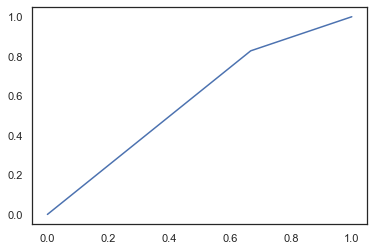

In [1420]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv_eval_mf = lm.fit(x_train_mf_deploy_rv, y_train_mf_deploy_rv.values.ravel())

#Evaluate the model on the test set
mf_predictions_lm_rv = model_lm_rv_eval_mf.score(x_train_mf_deploy_rv, y_train_mf_deploy_rv)
mf_predictions_lm_rv = model_lm_rv_eval_mf.predict(x_train_mf_deploy_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_lm = round(metrics.mean_absolute_error(y_train_mf_deploy_rv, mf_predictions_lm_rv),3)
print('Mean Absolute Error:',mean_abs_error_mf_lm)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train_mf_deploy_rv, mf_predictions_lm_rv),3),'\n\n')

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_mf_lm = np.zeros_like(mf_predictions_lm_rv)    # initialise a matrix full with zeros
y_pred_classes_mf_lm[mf_predictions_lm_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_mf_lm = np.zeros_like(y_train_mf_deploy_rv)
y_test_classes_mf_lm[y_train_mf_deploy_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lm = confusion_matrix(y_test_classes_mf_lm, y_pred_classes_mf_lm)
print(cmx_mf_lm,'\n')
TP_mf_lm = cmx_mf_lm[1,1]
TN_mf_lm = cmx_mf_lm[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lm[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lm[1,1]+cmx_mf_lm[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_classes_mf_lm,y_pred_classes_mf_lm)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_classes_mf_lm,y_pred_classes_mf_lm),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

Mean Absolute Error: 3.494
Mean Squared Error: 37.285 


CONFUSION MATRIX (Test Set)
[[26 91]
 [12 23]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 23
TN (True Negative)                   Negative responding clients well predicted : 26
                                                                     TOTAL TRUE : 49 

ROC CURVE
Area under the curve - AUC : 0.44


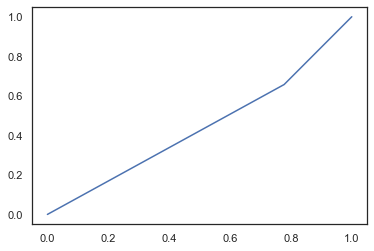

In [1421]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv_eval_mf_cv = lm.fit(x_cv_mf_deploy_rv, y_cv_mf_deploy_rv.values.ravel())

#Evaluate the model on the test set
mf_predictions_lm_rv_cv = model_lm_rv_eval_mf.score(x_cv_mf_deploy_rv, y_cv_mf_deploy_rv)
mf_predictions_lm_rv_cv = model_lm_rv_eval_mf.predict(x_cv_mf_deploy_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_lm_cv = round(metrics.mean_absolute_error(y_cv_mf_deploy_rv, mf_predictions_lm_rv_cv),3)
print('Mean Absolute Error:',mean_abs_error_mf_lm_cv)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_cv_mf_deploy_rv, mf_predictions_lm_rv_cv),3),'\n\n')

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_mf_lm_cv = np.zeros_like(mf_predictions_lm_rv_cv)    # initialise a matrix full with zeros
y_pred_classes_mf_lm_cv[mf_predictions_lm_rv_cv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_mf_lm_cv = np.zeros_like(y_cv_mf_deploy_rv)
y_test_classes_mf_lm_cv[y_cv_mf_deploy_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_lm_cv = confusion_matrix(y_test_classes_mf_lm_cv, y_pred_classes_mf_lm_cv)
print(cmx_mf_lm_cv,'\n')
TP_mf_lm_cv = cmx_mf_lm_cv[1,1]
TN_mf_lm_cv = cmx_mf_lm_cv[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_lm_cv[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_lm_cv[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_lm_cv[1,1]+cmx_mf_lm_cv[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_classes_mf_lm_cv,y_pred_classes_mf_lm_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_classes_mf_lm_cv,y_pred_classes_mf_lm_cv),3))
plt.show()

##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [1422]:
#####TEST OPTIMISATION TO PROCEED BUT NO TIME

## SVR

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

Mean Absolute Error: 0.143
Mean Squared Error: 0.143
Root Mean Squared Error: 0.378 

CONFUSION MATRIX (Test Set)
[[521   0]
 [  0  87]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 87
TN (True Negative)                   Negative responding clients well predicted : 521
                                                                     TOTAL TRUE : 608 

Precision Rate - Micro : 1.0
Precision Rate - Weighted : 1.0 

Recall Rate - Micro : 1.0
Recall Rate - Weighted : 1.0 


ROC CURVE
Area under the curve - AUC : 1.0


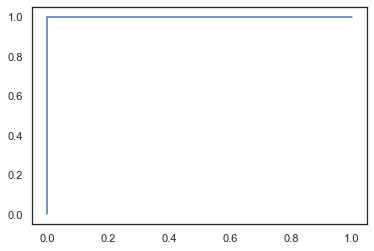

In [1423]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score
svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
model_svr_rv_eval_mf = svr.fit(x_train_mf_deploy_rv, y_train_mf_deploy_rv.values.ravel())

#Evaluate the model on the test set
mf_predictions_svr_rv = model_svr_rv_eval_mf.score(x_train_mf_deploy_rv, y_train_mf_deploy_rv)
mf_predictions_svr_rv = model_svr_rv_eval_mf.predict(x_train_mf_deploy_rv)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_mf_svr = np.zeros_like(mf_predictions_svr_rv)    # initialise a matrix full with zeros
y_pred_classes_mf_svr[mf_predictions_svr_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_mf_svr = np.zeros_like(y_train_mf_deploy_rv)
y_test_classes_mf_svr[y_train_mf_deploy_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_svr = round(metrics.mean_absolute_error(y_test_classes_mf_svr, y_pred_classes_mf_svr),3)
print('Mean Absolute Error:',mean_abs_error_mf_svr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_classes_mf_svr, y_pred_classes_mf_svr),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_classes_mf_svr, y_pred_classes_mf_svr)),3),'\n')


#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_svr = confusion_matrix(y_test_classes_mf_svr,y_test_classes_mf_svr)
print(cmx_mf_svr,'\n')
TP_mf_svr = cmx_mf_svr[1,1]
TN_mf_svr = cmx_mf_svr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_svr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_svr[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_svr[1,1]+cmx_mf_svr[0,0],'\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_svr_micro = precision_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='micro')
precision_mf_svr_weighted = precision_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_svr_micro,3))
print('Precision Rate - Weighted :',round(precision_mf_svr_weighted,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_svr_micro = recall_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='micro')
recall_mf_svr_weighted = recall_score(y_test_classes_mf_svr, y_test_classes_mf_svr, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_svr_micro,3))
print('Recall Rate - Weighted :',round(recall_mf_svr_weighted,3),'\n\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_classes_mf_svr, y_test_classes_mf_svr)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_classes_mf_svr, y_test_classes_mf_svr),3))
plt.show()

##### TEST OF THE CROSS VALIDATION DATASET

Mean Absolute Error: 0.211
Mean Squared Error: 0.211
Root Mean Squared Error: 0.459 

CONFUSION MATRIX (Test Set)
[[117   0]
 [  0  35]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 35
TN (True Negative)                   Negative responding clients well predicted : 117
                                                                     TOTAL TRUE : 152 

Precision Rate - Micro : 1.0
Precision Rate - Weighted : 1.0 

Recall Rate - Micro : 1.0
Recall Rate - Weighted : 1.0 


ROC CURVE
Area under the curve - AUC : 1.0


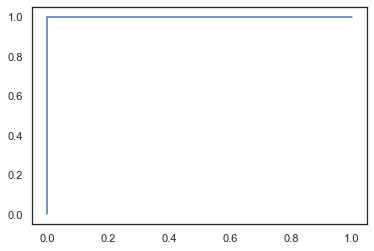

In [1424]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score
svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
model_svr_rv_eval_mf_cv = svr.fit(x_cv_mf_deploy_rv, y_cv_mf_deploy_rv.values.ravel())

#Evaluate the model on the test set
mf_predictions_svr_rv_cv = model_svr_rv_eval_mf_cv.score(x_cv_mf_deploy_rv, y_cv_mf_deploy_rv)
mf_predictions_svr_rv_cv = model_svr_rv_eval_mf_cv.predict(x_cv_mf_deploy_rv)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_mf_svr_cv = np.zeros_like(mf_predictions_svr_rv_cv)    # initialise a matrix full with zeros
y_pred_classes_mf_svr_cv[mf_predictions_svr_rv_cv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_mf_svr_cv = np.zeros_like(y_cv_mf_deploy_rv)
y_test_classes_mf_svr_cv[y_cv_mf_deploy_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_mf_svr_cv = round(metrics.mean_absolute_error(y_test_classes_mf_svr_cv, y_pred_classes_mf_svr_cv),3)
print('Mean Absolute Error:',mean_abs_error_mf_svr_cv)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_classes_mf_svr_cv, y_pred_classes_mf_svr_cv),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_classes_mf_svr_cv, y_pred_classes_mf_svr_cv)),3),'\n')


#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_mf_svr_cv = confusion_matrix(y_test_classes_mf_svr_cv,y_test_classes_mf_svr_cv)
print(cmx_mf_svr_cv,'\n')
TP_mf_svr_cv = cmx_mf_svr_cv[1,1]
TN_mf_svr_cv = cmx_mf_svr_cv[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_mf_svr_cv[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_mf_svr_cv[0,0])
print('                                                                     TOTAL TRUE :',cmx_mf_svr_cv[1,1]+cmx_mf_svr_cv[0,0],'\n')

# precision 
from sklearn.metrics import precision_score
precision_mf_svr_micro_cv = precision_score(y_test_classes_mf_svr_cv, y_test_classes_mf_svr_cv, average='micro')
precision_mf_svr_weighted_cv = precision_score(y_test_classes_mf_svr_cv, y_test_classes_mf_svr_cv, average='weighted')
print('Precision Rate - Micro :',round(precision_mf_svr_micro_cv,3))
print('Precision Rate - Weighted :',round(precision_mf_svr_weighted_cv,3),'\n')

#recall
from sklearn.metrics import recall_score
recall_mf_svr_micro_cv = recall_score(y_test_classes_mf_svr_cv, y_test_classes_mf_svr_cv, average='micro')
recall_mf_svr_weighted_cv = recall_score(y_test_classes_mf_svr_cv, y_test_classes_mf_svr_cv, average='weighted')
print('Recall Rate - Micro :',round(recall_mf_svr_micro_cv,3))
print('Recall Rate - Weighted :',round(recall_mf_svr_weighted_cv,3),'\n\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_classes_mf_svr_cv, y_test_classes_mf_svr_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_classes_mf_svr_cv, y_test_classes_mf_svr_cv),3))
plt.show()

##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [1425]:
#####TEST OPTIMISATION TO PROCEED BUT NO TIME

##### CONCLUSION FOR REVENUE_MF

In [1426]:
print('MODEL 1 LINEAR REGRESSION -----------------')
#print('Precision Rate - Weighted :',round(precision_mf_lm_weighted_optimized,3))
#print('Recall Rate - Weighted :',round(recall_mf_lm_weighted_optimized,3))
print('Mean Absolute Error :',mean_abs_error_mf_lm)
print('AUC :', round(roc_auc_score(y_test_classes_mf_lm,y_pred_classes_mf_lm),3))
print('TOTAL TRUE :',cmx_mf_lm[1,1]+cmx_mf_lm[0,0])
print(cmx_mf_lm,'\n')


print('MODEL 2 SVR ---------------------------------')

print('Mean Absolute Error :',mean_abs_error_mf_svr)
print('AUC :', round(roc_auc_score(y_test_classes_mf_svr,y_pred_classes_mf_svr),3))
print('TOTAL TRUE :',cmx_mf_svr[1,1]+cmx_mf_svr[0,0])
print(cmx_mf_svr,'\n')


MODEL 1 LINEAR REGRESSION -----------------
Mean Absolute Error : 3.549
AUC : 0.58
TOTAL TRUE : 245
[[173 348]
 [ 15  72]] 

MODEL 2 SVR ---------------------------------
Mean Absolute Error : 0.143
AUC : 0.5
TOTAL TRUE : 608
[[521   0]
 [  0  87]] 



######## BASED ON THE RESULTS : the most performing model for projecting REVENUE_MF is SVR but suspicion of overfitting
Linear regression appears to have results with great benchmark to SVR : the surer

## MODEL REVENUE_CL : PARAMETERS AND DEPLOYMENT

##### SELECTION OF TARGET METRIC + EXCLUSION OF METRICS

In [1427]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_mf_rv = df2[['Revenue_CL']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


##### SPLIT OF THE DATASET INTO TRAIN / CROSS VALIDATION / TEST

In [1428]:
#import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cl_deploy_rv, x_test_cl_deploy_rv, y_train_cl_deploy_rv,y_test_cl_deploy_rv = train_test_split(x,y_cl_rv,test_size=0.2,random_state=42)
x_train_cl_deploy_rv, x_cv_cl_deploy_rv, y_train_cl_deploy_rv, y_cv_cl_deploy_rv = train_test_split(x_train_cl_deploy_rv,y_train_cl_deploy_rv,test_size=0.2,random_state=42)

print('Training Features Shape:', x_train_cl_deploy_rv.shape)
print('Training Labels Shape:', y_train_cl_deploy_rv.shape)
print('Cross Validation Testing Features Shape:', x_cv_cl_deploy_rv.shape)
print('Cross Validation Testing Labels Shape:', y_cv_cl_deploy_rv.shape)
print('Testing Features Shape:', x_test_cl_deploy_rv.shape)
print('Testing Labels Shape:', y_test_cl_deploy_rv.shape,'\n')

print('Right Split with an overall matching number of observations :',x_train_cl_deploy_rv.shape[0] + x_cv_cl_deploy_rv.shape[0] + x_test_cl_deploy_rv.shape[0] == x.shape[0])
print('Right Split with an overall matching number of variables :', (x_train_cl_deploy_rv.shape[1] == x_cv_cl_deploy_rv.shape[1] == x_test_cl_deploy_rv.shape[1]) == y_cl_rv.shape[1])


Training Features Shape: (608, 24)
Training Labels Shape: (608, 1)
Cross Validation Testing Features Shape: (152, 24)
Cross Validation Testing Labels Shape: (152, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1) 

Right Split with an overall matching number of observations : True
Right Split with an overall matching number of variables : True


### LINEAR REGRESSION

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

Mean Absolute Error: 4.528
Mean Squared Error: 38.084 


CONFUSION MATRIX (Test Set)
[[ 29 390]
 [  4 185]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 185
TN (True Negative)                   Negative responding clients well predicted : 29
                                                                     TOTAL TRUE : 214 

ROC CURVE
Area under the curve - AUC : 0.524


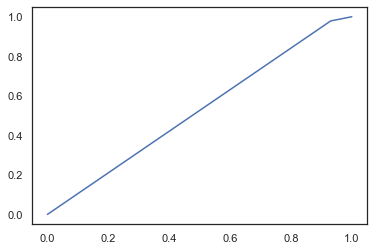

In [1429]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv_eval_cl = lm.fit(x_train_cl_deploy_rv, y_train_cl_deploy_rv.values.ravel())

#Evaluate the model on the test set
cl_predictions_lm_rv = model_lm_rv_eval_cl.score(x_train_cl_deploy_rv, y_train_cl_deploy_rv)
cl_predictions_lm_rv = model_lm_rv_eval_cl.predict(x_train_cl_deploy_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_lm = round(metrics.mean_absolute_error(y_train_cl_deploy_rv, cl_predictions_lm_rv),3)
print('Mean Absolute Error:',mean_abs_error_cl_lm)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train_cl_deploy_rv, cl_predictions_lm_rv),3),'\n\n')

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cl_lm = np.zeros_like(cl_predictions_lm_rv)    # initialise a matrix full with zeros
y_pred_classes_cl_lm[cl_predictions_lm_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cl_lm = np.zeros_like(y_train_cl_deploy_rv)
y_test_classes_cl_lm[y_train_cl_deploy_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lm = confusion_matrix(y_test_classes_cl_lm, y_pred_classes_cl_lm)
print(cmx_cl_lm,'\n')
TP_cl_lm = cmx_cl_lm[1,1]
TN_cl_lm = cmx_cl_lm[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lm[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lm[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_lm[1,1]+cmx_cl_lm[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_classes_cl_lm,y_pred_classes_cl_lm)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_classes_cl_lm,y_pred_classes_cl_lm),3))
plt.show()


##### TEST OF THE CROSS VALIDATION DATASET

Mean Absolute Error: 5.949
Mean Squared Error: 154.367 


CONFUSION MATRIX (Test Set)
[[  3 102]
 [  0  47]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 47
TN (True Negative)                   Negative responding clients well predicted : 3
                                                                     TOTAL TRUE : 50 

ROC CURVE
Area under the curve - AUC : 0.514


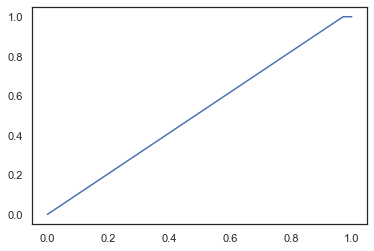

In [1430]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv_eval_cl_cv = lm.fit(x_cv_cl_deploy_rv, y_cv_cl_deploy_rv.values.ravel())

#Evaluate the model on the test set
cl_predictions_lm_rv_cv = model_lm_rv_eval_cl.score(x_cv_cl_deploy_rv, y_cv_cl_deploy_rv)
cl_predictions_lm_rv_cv = model_lm_rv_eval_cl.predict(x_cv_cl_deploy_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_lm_cv = round(metrics.mean_absolute_error(y_cv_cl_deploy_rv, cl_predictions_lm_rv_cv),3)
print('Mean Absolute Error:',mean_abs_error_cl_lm_cv)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_cv_cl_deploy_rv, cl_predictions_lm_rv_cv),3),'\n\n')

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cl_lm_cv = np.zeros_like(cl_predictions_lm_rv_cv)    # initialise a matrix full with zeros
y_pred_classes_cl_lm_cv[cl_predictions_lm_rv_cv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cl_lm_cv = np.zeros_like(y_cv_cl_deploy_rv)
y_test_classes_cl_lm_cv[y_cv_cl_deploy_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_lm_cv = confusion_matrix(y_test_classes_cl_lm_cv, y_pred_classes_cl_lm_cv)
print(cmx_cl_lm_cv,'\n')
TP_cl_lm_cv = cmx_cl_lm_cv[1,1]
TN_cl_lm_cv = cmx_cl_lm_cv[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_lm_cv[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_lm_cv[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_lm_cv[1,1]+cmx_cl_lm_cv[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_classes_cl_lm_cv,y_pred_classes_cl_lm_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_classes_cl_lm_cv,y_pred_classes_cl_lm_cv),3))
plt.show()


##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [1431]:
#####TEST OPTIMISATION TO PROCEED BUT NO TIME

## SVR

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

In [1432]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score
svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
model_svr_rv_eval_cl = svr.fit(x_train_cl_deploy_rv, y_train_cl_deploy_rv.values.ravel())

#Evaluate the model on the test set
cl_predictions_svr_rv = model_svr_rv_eval_cl.score(x_train_cl_deploy_rv, y_train_cl_deploy_rv)
cl_predictions_svr_rv = model_svr_rv_eval_cl.predict(x_train_cl_deploy_rv)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cl_svr = np.zeros_like(cl_predictions_svr_rv)    # initialise a matrix full with zeros
y_pred_classes_cl_svr[cl_predictions_svr_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cl_svr = np.zeros_like(y_train_cl_deploy_rv)
y_test_classes_cl_svr[y_train_cl_deploy_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_svr = round(metrics.mean_absolute_error(y_test_classes_cl_svr, y_pred_classes_cl_svr),3)
print('Mean Absolute Error:',mean_abs_error_cl_svr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_classes_cl_svr, y_pred_classes_cl_svr),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_classes_cl_svr, y_pred_classes_cl_svr)),3),'\n')


#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_svr = confusion_matrix(y_test_classes_cl_svr,y_test_classes_cl_svr)
print(cmx_cl_svr,'\n')
TP_cl_svr = cmx_cl_svr[1,1]
TN_cl_svr = cmx_cl_svr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_svr[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_svr[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_svr[1,1]+cmx_cl_svr[0,0],'\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_svr_micro = precision_score(y_test_classes_cl_svr, y_test_classes_cl_svr, average='micro')
precision_cl_svr_weighted = precision_score(y_test_classes_cl_svr, y_test_classes_cl_svr, average='weighted')


Mean Absolute Error: 0.303
Mean Squared Error: 0.303
Root Mean Squared Error: 0.55 

CONFUSION MATRIX (Test Set)
[[419   0]
 [  0 189]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 189
TN (True Negative)                   Negative responding clients well predicted : 419
                                                                     TOTAL TRUE : 608 



##### TEST OF THE CROSS VALIDATION DATASET

In [1433]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score
svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
model_svr_rv_eval_cl_cv = svr.fit(x_cv_cl_deploy_rv, y_cv_cl_deploy_rv.values.ravel())

#Evaluate the model on the test set
cl_predictions_svr_rv_cv = model_svr_rv_eval_cl_cv.score(x_cv_cl_deploy_rv, y_cv_cl_deploy_rv)
cl_predictions_svr_rv_cv = model_svr_rv_eval_cl_cv.predict(x_cv_cl_deploy_rv)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_classes_cl_svr_cv = np.zeros_like(cl_predictions_svr_rv_cv)    # initialise a matrix full with zeros
y_pred_classes_cl_svr_cv[cl_predictions_svr_rv_cv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_classes_cl_svr_cv = np.zeros_like(y_cv_cl_deploy_rv)
y_test_classes_cl_svr_cv[y_cv_cl_deploy_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_cl_svr_cv = round(metrics.mean_absolute_error(y_test_classes_cl_svr_cv, y_pred_classes_cl_svr_cv),3)
print('Mean Absolute Error:',mean_abs_error_cl_svr_cv)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_classes_cl_svr_cv, y_pred_classes_cl_svr_cv),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_classes_cl_svr_cv, y_pred_classes_cl_svr_cv)),3),'\n')


#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cl_svr_cv = confusion_matrix(y_test_classes_cl_svr_cv,y_test_classes_cl_svr_cv)
print(cmx_cl_svr_cv,'\n')
TP_cl_svr_cv = cmx_cl_svr_cv[1,1]
TN_cl_svr_cv = cmx_cl_svr_cv[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted :',cmx_cl_svr_cv[1,1])
print('TN (True Negative)                   Negative responding clients well predicted :',cmx_cl_svr_cv[0,0])
print('                                                                     TOTAL TRUE :',cmx_cl_svr_cv[1,1]+cmx_cl_svr_cv[0,0],'\n')

# precision 
from sklearn.metrics import precision_score
precision_cl_svr_micro_cv = precision_score(y_test_classes_cl_svr_cv, y_test_classes_cl_svr_cv, average='micro')
precision_cl_svr_weighted_cv = precision_score(y_test_classes_cl_svr_cv, y_test_classes_cl_svr_cv, average='weighted')


Mean Absolute Error: 0.257
Mean Squared Error: 0.257
Root Mean Squared Error: 0.507 

CONFUSION MATRIX (Test Set)
[[105   0]
 [  0  47]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding clients well predicted : 47
TN (True Negative)                   Negative responding clients well predicted : 105
                                                                     TOTAL TRUE : 152 



##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [1434]:
#####TEST OPTIMISATION TO PROCEED BUT NO TIME

##### CONCLUSION FOR REVENUE_CL

In [1435]:
print('MODEL 1 LINEAR REGRESSION -----------------')
#print('Precision Rate - Weighted :',round(precision_cl_lm_weighted_optimized,3))
#print('Recall Rate - Weighted :',round(recall_cl_lm_weighted_optimized,3))
print('Mean Absolute Error :',mean_abs_error_cl_lm)
print('AUC :', round(roc_auc_score(y_test_classes_cl_lm,y_pred_classes_cl_lm),3))
print('TOTAL TRUE :',cmx_cl_lm[1,1]+cmx_cl_lm[0,0])
print(cmx_cl_lm,'\n')


print('MODEL 2 SVR ---------------------------------')

print('Mean Absolute Error :',mean_abs_error_cl_svr)
print('AUC :', round(roc_auc_score(y_test_classes_cl_svr,y_pred_classes_cl_svr),3))
print('TOTAL TRUE :',cmx_cl_svr[1,1]+cmx_cl_svr[0,0])
print(cmx_cl_svr,'\n')


MODEL 1 LINEAR REGRESSION -----------------
Mean Absolute Error : 4.528
AUC : 0.524
TOTAL TRUE : 214
[[ 29 390]
 [  4 185]] 

MODEL 2 SVR ---------------------------------
Mean Absolute Error : 0.303
AUC : 0.516
TOTAL TRUE : 608
[[419   0]
 [  0 189]] 



######## BASED ON THE RESULTS : the most performing model for projecting REVENUE_CL is SVR but suspicion of overfitting
Linear regression appears to have results with great benchmark to SVR : the surer


## MODEL REVENUE_CC : PARAMETERS AND DEPLOYMENT

##### SELECTION OF TARGET METRIC + EXCLUSION OF METRICS

In [1436]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}
features = [a for a in df2 if a not in dropers]
print(features)

x = df2[features]
y_mf_rv = df2[['Revenue_CC']]

['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_OVD', 'ActBal_CA', 'ActBal_SA', 'ActBal_OVD', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']


##### SPLIT OF THE DATASET INTO TRAIN / CROSS VALIDATION / TEST

In [1437]:
#import numpy as np
from sklearn.model_selection import train_test_split
# Split data in train and test (80% of data for training and 20% for testing).
x_train_cc_deploy_rv, x_test_cc_deploy_rv, y_train_cc_deploy_rv,y_test_cc_deploy_rv = train_test_split(x,y_cc_rv,test_size=0.2,random_state=42)
x_train_cc_deploy_rv, x_cv_cc_deploy_rv, y_train_cc_deploy_rv, y_cv_cc_deploy_rv = train_test_split(x_train_cc_deploy_rv,y_train_cc_deploy_rv,test_size=0.2,random_state=42)

print('Training Features Shape:', x_train_cc_deploy_rv.shape)
print('Training Labels Shape:', y_train_cc_deploy_rv.shape)
print('Cross Validation Testing Features Shape:', x_cv_cc_deploy_rv.shape)
print('Cross Validation Testing Labels Shape:', y_cv_cc_deploy_rv.shape)
print('Testing Features Shape:', x_test_cc_deploy_rv.shape)
print('Testing Labels Shape:', y_test_cc_deploy_rv.shape,'\n')

print('Right Split with an overall matching number of observations :',x_train_cc_deploy_rv.shape[0] + x_cv_cc_deploy_rv.shape[0] + x_test_cc_deploy_rv.shape[0] == x.shape[0])
print('Right Split with an overall matching number of variables :', (x_train_cc_deploy_rv.shape[1] == x_cv_cc_deploy_rv.shape[1] == x_test_cc_deploy_rv.shape[1]) == y_cc_rv.shape[1])


Training Features Shape: (608, 24)
Training Labels Shape: (608, 1)
Cross Validation Testing Features Shape: (152, 24)
Cross Validation Testing Labels Shape: (152, 1)
Testing Features Shape: (191, 24)
Testing Labels Shape: (191, 1) 

Right Split with an overall matching number of observations : True
Right Split with an overall matching number of variables : True


### LINEAR REGRESSION

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

Mean Absolute Error: 3.535
Mean Squared Error: 111.686 


CONFUSION MATRIX (Test Set)
[[155 320]
 [ 34  99]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted : 99
TN (True Negative)                   Negative responding ccients well predicted : 155
                                                                     TOTAL TRUE : 254 

ROC CURVE
Area under the curve - AUC : 0.535


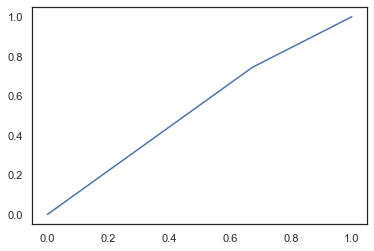

In [1438]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv_eval_cc = lm.fit(x_train_cc_deploy_rv, y_train_cc_deploy_rv.values.ravel())

#Evaluate the model on the test set
cc_predictions_lm_rv = model_lm_rv_eval_cc.score(x_train_cc_deploy_rv, y_train_cc_deploy_rv)
cc_predictions_lm_rv = model_lm_rv_eval_cc.predict(x_train_cc_deploy_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_lm = round(metrics.mean_absolute_error(y_train_cc_deploy_rv, cc_predictions_lm_rv),3)
print('Mean Absolute Error:',mean_abs_error_cc_lm)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train_cc_deploy_rv, cc_predictions_lm_rv),3),'\n\n')

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_ccasses_cc_lm = np.zeros_like(cc_predictions_lm_rv)    # initialise a matrix full with zeros
y_pred_ccasses_cc_lm[cc_predictions_lm_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_ccasses_cc_lm = np.zeros_like(y_train_cc_deploy_rv)
y_test_ccasses_cc_lm[y_train_cc_deploy_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_lm = confusion_matrix(y_test_ccasses_cc_lm, y_pred_ccasses_cc_lm)
print(cmx_cc_lm,'\n')
TP_cc_lm = cmx_cc_lm[1,1]
TN_cc_lm = cmx_cc_lm[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted :',cmx_cc_lm[1,1])
print('TN (True Negative)                   Negative responding ccients well predicted :',cmx_cc_lm[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_lm[1,1]+cmx_cc_lm[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_ccasses_cc_lm,y_pred_ccasses_cc_lm)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_ccasses_cc_lm,y_pred_ccasses_cc_lm),3))
plt.show()


##### TEST OF THE CROSS VALIDATION DATASET

Mean Absolute Error: 5.701
Mean Squared Error: 1105.189 


CONFUSION MATRIX (Test Set)
[[43 75]
 [ 4 30]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted : 30
TN (True Negative)                   Negative responding ccients well predicted : 43
                                                                     TOTAL TRUE : 73 

ROC CURVE
Area under the curve - AUC : 0.623


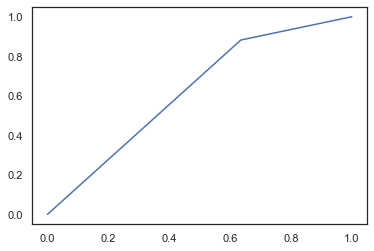

In [1439]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

#Plug the model to the training set
model_lm_rv_eval_cc_cv = lm.fit(x_cv_cc_deploy_rv, y_cv_cc_deploy_rv.values.ravel())

#Evaluate the model on the test set
cc_predictions_lm_rv_cv = model_lm_rv_eval_cc.score(x_cv_cc_deploy_rv, y_cv_cc_deploy_rv)
cc_predictions_lm_rv_cv = model_lm_rv_eval_cc.predict(x_cv_cc_deploy_rv)

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_lm_cv = round(metrics.mean_absolute_error(y_cv_cc_deploy_rv, cc_predictions_lm_rv_cv),3)
print('Mean Absolute Error:',mean_abs_error_cc_lm_cv)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_cv_cc_deploy_rv, cc_predictions_lm_rv_cv),3),'\n\n')

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_ccasses_cc_lm_cv = np.zeros_like(cc_predictions_lm_rv_cv)    # initialise a matrix full with zeros
y_pred_ccasses_cc_lm_cv[cc_predictions_lm_rv_cv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_ccasses_cc_lm_cv = np.zeros_like(y_cv_cc_deploy_rv)
y_test_ccasses_cc_lm_cv[y_cv_cc_deploy_rv > cutoff] = 1

#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_lm_cv = confusion_matrix(y_test_ccasses_cc_lm_cv, y_pred_ccasses_cc_lm_cv)
print(cmx_cc_lm_cv,'\n')
TP_cc_lm_cv = cmx_cc_lm_cv[1,1]
TN_cc_lm_cv = cmx_cc_lm_cv[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted :',cmx_cc_lm_cv[1,1])
print('TN (True Negative)                   Negative responding ccients well predicted :',cmx_cc_lm_cv[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_lm_cv[1,1]+cmx_cc_lm_cv[0,0],'\n')

#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_ccasses_cc_lm_cv,y_pred_ccasses_cc_lm_cv)
plt.plot(fpr, tpr)
print('ROC CURVE')
print('Area under the curve - AUC :', round(roc_auc_score(y_test_ccasses_cc_lm_cv,y_pred_ccasses_cc_lm_cv),3))
plt.show()


##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [1440]:
#####TEST OPTIMISATION TO PROCEED BUT NO TIME

## SVR

###### TEST ON THE TRAINING DATASET WITH ALL FEATURES (RUNNING THE DIRTY MODEL NON OPTIMISED)

In [1441]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score
svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
model_svr_rv_eval_cc = svr.fit(x_train_cc_deploy_rv, y_train_cc_deploy_rv.values.ravel())

#Evaluate the model on the test set
cc_predictions_svr_rv = model_svr_rv_eval_cc.score(x_train_cc_deploy_rv, y_train_cc_deploy_rv)
cc_predictions_svr_rv = model_svr_rv_eval_cc.predict(x_train_cc_deploy_rv)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_ccasses_cc_svr = np.zeros_like(cc_predictions_svr_rv)    # initialise a matrix full with zeros
y_pred_ccasses_cc_svr[cc_predictions_svr_rv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_ccasses_cc_svr = np.zeros_like(y_train_cc_deploy_rv)
y_test_ccasses_cc_svr[y_train_cc_deploy_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_svr = round(metrics.mean_absolute_error(y_test_ccasses_cc_svr, y_pred_ccasses_cc_svr),3)
print('Mean Absolute Error:',mean_abs_error_cc_svr)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_ccasses_cc_svr, y_pred_ccasses_cc_svr),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_ccasses_cc_svr, y_pred_ccasses_cc_svr)),3),'\n')


#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_svr = confusion_matrix(y_test_ccasses_cc_svr,y_test_ccasses_cc_svr)
print(cmx_cc_svr,'\n')
TP_cc_svr = cmx_cc_svr[1,1]
TN_cc_svr = cmx_cc_svr[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted :',cmx_cc_svr[1,1])
print('TN (True Negative)                   Negative responding ccients well predicted :',cmx_cc_svr[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_svr[1,1]+cmx_cc_svr[0,0],'\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_svr_micro = precision_score(y_test_ccasses_cc_svr, y_test_ccasses_cc_svr, average='micro')
precision_cc_svr_weighted = precision_score(y_test_ccasses_cc_svr, y_test_ccasses_cc_svr, average='weighted')


Mean Absolute Error: 0.191
Mean Squared Error: 0.191
Root Mean Squared Error: 0.437 

CONFUSION MATRIX (Test Set)
[[475   0]
 [  0 133]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted : 133
TN (True Negative)                   Negative responding ccients well predicted : 475
                                                                     TOTAL TRUE : 608 



##### TEST OF THE CROSS VALIDATION DATASET

In [1442]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score
svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
model_svr_rv_eval_cc_cv = svr.fit(x_cv_cc_deploy_rv, y_cv_cc_deploy_rv.values.ravel())

#Evaluate the model on the test set
cc_predictions_svr_rv_cv = model_svr_rv_eval_cc_cv.score(x_cv_cc_deploy_rv, y_cv_cc_deploy_rv)
cc_predictions_svr_rv_cv = model_svr_rv_eval_cc_cv.predict(x_cv_cc_deploy_rv)

#Set off a limit cutoff to transform continuous data into binary data
cutoff = 0.7                                          
y_pred_ccasses_cc_svr_cv = np.zeros_like(cc_predictions_svr_rv_cv)    # initialise a matrix full with zeros
y_pred_ccasses_cc_svr_cv[cc_predictions_svr_rv_cv > cutoff] = 1       # add a 1 if the cutoff was breached
#perform the same for the actual values too:
y_test_ccasses_cc_svr_cv = np.zeros_like(y_cv_cc_deploy_rv)
y_test_ccasses_cc_svr_cv[y_cv_cc_deploy_rv > cutoff] = 1

#Evaluating the results
from sklearn import metrics
mean_abs_error_cc_svr_cv = round(metrics.mean_absolute_error(y_test_ccasses_cc_svr_cv, y_pred_ccasses_cc_svr_cv),3)
print('Mean Absolute Error:',mean_abs_error_cc_svr_cv)
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test_ccasses_cc_svr_cv, y_pred_ccasses_cc_svr_cv),3))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test_ccasses_cc_svr_cv, y_pred_ccasses_cc_svr_cv)),3),'\n')


#confusion matrix
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX (Test Set)")
cmx_cc_svr_cv = confusion_matrix(y_test_ccasses_cc_svr_cv,y_test_ccasses_cc_svr_cv)
print(cmx_cc_svr_cv,'\n')
TP_cc_svr_cv = cmx_cc_svr_cv[1,1]
TN_cc_svr_cv = cmx_cc_svr_cv[0,0]
print('TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted :',cmx_cc_svr_cv[1,1])
print('TN (True Negative)                   Negative responding ccients well predicted :',cmx_cc_svr_cv[0,0])
print('                                                                     TOTAL TRUE :',cmx_cc_svr_cv[1,1]+cmx_cc_svr_cv[0,0],'\n')

# precision 
from sklearn.metrics import precision_score
precision_cc_svr_micro_cv = precision_score(y_test_ccasses_cc_svr_cv, y_test_ccasses_cc_svr_cv, average='micro')
precision_cc_svr_weighted_cv = precision_score(y_test_ccasses_cc_svr_cv, y_test_ccasses_cc_svr_cv, average='weighted')


Mean Absolute Error: 0.164
Mean Squared Error: 0.164
Root Mean Squared Error: 0.406 

CONFUSION MATRIX (Test Set)
[[118   0]
 [  0  34]] 

TP (True Positive) ---- TARGET ----> POSITIVE responding ccients well predicted : 34
TN (True Negative)                   Negative responding ccients well predicted : 118
                                                                     TOTAL TRUE : 152 



##### TEST ON THE TRAINING DATASET WITH IMPROVING PARAMETERS

In [1443]:
#####TEST OPTIMISATION TO PROCEED BUT NO TIME

##### CONCLUSION FOR REVENUE_CC

In [1444]:
print('MODEL 1 LINEAR REGRESSION -----------------')
#print('Precision Rate - Weighted :',round(precision_cc_lm_weighted_optimized,3))
#print('Recall Rate - Weighted :',round(recall_cc_lm_weighted_optimized,3))
print('Mean Absolute Error :',mean_abs_error_cc_lm)
print('AUC :', round(roc_auc_score(y_test_ccasses_cc_lm,y_pred_ccasses_cc_lm),3))
print('TOTAL TRUE :',cmx_cc_lm[1,1]+cmx_cc_lm[0,0])
print(cmx_cc_lm,'\n')


print('MODEL 2 SVR ---------------------------------')

print('Mean Absolute Error :',mean_abs_error_cc_svr)
print('AUC :', round(roc_auc_score(y_test_ccasses_cc_svr,y_pred_ccasses_cc_svr),3))
print('TOTAL TRUE :',cmx_cc_svr[1,1]+cmx_cc_svr[0,0])
print(cmx_cc_svr,'\n')


MODEL 1 LINEAR REGRESSION -----------------
Mean Absolute Error : 3.535
AUC : 0.535
TOTAL TRUE : 254
[[155 320]
 [ 34  99]] 

MODEL 2 SVR ---------------------------------
Mean Absolute Error : 0.191
AUC : 0.58
TOTAL TRUE : 608
[[475   0]
 [  0 133]] 



######## BASED ON THE RESULTS : the most performing model for projecting REVENUE_CC is SVR but suspicion of overfitting
Linear regression appears to have results with great benchmark to SVR : the surer


### MODELS ELECTED FOR DEPLOYMENT :
>  - Revenue_MF :  LINEAR REGRESSION
 - Revenue_CL :  LINEAR REGRESSION
 - Revenue_CC :  LINEAR REGRESSION


# 8. MODELS DEPLOYMENT TO PREDICT 3 REVENUE TARGETS

##### REVENUE_MF : DEPLOYING THE MODEL TO CREATE PREDICTIONS

##### Definition of the target over the target dataset

In [1445]:
df_2_40_3 = df_2_40_3.set_value(0, 'Revenue_MF', 1) 
df_2_40_3[['Revenue_MF']].nunique()

Revenue_MF    2
dtype: int64

In [1446]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}#,'Revenue_Total', 'Sale_Total', 'Responding_Client'}

features_60 = [a for a in df2 if a not in dropers]
x_mf_df_2_60 = df2[features_60]
y_mf_df_2_60 = df2[['Revenue_MF']]

features_40 = [a for a in df_2_40_3 if a not in dropers]
x_mf_df_2_40 = df_2_40_3[features_40]
y_mf_df_2_40 = df_2_40_3[['Revenue_MF']]

#selector = SelectKBest(chi2, k=21)
#x_mf_df_2_60 = selector.fit_transform(x_mf_df_2_60,y_mf_df_2_60)
#x_mf_df_2_40 = selector.fit_transform(x_mf_df_2_40,y_mf_df_2_40)

print(y_mf_df_2_40.nunique())
print('x 60% :', x_mf_df_2_60.shape,'\ny 60% :', y_mf_df_2_60.shape,'\n\nx 40%:', x_mf_df_2_40.shape,'\ny 40%:', y_mf_df_2_40.shape)

Revenue_MF    2
dtype: int64
x 60% : (951, 24) 
y 60% : (951, 1) 

x 40%: (646, 24) 
y 40%: (646, 1)



###### Model definition : LINEAR REGRESSION

In [1447]:
#from sklearn import svm
#from sklearn.svm import SVR
#import numpy as np
#from sklearn.metrics import accuracy_score
#svr = SVR(C=1.0, epsilon=0.2)

#Plug the model to the training set
#model_svr_deployed = svr.fit(x_mf_df_2_60, y_mf_df_2_60.values.ravel())
#y_pred_mf_svr_ok = model_svr_deployed.score(x_mf_df_2_60, y_mf_df_2_60)

#y_pred_mf_svr_ok = model_svr_deployed.predict(x_mf_df_2_40)
#y_pred_mf_svr_ok

In [1448]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

model_lm_rv_eval_mf = lm.fit(x_mf_df_2_60, y_mf_df_2_60.values.ravel())
y_pred_mf_lm_ok = model_lm_rv_eval_mf.predict(x_mf_df_2_40)

pred_labels_mf_rv = {'Client': df_2_40_3['Client'], 'Revenue_MF_Pred': y_pred_mf_lm_ok}
pred_mf_lm = pd.DataFrame(pred_labels_mf_rv,columns= ['Client', 'Revenue_MF_Pred']).sort_values(by=['Client']).set_index('Client')

print('Verification Projection :',pred_mf_lm['Revenue_MF_Pred'].describe,' with nunique() of',pred_mf_lm['Revenue_MF_Pred'].nunique())
print('Number of Sales projected :',pred_mf_lm['Revenue_MF_Pred'].sum(),' / out of ',pred_mf_lm['Revenue_MF_Pred'].count())
pred_mf_lm

Verification Projection : <bound method NDFrame.describe of Client
3       4.339805
4      -0.396705
5       1.961506
7       3.159796
9       3.306984
          ...   
1606    1.571951
1609    1.063827
1610    4.981343
1611    1.570916
1614    1.264202
Name: Revenue_MF_Pred, Length: 646, dtype: float64>  with nunique() of 646
Number of Sales projected : 1391.7767711292995  / out of  646


,Revenue_MF_Pred
Client,
3,4.339805
4,-0.396705
5,1.961506
7,3.159796
9,3.306984
...,...
1606,1.571951
1609,1.063827
1610,4.981343


##### REVENUE_CL : DEPLOYING THE MODEL TO CREATE PREDICTIONS

##### Definition of the target over the target dataset

In [1449]:
df_2_40_3 = df_2_40_3.set_value(0, 'Revenue_CL', 1) 
df_2_40_3[['Revenue_CL']].nunique()

Revenue_CL    2
dtype: int64

In [1450]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}

features_60 = [a for a in df2 if a not in dropers]
x_cl_df_2_60 = df2[features_60]
y_cl_df_2_60 = df2[['Revenue_CL']]

features_40 = [a for a in df_2_40_3 if a not in dropers]
x_cl_df_2_40 = df_2_40_3[features_40]
y_cl_df_2_40 = df_2_40_3[['Revenue_CL']]

#selector = SelectKBest(chi2, k=20)
#x_cl_df_2_60 = selector.fit_transform(x_cl_df_2_60,y_cl_df_2_60)
#x_cl_df_2_40 = selector.fit_transform(x_cl_df_2_40,y_cl_df_2_40)

print(y_cl_df_2_40.nunique())
print('x 60% :', x_cl_df_2_60.shape,'\ny 60% :', y_cl_df_2_60.shape,'\n\nx 40%:', x_cl_df_2_40.shape,'\ny 40%:', y_cl_df_2_40.shape)

Revenue_CL    2
dtype: int64
x 60% : (951, 24) 
y 60% : (951, 1) 

x 40%: (646, 24) 
y 40%: (646, 1)



###### Model definition : LINEAR REGRESSION

In [1451]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

model_lm_rv_eval_cl = lm.fit(x_cl_df_2_60, y_cl_df_2_60.values.ravel())
y_pred_cl_lm_ok = model_lm_rv_eval_cl.predict(x_cl_df_2_40)

pred_labels_cl_rv = {'Client': df_2_40_3['Client'], 'Revenue_CL_Pred': y_pred_cl_lm_ok}
pred_cl_lm = pd.DataFrame(pred_labels_cl_rv,columns= ['Client', 'Revenue_CL_Pred']).sort_values(by=['Client']).set_index('Client')

print('Verification Projection :',pred_cl_lm['Revenue_CL_Pred'].describe,' with nunique() of',pred_cl_lm['Revenue_CL_Pred'].nunique())
print('Number of Sales projected :',pred_cl_lm['Revenue_CL_Pred'].sum(),' / out of ',pred_cl_lm['Revenue_CL_Pred'].count())
pred_cl_lm

Verification Projection : <bound method NDFrame.describe of Client
3       4.091717
4       6.918472
5       7.437693
7       4.118803
9       5.052171
          ...   
1606    2.479365
1609    4.340584
1610    1.471174
1611    5.208002
1614    2.442955
Name: Revenue_CL_Pred, Length: 646, dtype: float64>  with nunique() of 646
Number of Sales projected : 2325.4189301826477  / out of  646


,Revenue_CL_Pred
Client,
3,4.091717
4,6.918472
5,7.437693
7,4.118803
9,5.052171
...,...
1606,2.479365
1609,4.340584
1610,1.471174


##### SALE_CC : DEPLOYING THE MODEL TO CREATE PREDICTIONS

##### Definition of the target over the target dataset

In [1452]:
dropers = {'Sale_MF','Revenue_MF','Count_MF','ActBal_MF','Count_CC', 'ActBal_CC', 'Sale_CC', 'Revenue_CC','Count_CL', 'ActBal_CL', 'Sale_CL', 'Revenue_CL'}

features_60 = [a for a in df2 if a not in dropers]
x_cc_df_2_60 = df2[features_60]
y_cc_df_2_60 = df2[['Revenue_CC']]

features_40 = [a for a in df_2_40_3 if a not in dropers]
x_cc_df_2_40 = df_2_40_3[features_40]
y_cc_df_2_40 = df_2_40_3[['Revenue_CC']]

#selector = SelectKBest(chi2, k=21)
#x_cc_df_2_60 = selector.fit_transform(x_cc_df_2_60,y_cc_df_2_60)
#x_cc_df_2_40 = selector.fit_transform(x_cc_df_2_40,y_cc_df_2_40)

print(y_cc_df_2_40.nunique())
print('x 60% :', x_cc_df_2_60.shape,'\ny 60% :', y_cc_df_2_60.shape,'\n\nx 40%:', x_cc_df_2_40.shape,'\ny 40%:', y_cc_df_2_40.shape)

Revenue_CC    1
dtype: int64
x 60% : (951, 24) 
y 60% : (951, 1) 

x 40%: (646, 24) 
y 40%: (646, 1)



###### Model definition : LINEAR REGRESSION

In [1453]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()

model_lm_rv_eval_cc = lm.fit(x_cc_df_2_60, y_cc_df_2_60.values.ravel())
y_pred_cc_lm_ok = model_lm_rv_eval_cc.predict(x_cc_df_2_40)

pred_labels_cc_rv = {'Client': df_2_40_3['Client'], 'Revenue_CC_Pred': y_pred_cc_lm_ok}
pred_cc_lm = pd.DataFrame(pred_labels_cc_rv,columns= ['Client', 'Revenue_CC_Pred']).sort_values(by=['Client']).set_index('Client')

print('Verification Projection :',pred_cc_lm['Revenue_CC_Pred'].describe,' with nunique() of',pred_cc_lm['Revenue_CC_Pred'].nunique())
print('Number of Sales projected :',pred_cc_lm['Revenue_CC_Pred'].sum(),' / out of ',pred_cc_lm['Revenue_CC_Pred'].count())
pred_cc_lm

Verification Projection : <bound method NDFrame.describe of Client
3      -0.342604
4       2.380970
5       8.837391
7       2.023971
9       6.551210
          ...   
1606    1.405348
1609    0.666019
1610    7.996644
1611    7.168490
1614    1.223763
Name: Revenue_CC_Pred, Length: 646, dtype: float64>  with nunique() of 646
Number of Sales projected : 1874.8226613386364  / out of  646


,Revenue_CC_Pred
Client,
3,-0.342604
4,2.380970
5,8.837391
7,2.023971
9,6.551210
...,...
1606,1.405348
1609,0.666019
1610,7.996644


### FINAL PROJECTIONS FOR REVENUES

#### DATASET 40%

In [1454]:
M1_ = pd.merge(pred_mf_lm, pred_cl_lm, on='Client', how='left')
df_forecast_revenues = pd.merge(M1_,pred_cc_lm, on='Client', how='left')
df_forecast_revenues

,Revenue_MF_Pred,Revenue_CL_Pred,Revenue_CC_Pred
Client,,,
3,4.339805,4.091717,-0.342604
4,-0.396705,6.918472,2.380970
5,1.961506,7.437693,8.837391
7,3.159796,4.118803,2.023971
9,3.306984,5.052171,6.551210
...,...,...,...
1606,1.571951,2.479365,1.405348
1609,1.063827,4.340584,0.666019
1610,4.981343,1.471174,7.996644


# 9. FINAL PROJECTIONS MIXING SALES & REVENUES

In [1455]:
df_2_40_Pred_Final = pd.merge(df_forecast_revenues,df_2_40_Sales_Pred,on="Client",how='left')
df_2_40_Pred_Final = df_2_40_Pred_Final.drop(['Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'],axis=1)
df_2_40_Pred_Final['Sales_Total_Pred']=df_2_40_Pred_Final['Sale_MF_Pred']+df_2_40_Pred_Final['Sale_CL_Pred']+df_2_40_Pred_Final['Sale_CC_Pred']
df_2_40_Pred_Final['Revenue_Total_Pred']=df_2_40_Pred_Final['Revenue_MF_Pred']+df_2_40_Pred_Final['Revenue_CL_Pred']+df_2_40_Pred_Final['Revenue_CC_Pred']
df_2_40_Pred_Final = df_2_40_Pred_Final.sort_values('Revenue_Total_Pred',ascending=False)
df_2_40_Pred_Final = df_2_40_Pred_Final[df_2_40_Pred_Final['Sales_Total_Pred']!=0]
df_2_40_Pred_Final

,Client,Revenue_MF_Pred,Revenue_CL_Pred,Revenue_CC_Pred,Sale_MF_Pred,Sale_CL_Pred,Sale_CC_Pred,Sex,Age,Tenure,...,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sales_Total_Pred,Revenue_Total_Pred
608,1510,8.919510,1.211149,15.842508,1,1,0,2.0,19.0,44.0,...,0.000000,0.000000,13875.000000,18.0,14.0,0.0,0.0,12.0,2,25.973168
317,785,12.510365,2.790970,8.985860,0,0,1,2.0,9.0,179.0,...,571.428571,330.752143,709.000000,36.0,29.0,3.0,11.0,8.0,1,24.287195
419,1051,0.487329,11.569505,11.531280,1,1,0,2.0,34.0,102.0,...,321.428571,7.107143,233.142857,29.0,17.0,1.0,1.0,9.0,2,23.588115
66,161,0.381340,7.237521,10.787829,0,0,1,1.0,46.0,103.0,...,0.000000,0.000000,0.000000,20.0,0.0,0.0,0.0,0.0,1,18.406690
55,140,5.359747,4.212397,7.355081,1,1,1,2.0,25.0,125.0,...,0.000000,0.000000,2319.642857,7.0,6.0,0.0,0.0,3.0,3,16.927225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,427,2.370349,1.943906,-0.066042,0,0,1,2.0,25.0,20.0,...,0.000000,32.985714,0.000000,5.0,5.0,0.0,4.0,0.0,1,4.248213
475,1176,0.715116,3.037872,0.473707,0,0,1,2.0,14.0,19.0,...,0.000000,0.000000,0.000000,4.0,4.0,0.0,0.0,0.0,1,4.226694
152,357,1.241773,3.747993,-0.769238,0,1,0,2.0,5.0,39.0,...,0.000000,0.000000,0.000000,3.0,3.0,0.0,0.0,0.0,1,4.220527
424,1069,-1.379874,4.412314,0.526573,0,0,1,2.0,58.0,142.0,...,1428.571429,0.000000,1079.285714,10.0,10.0,2.0,0.0,5.0,1,3.559012


In [1472]:
df_2_40_Pred_Final = pd.merge(df_forecast_revenues,df_2_40_Sales_Pred,on="Client",how='left')
df_2_40_Pred_Final = df_2_40_Pred_Final.drop(['Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'],axis=1)
df_2_40_Pred_Final['Sales_Total_Pred']=df_2_40_Pred_Final['Sale_MF_Pred']+df_2_40_Pred_Final['Sale_CL_Pred']+df_2_40_Pred_Final['Sale_CC_Pred']
df_2_40_Pred_Final['Revenue_Total_Pred']=df_2_40_Pred_Final['Revenue_MF_Pred']+df_2_40_Pred_Final['Revenue_CL_Pred']+df_2_40_Pred_Final['Revenue_CC_Pred']
df_2_40_Pred_Final = df_2_40_Pred_Final.sort_values('Revenue_Total_Pred',ascending=False)
df_2_40_Pred_Final = df_2_40_Pred_Final[df_2_40_Pred_Final['Sales_Total_Pred']!=0]
df_2_40_Pred_Final_100clients = df_2_40_Pred_Final_100clients[['Client','Sale_MF_Pred','Revenue_MF_Pred','Revenue_CL_Pred','Sale_CL_Pred','Revenue_CC_Pred','Sale_CC_Pred','Sales_Total_Pred','Revenue_Total_Pred']]
df_2_40_Pred_Final_100clients

,Client,Sale_MF_Pred,Revenue_MF_Pred,Revenue_CL_Pred,Sale_CL_Pred,Revenue_CC_Pred,Sale_CC_Pred,Sales_Total_Pred,Revenue_Total_Pred
608,1510,1,8.919510,1.211149,1,15.842508,0,2,25.973168
317,785,0,12.510365,2.790970,0,8.985860,1,1,24.287195
419,1051,1,0.487329,11.569505,1,11.531280,0,2,23.588115
66,161,0,0.381340,7.237521,0,10.787829,1,1,18.406690
55,140,1,5.359747,4.212397,1,7.355081,1,3,16.927225
...,...,...,...,...,...,...,...,...,...
111,265,0,4.351610,4.917772,0,1.644730,1,1,10.914112
505,1250,1,1.680742,2.400247,1,6.832234,0,2,10.913224
436,1090,1,1.549272,2.612199,1,6.744084,0,2,10.905555
363,894,1,1.698525,0.958855,1,8.143714,0,2,10.801093


#### LIST OF CLIENTS TO CONTACT FOR PRODUCT MF

In [1467]:
Clients_To_Contact_MF = df_2_40_Pred_Final_100clients[df_2_40_Pred_Final_100clients['Sale_MF_Pred']!=0]
Clients_To_Contact_MF = Clients_To_Contact_MF[['Client','Revenue_MF_Pred','Sale_MF_Pred']].sort_values('Revenue_MF_Pred',ascending=False)
Clients_To_Contact_MF = Clients_To_Contact_MF[0:100]
print(Clients_To_Contact_MF.nunique())
Clients_To_Contact_MF

Client             41
Revenue_MF_Pred    41
Sale_MF_Pred        1
dtype: int64


,Client,Revenue_MF_Pred,Sale_MF_Pred
608,1510,8.919510,1
55,140,5.359747,1
130,313,4.639876,1
311,772,4.402625,1
361,891,4.035964,1
234,565,3.920387,1
154,359,3.876690,1
459,1133,3.655334,1
15,32,3.612443,1
175,409,3.517263,1


#### LIST OF CLIENTS TO CONTACT FOR PRODUCT CC

In [1470]:
Clients_To_Contact_CC = df_2_40_Pred_Final_100clients[df_2_40_Pred_Final_100clients['Sale_CC_Pred']!=0]
Clients_To_Contact_CC = Clients_To_Contact_CC[['Client','Revenue_CC_Pred','Sale_CC_Pred']].sort_values('Revenue_CC_Pred',ascending=False)
Clients_To_Contact_CC = Clients_To_Contact_CC[0:100]
print(Clients_To_Contact_CC.nunique())
Clients_To_Contact_CC

Client             53
Revenue_CC_Pred    53
Sale_CC_Pred        1
dtype: int64


,Client,Revenue_CC_Pred,Sale_CC_Pred
66,161,10.787829,1
317,785,8.985860,1
300,748,8.658166,1
546,1365,8.031163,1
526,1314,7.720527,1
523,1304,7.669018,1
400,996,7.421363,1
499,1241,7.388212,1
55,140,7.355081,1
572,1435,7.142059,1


#### LIST OF CLIENTS TO CONTACT FOR PRODUCT CL

In [1469]:
Clients_To_Contact_CL = df_2_40_Pred_Final_100clients[df_2_40_Pred_Final_100clients['Sale_CL_Pred']!=0]
Clients_To_Contact_CL = Clients_To_Contact_CL[['Client','Revenue_CL_Pred','Sale_CL_Pred']].sort_values('Revenue_CL_Pred',ascending=False)
Clients_To_Contact_CL = Clients_To_Contact_CL[0:100]
print(Clients_To_Contact_CL.nunique())
Clients_To_Contact_CL

Client             75
Revenue_CL_Pred    75
Sale_CL_Pred        1
dtype: int64


,Client,Revenue_CL_Pred,Sale_CL_Pred
419,1051,11.569505,1
422,1063,8.452206,1
96,231,7.199440,1
575,1443,7.184302,1
396,986,6.898172,1
...,...,...,...
205,488,1.043928,1
363,894,0.958855,1
199,473,0.662294,1
311,772,0.517689,1


In [1473]:
#Exportation of the dataset
df_2_40_Pred_Final.to_pickle('df_2_40_Pred_Final.dat')
Clients_To_Contact_MF.to_pickle('Clients_To_Contact_MF.dat')
Clients_To_Contact_CL.to_pickle('Clients_To_Contact_CL.dat')
Clients_To_Contact_CC.to_pickle('Clients_To_Contact_CC.dat')